<a href="https://colab.research.google.com/github/ulkster/MIT-Course/blob/main/(Full)_ULKUCU_Capstone_Project_Reference_Notebook_Full_Code_Used_Cars_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!jupyter nbconvert --to html '/content/drive/MyDrive/MIT Data Science - Python Course/Capstone/(Full) ULKUCU_Capstone_Project_Reference_Notebook_Full_Code_Used_Cars_Price_Prediction.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/MIT Data Science - Python Course/Capstone/(Full) ULKUCU_Capstone_Project_Reference_Notebook_Full_Code_Used_Cars_Price_Prediction.ipynb to html
[NbConvertApp] Writing 6076311 bytes to /content/drive/MyDrive/MIT Data Science - Python Course/Capstone/(Full) ULKUCU_Capstone_Project_Reference_Notebook_Full_Code_Used_Cars_Price_Prediction.html


# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?


### **The objective:**

 - What is the intended goal?

### **The key questions:**

- What are the key questions that need to be answered?

### **The problem formulation**:

- What is it that we are trying to solve using data science?

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

### **Let us load the data**

In [ ]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/MIT Data Science - Python Course/Capstone/used_cars.csv")

## Data Overview

- Observations
- Sanity checks

### First Impressions

In [ ]:
data  # see first five & last five rows

S.No.                                               Name    Location  \
0         0                             Maruti Wagon R LXI CNG      Mumbai   
1         1                   Hyundai Creta 1.6 CRDi SX Option        Pune   
2         2                                       Honda Jazz V     Chennai   
3         3                                  Maruti Ertiga VDI     Chennai   
4         4                    Audi A4 New 2.0 TDI Multitronic  Coimbatore   
...     ...                                                ...         ...   
7248   7248                  Volkswagen Vento Diesel Trendline   Hyderabad   
7249   7249                             Volkswagen Polo GT TSI      Mumbai   
7250   7250                             Nissan Micra Diesel XV     Kolkata   
7251   7251                             Volkswagen Polo GT TSI        Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  \
0     2010              72000       CNG       Manual      First    26.60   
1     2015              41000    Diesel       Manual      First    19.67   
2     2011              46000    Petrol       Manual      First    18.20   
3     2012              87000    Diesel       Manual      First    20.77   
4     2013              40670    Diesel    Automatic     Second    15.20   
...    ...                ...       ...          ...        ...      ...   
7248  2011              89411    Diesel       Manual      First    20.54   
7249  2015              59000    Petrol    Automatic      First    17.21   
7250  2012              28000    Diesel       Manual      First    23.08   
7251  2013              52262    Petrol    Automatic      Third    17.20   
7252  2014              72443    Diesel    Automatic      First    10.00   

      Engine   Power  Seats  New_price  Price  
0      998.0   58.16    5.0        NaN   1.75  
1     1582.0  126.20    5.0        NaN  12.50  
2     1199.0   88.70    5.0       8.61   4.50  
3     1248.0   88.76    7.0        NaN   6.00  
4     1968.0  140.80    5.0        NaN  17.74  
...      ...     ...    ...        ...    ...  
7248  1598.0  103.60    5.0        NaN    NaN  
7249  1197.0  103.60    5.0        NaN    NaN  
7250  1461.0   63.10    5.0        NaN    NaN  
7251  1197.0  103.60    5.0        NaN    NaN  
7252  2148.0  170.00    5.0        NaN    NaN  

[7253 rows x 14 columns]

**INITIAL Data Loading Observations:**

* 7,253 rows -- relatively large
  * 14 columns -- manageable size

* *'S.No*' - unique identifier → **drop**

**A Couple Notes on a Couple Columns**

* The car manufacturer is in the *'Name'* column, so I may consider extracting that in order to group by manufacturer since it definitely is a factor in pricing and customer decision to buy.
  * Ex: A Rolls-Royce should cost more than a Toyota.

* NOTE: The variable named *'Mileage'* is not in miles.  After some research, I found that if the *'Fuel_Type'* is **CNG** (Compressed Natural Gas), then the value in the *'Mileage'* column is measured in **km/kg** (Kilometers per Kilogram of CNG).
  * But if the fuel is either **Petrol** (normal gas) or **Diesel**, then the mileage unit is in **kmpl** (kilometers per litre).

### Data Types (inc. uniques, nulls & duplicates)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


**Object Type Observations**

* 14 col - 1 ID ('S.No.') = 13 col (# = how many columns)
  * ‘Location’, ‘Fuel_Type’, ‘Owner_Type’ = (3) **string categorical**
  * ‘Year’, ‘Seats’ =  (2) **numerical**, but could be considered "categorical" since limited unique values
    * BUT, 'Seats' is a *float* and should, instead, be an *int*.
  * ‘Transmission’ = **binary string *(categorical)***
  * ‘Name’ = **string** with ~2k unique car models
    * It may be worth extracting the make out of the name (ex: "Honda" & "Nissan" so we can group by manufacturer to see any possible correlations)
  * ‘Kilometers_Driven’, ‘Mileage’, ‘Engine’, ‘Power’, ‘New_price’, ‘Price’ = (7) **numerical & continuous**
  * We'll create **dummy** variables for **categorical** variables

In [ ]:
# Writing a Bold function for use elsewhere instead of having to type '\033[1m' every time (which is hardly intuitive)
def bold_text(text):
    bold_start = '\033[1m'
    bold_end = '\033[0m'
    return bold_start + text + bold_end

In [ ]:
# Check for Uniques, Nulls & Duplicates

# Uniques in each column
unique_values = data.nunique()
print('Number of ' + bold_text('unique values') + ' in each column: \n', unique_values)

# Null values in each column
null_values = data.isnull().sum()
print('\n Number of ' + bold_text('null values') + ' in each column: \n', null_values)

# Duplicate rows
duplicate_rows = data.duplicated().sum()
print('\n Number of ' + bold_text('duplicate rows')  + ':', duplicate_rows)

Number of unique values in each column: 
 S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               438
Engine                150
Power                 383
Seats                   8
New_price             625
Price                1373
dtype: int64

 Number of null values in each column: 
 S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

 Number of duplicate rows: 0


* UNIQUE
  * *'S.No.'* is unique to each row and is just an identifer --> **drop**
  * *'Name'* also has a lot of uniques (2,041) and is **categorical**, so that will also be dropped... AFTER extracting the Manufacturer from each.

* NULL (# = how many null values)
  * ‘Mileage’ = (2) → not a big deal w/ 7k records
  * ‘Engine’ & ‘Seats’ = (46) & (53) → still not big deal
  * ‘Power’ = (175) → a little more consideration → maybe impute w/ similar models
  * ‘New_price’ = (~6k) → could be issue, but it’s not focus.  It could affect price (ex: usually gets cheaper so ‘New_price’ should usually be higher.  But since the vast majority is blank, it will be **dropped**
  * ‘Price’ = (1,234) → kind of a curious quantity.  It is the target, which could be issue.  Could ignore/remove → run train & test → predict a few these prices & compare to estimates such as Kelly Blue Book

* DUPLICATES
  * None → good, nothing to worry about.

* We'll **drop** 'Price' when we get to **splitting data** for training & testing after some initial analyses since that's the **target**


## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

### Preliminary Prep (Dropping, Stats, etc.)

**Look at Data after dropping Serial Number:**

In [ ]:
# Set a variable to drop (in case you wanted to do something else)
column_to_drop = 'S.No.'  # Drop serial number since it's just an ID

# Check if the column exists in the DataFrame
if column_to_drop in data.columns:
  # Drop the column if it exists
  data.drop(columns=(column_to_drop), inplace=True)

data

Name    Location  Year  \
0                                Maruti Wagon R LXI CNG      Mumbai  2010   
1                      Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2                                          Honda Jazz V     Chennai  2011   
3                                     Maruti Ertiga VDI     Chennai  2012   
4                       Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...                                                 ...         ...   ...   
7248                  Volkswagen Vento Diesel Trendline   Hyderabad  2011   
7249                             Volkswagen Polo GT TSI      Mumbai  2015   
7250                             Nissan Micra Diesel XV     Kolkata  2012   
7251                             Volkswagen Polo GT TSI        Pune  2013   
7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi  2014   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0                 72000       CNG       Manual      First    26.60   998.0   
1                 41000    Diesel       Manual      First    19.67  1582.0   
2                 46000    Petrol       Manual      First    18.20  1199.0   
3                 87000    Diesel       Manual      First    20.77  1248.0   
4                 40670    Diesel    Automatic     Second    15.20  1968.0   
...                 ...       ...          ...        ...      ...     ...   
7248              89411    Diesel       Manual      First    20.54  1598.0   
7249              59000    Petrol    Automatic      First    17.21  1197.0   
7250              28000    Diesel       Manual      First    23.08  1461.0   
7251              52262    Petrol    Automatic      Third    17.20  1197.0   
7252              72443    Diesel    Automatic      First    10.00  2148.0   

       Power  Seats  New_price  Price  
0      58.16    5.0        NaN   1.75  
1     126.20    5.0        NaN  12.50  
2      88.70    5.0       8.61   4.50  
3      88.76    7.0        NaN   6.00  
4     140.80    5.0        NaN  17.74  
...      ...    ...        ...    ...  
7248  103.60    5.0        NaN    NaN  
7249  103.60    5.0        NaN    NaN  
7250   63.10    5.0        NaN    NaN  
7251  103.60    5.0        NaN    NaN  
7252  170.00    5.0        NaN    NaN  

[7253 rows x 13 columns]

#### Statistical Analysis of Numerical Columns

In [ ]:
# Statistical Analysis of Numerical Columns
data.describe()

Year  Kilometers_Driven      Mileage       Engine        Power  \
count  7253.000000       7.253000e+03  7251.000000  7207.000000  7078.000000   
mean   2013.365366       5.869906e+04    18.141580  1616.573470   112.765214   
std       3.254421       8.442772e+04     4.562197   595.285137    53.493553   
min    1996.000000       1.710000e+02     0.000000    72.000000    34.200000   
25%    2011.000000       3.400000e+04    15.170000  1198.000000    75.000000   
50%    2014.000000       5.341600e+04    18.160000  1493.000000    94.000000   
75%    2016.000000       7.300000e+04    21.100000  1968.000000   138.100000   
max    2019.000000       6.500000e+06    33.540000  5998.000000   616.000000   

             Seats    New_price        Price  
count  7200.000000  1006.000000  6019.000000  
mean      5.280417    22.779692     9.479468  
std       0.809277    27.759344    11.187917  
min       2.000000     3.910000     0.440000  
25%       5.000000     7.885000     3.500000  
50%       5.000000    11.570000     5.640000  
75%       5.000000    26.042500     9.950000  
max      10.000000   375.000000   160.000000

**Statistics Observations:**

* *'Year', 'Kilometers_Driven', 'Mileage', 'Seats'* = mean & median are quite close to each other --> generally more tightly distributed.  This is especially true for *'Year'* since the standard deviation is a tiny fraction of the mean.
  * *'Seats'*, in particular, is a bit strange at first glance.  The 25%, 50% & 75% (which would make up the box) are all = 5.  I suppose that could make sense since most sedans are usually two seats in the front & three in the back.  However, the 10 seat max can seem odd.  I suppose it's a small van/shuttle, but I think those usually have eight seats.  Also, I saw a lot of mopeds in India when I visited several years ago.  In some areas, they outnumbered cars.  I would expect that to be reflected in the 'Seats' since they technically fit two and should stretch the statistics out accordingly.
  * The standard deviation for *'Kilometers_Driven'* is much larger than the minimum (800x larger).  So that data might have a fair amount of very small outliers.
  * We also have a zero minimum for *'Mileage'*, which could mean an error in the data or a brand new car.  However, even new cars often have some miles on them for test drives.  Entries with no mileage will likely be removed later.

* *'Engine' & 'Power'* = mean & median are *somewhat* close to each other (~10-20% gap)
  * There is a massive gap in the min & max for *'Engine'* (72 - 5,998).  The middle 50% of the data that would make the box (25% - 75%) is actually pretty concise, but it seems that there are long tails & outliers to each side.
  * This is similarly true for *'Power'*, although to a smaller degree, respectively.

* *'New_price' & 'Price'* = mean & median are *quite* far apart.  One factor could be the extensive missing values.
  * We know the many missing values likely is causing an issue here.
  * Ex: the minimum 'New_price' comes out to about \$5,000 in today's USD.  I'm certainly not familiar with foreign markets, but I doubt any new car can be sold for that cheap.  And the max is about \$450,000 (huge range).
  * For 'Price' (our target, which is really the **used** price that we'll probably rename for clarity), the min is about \$500 (which is fine, I've bought and sold cars about that much).  But the max is almost $200k... for a used car?  Seems strange.

* There are also several columns which have extremely high maximums (ex: *'New_price'*), which suggests significant skew.

#### Categorical Statistics

##### Basic Stats

In [ ]:
# Summary Statistics for Categorical variables

data.describe(include=['O'])

Name Location Fuel_Type Transmission Owner_Type
count                     7253     7253      7253         7253       7253
unique                    2041       11         5            2          4
top     Mahindra XUV500 W8 2WD   Mumbai    Diesel       Manual      First
freq                        55      949      3852         5204       5952

* A quick glance at the categorical summary statistics, which will be explored further in the below analyses.

In [ ]:
# Print the unique values in each categorical column
for column in data.select_dtypes(include=['object']).columns:
  print(f"Unique values in {bold_text(column)}:")
  print(data[column].value_counts())
  print("\n")

Unique values in Name:
Name
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: count, Length: 2041, dtype: int64


Unique values in Location:
Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64


Unique values in Fuel_Type:
Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64


Unique values in Transmission:
Transmission


In [ ]:
# Just showing the proportions for each specific car model ('Name') before removing that column
print(data['Name'].value_counts(1))   # the (1) normalizes the data to proportions

Name
Mahindra XUV500 W8 2WD                  0.007583
Maruti Swift VDI                        0.006756
Maruti Swift Dzire VDI                  0.005791
Honda City 1.5 S MT                     0.005377
Maruti Swift VDI BSIV                   0.005101
                                          ...   
Chevrolet Beat LT Option                0.000138
Skoda Rapid 1.6 MPI AT Elegance Plus    0.000138
Ford EcoSport 1.5 TDCi Ambiente         0.000138
Hyundai i10 Magna 1.1 iTech SE          0.000138
Hyundai Elite i20 Magna Plus            0.000138
Name: proportion, Length: 2041, dtype: float64



* Since no single **car name** even reaches 1% of the data, that makes extracting the manufacturer even more attractive an idea to better compare the makes.

#####**Extract Manufacturer -> Separate Column**

In [ ]:
# Extract Manufacturer

def extract_manufacturer(car_name):
  """
  Extracts the manufacturer from a car name.

  Args:
    car_name: The name of the car.

  Returns:
    The manufacturer of the car.
  """

  # Split the car name into words.
  words = car_name.split()

  # Exception for "Land Rover" (two word manufacturer name)
  if (words[0] == 'Land'):
    manufacturer = words[0] + ' ' + words[1]
  else:
    # The first word is usually the manufacturer.
    manufacturer = words[0]

  # Return the manufacturer.
  return manufacturer

In [ ]:
### APPLY the function ###

# Apply the function to the 'Name' column.
data['Manufacturer'] = data['Name'].apply(extract_manufacturer)

# Check the new data w/ added Manufacturer column
data.sample(3)

Name Location  Year  Kilometers_Driven Fuel_Type  \
2697           Tata Indigo LS     Pune  2006             160000    Diesel   
5171     Honda City i DTEC VX    Kochi  2017              65850    Diesel   
2118  Mahindra XUV500 W10 2WD    Delhi  2015              62000    Diesel   

     Transmission Owner_Type  Mileage  Engine  Power  Seats  New_price  Price  \
2697       Manual      First     17.0  1405.0   70.0    5.0        NaN   1.00   
5171       Manual      First     25.1  1498.0   98.6    5.0        NaN   9.44   
2118       Manual      First     16.0  2179.0  140.0    7.0        NaN  10.25   

     Manufacturer  
2697         Tata  
5171        Honda  
2118     Mahindra

In [ ]:
# List brand names

print(sorted(data['Manufacturer'].unique()))  # "sorted()" alphabetizes the list

['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford', 'Hindustan', 'Honda', 'Hyundai', 'ISUZU', 'Isuzu', 'Jaguar', 'Jeep', 'Lamborghini', 'Land Rover', 'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'OpelCorsa', 'Porsche', 'Renault', 'Skoda', 'Smart', 'Tata', 'Toyota', 'Volkswagen', 'Volvo']


In [ ]:
# Combine ISUZU into Isuzu since we only need the latter to match the spelling convention

data['Manufacturer'] = data['Manufacturer'].replace('ISUZU', 'Isuzu')
print(sorted(data['Manufacturer'].unique()))  # "sorted()" alphabetizes the list

['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford', 'Hindustan', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Lamborghini', 'Land Rover', 'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'OpelCorsa', 'Porsche', 'Renault', 'Skoda', 'Smart', 'Tata', 'Toyota', 'Volkswagen', 'Volvo']


In [ ]:
# Drop 'Name' since there are so many unique values & we just extracted the Manufacturer
column_to_drop = 'Name'

# Check if the column exists in the DataFrame to avoid error when rerunning specific cells while building/debugging code
if column_to_drop in data.columns:
  # Drop the column if it exists
  data.drop(columns=(column_to_drop), inplace=True)

# Defining a variable for string object columns (categorical)
string_columns = data.select_dtypes(include=['object']).columns.tolist()

print(string_columns)  # print the list

['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Manufacturer']


In [ ]:
data.sample(3)

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
2946  Coimbatore  2016              59711    Diesel       Manual      First   
4122       Kochi  2017              44887    Diesel       Manual      First   
4418  Coimbatore  2014              48997    Petrol       Manual     Second   

      Mileage  Engine  Power  Seats  New_price  Price Manufacturer  
2946    15.10  2179.0  140.0    7.0        NaN  13.28     Mahindra  
4122    19.67  1582.0  126.2    5.0        NaN  12.13      Hyundai  
4418    18.00  1198.0   86.7    5.0        NaN   5.21        Honda

##### Proportion Breakdowns

In [ ]:
# Printing the proportion of occurrences of each unique value in each categorical column
for column in string_columns:
    print(data[column].value_counts(1))   # the (1) normalizes the data to proportions
    print("-" * 50)

Location
Mumbai        0.130842
Hyderabad     0.120778
Coimbatore    0.106439
Kochi         0.106439
Pune          0.105474
Delhi         0.090997
Kolkata       0.090170
Chennai       0.081484
Jaipur        0.068799
Bangalore     0.060665
Ahmedabad     0.037915
Name: proportion, dtype: float64
--------------------------------------------------
Fuel_Type
Diesel      0.531091
Petrol      0.458431
CNG         0.008548
LPG         0.001654
Electric    0.000276
Name: proportion, dtype: float64
--------------------------------------------------
Transmission
Manual       0.717496
Automatic    0.282504
Name: proportion, dtype: float64
--------------------------------------------------
Owner_Type
First             0.820626
Second            0.158831
Third             0.018889
Fourth & Above    0.001654
Name: proportion, dtype: float64
--------------------------------------------------
Manufacturer
Maruti           0.199090
Hyundai          0.184751
Honda            0.102440
Toyota           0.0

**Proportion Observations**

* The **top two locations** (Mumbai & Hyderabad) have about 12-13% of the data.  The next five have about 9-10% and the least common (Ahmedabad) has about 3.8%.  So it's fairly spread out.

* Diesel & Petrol constitute 99% of the **fuel type** (to be expected).  There are extremely few electric cars (0.003%).  They are more expensive not only to own, but they also require a more substantial electric grid for charging.

* Manual surpasses Automatic **transmission** by more than a 2:1 ratio.  This is true in many countries outside the US (Americans generally do not drive stick shift).

* 82% of the data shows that cars are with their **original owner ("first")**.  This could be due to people needing to stick with the first car they bought and not being able to afford selling a car to try and buy another one.

* **Maruti** & **Hyundai** make up about 40% of the data (almost 20% each).
  * **Honda** shows about 10%.
  * Another thirteen companies (from **Toyota** down to **Land Rover**) constitute another ~48% of the recrods.
  * The rest of the manufacturers round out the remaining few percent of the data spread over seventeen companies.

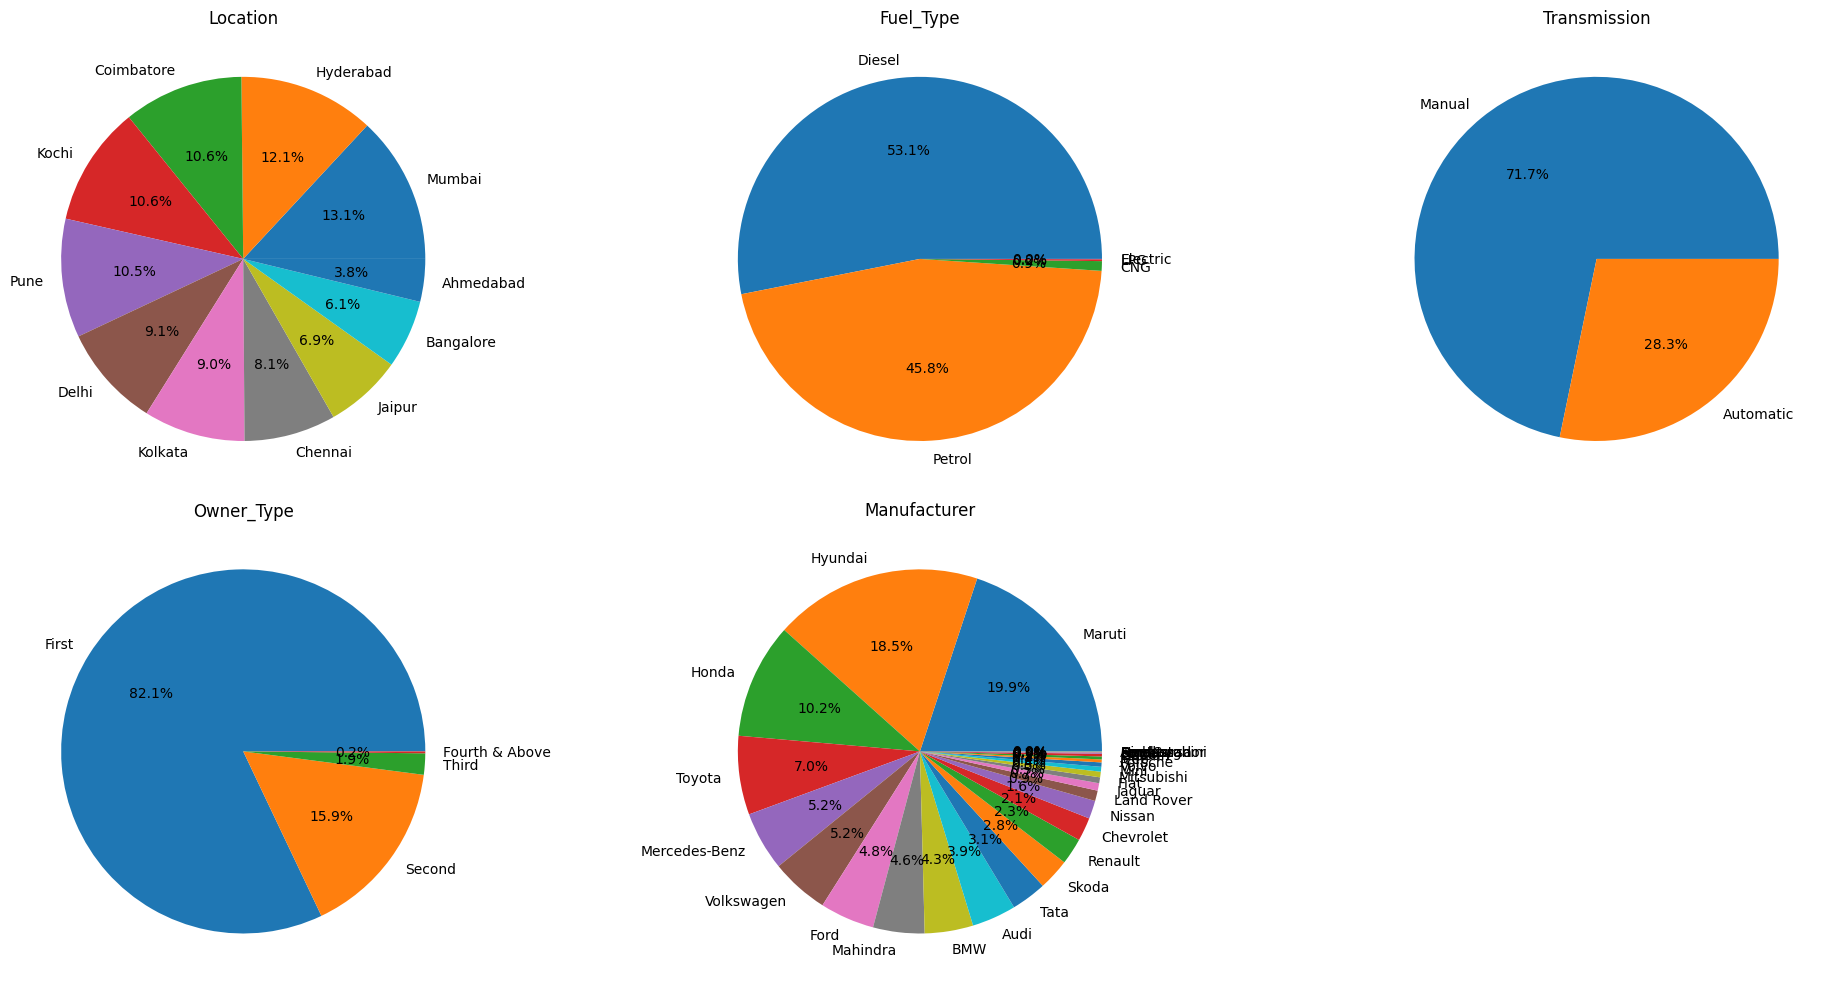

In [ ]:
num_cols = 3
adjustment = num_cols - 1
num_rows = (len(string_columns) + adjustment) // num_cols

axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))[1]

for i, col in enumerate(string_columns):
    ax = axes[i // num_cols, i % num_cols]
    data[col].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%')
    ax.axis('off')     # remove the axis label since that's the same as the title

    # Set the title of the pie chart
    ax.set_title(col)

for i in range(len(string_columns), num_rows * num_cols):
  axes[i // num_cols, i % num_cols].set_visible(False)

# Display the plot
plt.tight_layout()
plt.show()

**REVIEW (Categorical)**

* These pie charts just help to see the results previously analyzed

* *'Location'* = Relatively even spread out.  Every location has a significant portion of car sales.

* *'Fuel_Type'* = **Diesel** & **Petrol** are roughly 50/50 (with a very small amount of data left for **Electric** & **CNG** (Condensed Natural Gas), which is why their names are jammed together on the chart.

* *'Transmission'* = roughly a 3:1 distribution for **Manual** & **Automatic**

* *'Owner_Type'* = over a 5:1 ratio for **First** & **Second**, then a slim portion left for **Third** and **Fourth & Above**

* **Honda**, **Hyundai** and **Maruti** occupy nearly half of the data, and there are many companies that have so few sales that they're packed together because of their thin slices of the pie.

##### Manufacturer Stats ('New_Price' & 'Price')

In [ ]:
# 'New_price' Statistics grouped by Manufacturer

data.groupby('Manufacturer')['New_price'].describe()

count        mean        std     min       25%      50%  \
Manufacturer                                                             
Ambassador       0.0         NaN        NaN     NaN       NaN      NaN   
Audi            29.0   65.141724  24.946476   42.89   48.6400   55.610   
BMW             63.0   62.473333  22.753032   43.31   48.7900   58.670   
Bentley          1.0  375.000000        NaN  375.00  375.0000  375.000   
Chevrolet        0.0         NaN        NaN     NaN       NaN      NaN   
Datsun          11.0    4.848182   1.052443    3.98    4.0450    4.370   
Fiat             4.0    9.002500   0.447242    8.60    8.6375    8.955   
Force            0.0         NaN        NaN     NaN       NaN      NaN   
Ford            29.0   14.074138  14.311504    7.56    9.1200   11.200   
Hindustan        0.0         NaN        NaN     NaN       NaN      NaN   
Honda           83.0   11.669759   4.055201    5.89    8.7500   11.150   
Hyundai        117.0   11.836154   5.269123    4.55    7.5400    9.740   
Isuzu            1.0   33.680000        NaN   33.68   33.6800   33.680   
Jaguar           7.0   58.455714   7.978318   52.77   53.1850   53.720   
Jeep            19.0   22.746316   2.805768   18.16   20.6950   22.950   
Lamborghini      0.0         NaN        NaN     NaN       NaN      NaN   
Land Rover      10.0  119.322000  51.697215   66.39   74.6475  120.000   
Mahindra        36.0   11.030278   2.520608    6.55   10.0550   11.145   
Maruti         237.0    7.845907   2.746784    3.91    5.2900    7.870   
Mercedes-Benz   49.0   73.642449  26.813965   34.63   49.1400   78.760   
Mini            19.0   40.894211   3.784658   34.89   37.8850   42.120   
Mitsubishi      13.0   33.314615   0.970787   31.93   32.4100   33.210   
Nissan          19.0   11.612632   3.760443    6.78    9.1000    9.510   
OpelCorsa        0.0         NaN        NaN     NaN       NaN      NaN   
Porsche          1.0  136.000000        NaN  136.00  136.0000  136.000   
Renault         33.0    7.676061   4.625152    3.95    4.7800    4.930   
Skoda           28.0   26.213571  10.642805   11.89   14.9275   31.365   
Smart            0.0         NaN        NaN     NaN       NaN      NaN   
Tata            52.0    8.775769   4.095953    5.45    6.5900    7.630   
Toyota          94.0   23.627021   8.438001    6.41   19.6875   23.250   
Volkswagen      48.0   11.910000   4.349351    6.74    9.9675   11.105   
Volvo            3.0   43.080000   4.486012   37.90   41.7850   45.670   

                    75%     max  
Manufacturer                     
Ambassador          NaN     NaN  
Audi            67.6700  128.00  
BMW             64.2350  166.00  
Bentley        375.0000  375.00  
Chevrolet           NaN     NaN  
Datsun           5.6350    6.70  
Fiat             9.3200    9.50  
Force               NaN     NaN  
Ford            12.1200   83.92  
Hindustan           NaN     NaN  
Honda           14.6600   33.51  
Hyundai         15.5700   29.90  
Isuzu           33.6800   33.68  
Jaguar          61.8450   72.64  
Jeep            24.1400   27.56  
Lamborghini         NaN     NaN  
Land Rover     139.0000  230.00  
Mahindra        11.6700   21.33  
Maruti          10.5700   13.33  
Mercedes-Benz   95.0400  171.00  
Mini            44.2800   44.59  
Mitsubishi      34.1000   34.60  
Nissan          15.0600   17.21  
OpelCorsa           NaN     NaN  
Porsche        136.0000  136.00  
Renault         13.0800   15.94  
Skoda           33.4150   40.73  
Smart               NaN     NaN  
Tata             8.3950   22.74  
Toyota          26.9875   40.62  
Volkswagen      12.7800   36.45  
Volvo           45.6700   45.67

**Observations (*'New_price'*)**

* Ambassador, Chevrolet, Force, Hindustan, Lamborgini, OpelCorsa & Smart all are missing data

* Porsche, Isuzu & Bentley only have a single value

In [ ]:
# Target 'Price' Statistics grouped by Manufacturer

data.groupby('Manufacturer')['Price'].describe()

count        mean        std     min       25%      50%  \
Manufacturer                                                              
Ambassador        1.0    1.350000        NaN    1.35    1.3500    1.350   
Audi            236.0   25.537712  12.344783    7.50   17.5000   23.500   
BMW             267.0   25.243146  15.164924    6.30   13.9250   21.000   
Bentley           1.0   59.000000        NaN   59.00   59.0000   59.000   
Chevrolet       121.0    3.044463   1.827563    0.75    1.7500    2.500   
Datsun           13.0    3.049231   0.476156    2.25    2.7000    3.100   
Fiat             28.0    3.269286   1.901356    0.55    2.0875    2.600   
Force             3.0    9.333333   2.309401    8.00    8.0000    8.000   
Ford            300.0    6.889400   7.508742    0.69    2.7500    5.345   
Hindustan         0.0         NaN        NaN     NaN       NaN      NaN   
Honda           608.0    5.411743   2.541032    0.90    3.5400    4.950   
Hyundai        1107.0    5.343433   3.311355    0.45    3.0950    4.600   
Isuzu             3.0   14.696667   6.120133    8.00   12.0450   16.090   
Jaguar           40.0   37.632250  18.154640   16.00   26.5150   31.900   
Jeep             15.0   18.718667   2.159183   15.00   17.4750   18.500   
Lamborghini       1.0  120.000000        NaN  120.00  120.0000  120.000   
Land Rover       60.0   39.259500  24.145777   11.00   21.5275   35.000   
Mahindra        272.0    8.045919   3.598662    1.50    5.5000    7.570   
Maruti         1211.0    4.517267   2.295684    0.45    2.8000    4.150   
Mercedes-Benz   318.0   26.809874  15.892033    3.90   14.5000   24.000   
Mini             26.0   26.896923   6.168550   17.00   22.0000   24.285   
Mitsubishi       27.0   11.058889   7.138884    1.00    5.8650    9.950   
Nissan           91.0    4.738352   1.759250    1.75    3.2750    4.300   
OpelCorsa         0.0         NaN        NaN     NaN       NaN      NaN   
Porsche          18.0   48.348333  19.632666    2.02   40.7275   47.020   
Renault         145.0    5.799034   2.384815    2.40    3.8000    5.490   
Skoda           173.0    7.559075   5.036701    1.25    4.2500    6.000   
Smart             1.0    3.000000        NaN    3.00    3.0000    3.000   
Tata            186.0    3.562849   2.693689    0.44    1.6950    2.900   
Toyota          411.0   11.580024   7.001564    1.50    5.5500   10.750   
Volkswagen      315.0    5.307270   2.460562    2.10    3.7500    4.890   
Volvo            21.0   18.802857   5.854036    7.25   16.0000   18.250   

                    75%     max  
Manufacturer                     
Ambassador       1.3500    1.35  
Audi            31.9475   72.94  
BMW             32.1600   93.67  
Bentley         59.0000   59.00  
Chevrolet        3.7000    9.87  
Datsun           3.3100    3.95  
Fiat             4.7000    7.71  
Force           10.0000   12.00  
Ford             7.3425   56.80  
Hindustan           NaN     NaN  
Honda            6.5850   17.50  
Hyundai          6.4500   23.00  
Isuzu           18.0450   20.00  
Jaguar          41.0000  100.00  
Jeep            19.7300   23.91  
Lamborghini    120.0000  120.00  
Land Rover      47.3650  160.00  
Mahindra        10.0825   17.63  
Maruti           5.9950   11.50  
Mercedes-Benz   35.0000   90.00  
Mini            31.8875   39.75  
Mitsubishi      13.7250   28.00  
Nissan           6.1000    8.92  
OpelCorsa           NaN     NaN  
Porsche         63.2375   75.00  
Renault          7.1000   14.01  
Skoda            9.7200   27.30  
Smart            3.0000    3.00  
Tata             4.5800   17.85  
Toyota          16.5000   35.82  
Volkswagen       6.1550   24.90  
Volvo           23.5800   32.50

**Observations (*'Price'*)**

* OpelCorsa & Hindustan lack data (in addition to the *'New_price*) --> they'll be dropped since they have no price data at all and cannot contribute to the model.

* Smart, Lamborgini, Bentley & Ambassador only have one value for *'Price'*.  

##### Removing Rows w/ Insufficient Data

###### **Manufacturers with No Price Data (New or Used)**

In [ ]:
# Show manufacturers that are MISSING both prices (since we literally cannot analyze their data)

manufacturers_missing_both_prices = data.groupby('Manufacturer')[['New_price', 'Price']].count()[
    (data.groupby('Manufacturer')[['New_price', 'Price']].count()['New_price'] == 0) &
    (data.groupby('Manufacturer')[['New_price', 'Price']].count()['Price'] == 0)
].index.tolist()

print(manufacturers_missing_both_prices)

['Hindustan', 'OpelCorsa']


In [ ]:
# prompt: drop manufacturers_missing_both_prices

data.drop(data[data['Manufacturer'].isin(manufacturers_missing_both_prices)].index, inplace=True)

data

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0         Mumbai  2010              72000       CNG       Manual      First   
1           Pune  2015              41000    Diesel       Manual      First   
2        Chennai  2011              46000    Petrol       Manual      First   
3        Chennai  2012              87000    Diesel       Manual      First   
4     Coimbatore  2013              40670    Diesel    Automatic     Second   
...          ...   ...                ...       ...          ...        ...   
7248   Hyderabad  2011              89411    Diesel       Manual      First   
7249      Mumbai  2015              59000    Petrol    Automatic      First   
7250     Kolkata  2012              28000    Diesel       Manual      First   
7251        Pune  2013              52262    Petrol    Automatic      Third   
7252       Kochi  2014              72443    Diesel    Automatic      First   

      Mileage  Engine   Power  Seats  New_price  Price   Manufacturer  
0       26.60   998.0   58.16    5.0        NaN   1.75         Maruti  
1       19.67  1582.0  126.20    5.0        NaN  12.50        Hyundai  
2       18.20  1199.0   88.70    5.0       8.61   4.50          Honda  
3       20.77  1248.0   88.76    7.0        NaN   6.00         Maruti  
4       15.20  1968.0  140.80    5.0        NaN  17.74           Audi  
...       ...     ...     ...    ...        ...    ...            ...  
7248    20.54  1598.0  103.60    5.0        NaN    NaN     Volkswagen  
7249    17.21  1197.0  103.60    5.0        NaN    NaN     Volkswagen  
7250    23.08  1461.0   63.10    5.0        NaN    NaN         Nissan  
7251    17.20  1197.0  103.60    5.0        NaN    NaN     Volkswagen  
7252    10.00  2148.0  170.00    5.0        NaN    NaN  Mercedes-Benz  

[7251 rows x 13 columns]

In [ ]:
# Show manufacturers with 0 or 1 new price

data.groupby('Manufacturer')['New_price'].count()[data.groupby('Manufacturer')['New_price'].count() <= 1]

Manufacturer
Ambassador     0
Bentley        1
Chevrolet      0
Force          0
Isuzu          1
Lamborghini    0
Porsche        1
Smart          0
Name: New_price, dtype: int64

* You can see now that neither **Hindustan** nor **OpelCorsa** are in the data now (the DataFrame is down two rows & they don't show in the Manufacturer counts).

* This would have been taken care of with the following code blocks removing rows with insufficient data, but I wanted to start with these particular manufacturers for simplicity since they have no price data whatsoever and contribute nothing to the model.

In [ ]:
# Identify manufacturers with 0 or 1 (target) price

data.groupby('Manufacturer')['Price'].count()[data.groupby('Manufacturer')['Price'].count() <= 1]

Manufacturer
Ambassador     1
Bentley        1
Lamborghini    1
Smart          1
Name: Price, dtype: int64

###### **Let's Remove Rows with only (one or no *'New_price'* value) AND (one or no *'Price'* value)**

In [ ]:
manufacturers_insuff_data = data.groupby('Manufacturer')[['New_price', 'Price']].count()[
    (data.groupby('Manufacturer')[['New_price', 'Price']].count()['New_price'] <= 1) &      # identifies manufacturers with at most one entry for 'New_price'
    (data.groupby('Manufacturer')[['New_price', 'Price']].count()['Price'] <= 1)            # identifies manufacturers with at most one entry for 'Price'
].index.tolist()

print(manufacturers_insuff_data)

['Ambassador', 'Bentley', 'Lamborghini', 'Smart']


In [ ]:
# Drop those brands

data.drop(data[data['Manufacturer'].isin(manufacturers_insuff_data)].index, inplace=True)

data

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0         Mumbai  2010              72000       CNG       Manual      First   
1           Pune  2015              41000    Diesel       Manual      First   
2        Chennai  2011              46000    Petrol       Manual      First   
3        Chennai  2012              87000    Diesel       Manual      First   
4     Coimbatore  2013              40670    Diesel    Automatic     Second   
...          ...   ...                ...       ...          ...        ...   
7248   Hyderabad  2011              89411    Diesel       Manual      First   
7249      Mumbai  2015              59000    Petrol    Automatic      First   
7250     Kolkata  2012              28000    Diesel       Manual      First   
7251        Pune  2013              52262    Petrol    Automatic      Third   
7252       Kochi  2014              72443    Diesel    Automatic      First   

      Mileage  Engine   Power  Seats  New_price  Price   Manufacturer  
0       26.60   998.0   58.16    5.0        NaN   1.75         Maruti  
1       19.67  1582.0  126.20    5.0        NaN  12.50        Hyundai  
2       18.20  1199.0   88.70    5.0       8.61   4.50          Honda  
3       20.77  1248.0   88.76    7.0        NaN   6.00         Maruti  
4       15.20  1968.0  140.80    5.0        NaN  17.74           Audi  
...       ...     ...     ...    ...        ...    ...            ...  
7248    20.54  1598.0  103.60    5.0        NaN    NaN     Volkswagen  
7249    17.21  1197.0  103.60    5.0        NaN    NaN     Volkswagen  
7250    23.08  1461.0   63.10    5.0        NaN    NaN         Nissan  
7251    17.20  1197.0  103.60    5.0        NaN    NaN     Volkswagen  
7252    10.00  2148.0  170.00    5.0        NaN    NaN  Mercedes-Benz  

[7246 rows x 13 columns]

**After Removing Manufacturers with Insufficient Data**

* We've gone from 7,253 original rows --> 7,246 rows now (dropped seven rows)

* There are still a few manufacturers missing *'New_price'* data (Chevrolet, Force, Isuzu & Porche), but they all still have at least two entries in *'Price'* (as with all manufacturers now).
  * This is especially important that **every manufacturer** has at **least two** *'Price'* values so that they could theoretically have **one in each** the **training & test** set when the data is split (important for accuracy integrity).

###### ALSO DROP Rows with Mileage < 5 (unrealistic)

* Data that low was likely not collected and just inputted as 0's.

* Again, this separate call is redundant since mileage this low would be taken care of by the upcoming removal of outliers, but I wanted to make sure in case they linger if/when I adjust the outlier removal threshhold (instead of the standard 1.5xIQR).

In [ ]:
# Drop rows with mileage less than five
data = data.drop(data.loc[data['Mileage'] < 5].index)

data

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0         Mumbai  2010              72000       CNG       Manual      First   
1           Pune  2015              41000    Diesel       Manual      First   
2        Chennai  2011              46000    Petrol       Manual      First   
3        Chennai  2012              87000    Diesel       Manual      First   
4     Coimbatore  2013              40670    Diesel    Automatic     Second   
...          ...   ...                ...       ...          ...        ...   
7248   Hyderabad  2011              89411    Diesel       Manual      First   
7249      Mumbai  2015              59000    Petrol    Automatic      First   
7250     Kolkata  2012              28000    Diesel       Manual      First   
7251        Pune  2013              52262    Petrol    Automatic      Third   
7252       Kochi  2014              72443    Diesel    Automatic      First   

      Mileage  Engine   Power  Seats  New_price  Price   Manufacturer  
0       26.60   998.0   58.16    5.0        NaN   1.75         Maruti  
1       19.67  1582.0  126.20    5.0        NaN  12.50        Hyundai  
2       18.20  1199.0   88.70    5.0       8.61   4.50          Honda  
3       20.77  1248.0   88.76    7.0        NaN   6.00         Maruti  
4       15.20  1968.0  140.80    5.0        NaN  17.74           Audi  
...       ...     ...     ...    ...        ...    ...            ...  
7248    20.54  1598.0  103.60    5.0        NaN    NaN     Volkswagen  
7249    17.21  1197.0  103.60    5.0        NaN    NaN     Volkswagen  
7250    23.08  1461.0   63.10    5.0        NaN    NaN         Nissan  
7251    17.20  1197.0  103.60    5.0        NaN    NaN     Volkswagen  
7252    10.00  2148.0  170.00    5.0        NaN    NaN  Mercedes-Benz  

[7166 rows x 13 columns]

* Down to 7,166 rows after a few more rows dropped out for having *'Mileage'* < 5 (unrealistic & well outside past the lower whisker of the original boxplot)

#### Remove Outliers #1 (1.5*IQR)

##### **BEFORE Removal (just looking at the count)**

In [ ]:
# Copy for Removing Outliers (since we may adjust)
data_out = data.copy()
numeric_columns = data_out.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
# Count outliers for each numeric column (BEFORE removal 1st round)

for col in numeric_columns:
    # Calculate IQR and boundaries
    Q1 = data_out[col].quantile(0.25)
    Q3 = data_out[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Count outliers
    num_outliers = data_out[(data_out[col] < lower_bound) | (data_out[col] > upper_bound)].shape[0]

    # Print results
    print(f"Column: {bold_text(col)}")
    print(f"Number of outliers: {num_outliers} \n")

Column: Year
Number of outliers: 139 

Column: Kilometers_Driven
Number of outliers: 253 

Column: Mileage
Number of outliers: 18 

Column: Engine
Number of outliers: 60 

Column: Power
Number of outliers: 267 

Column: Seats
Number of outliers: 1145 

Column: New_price
Number of outliers: 114 

Column: Price
Number of outliers: 702 



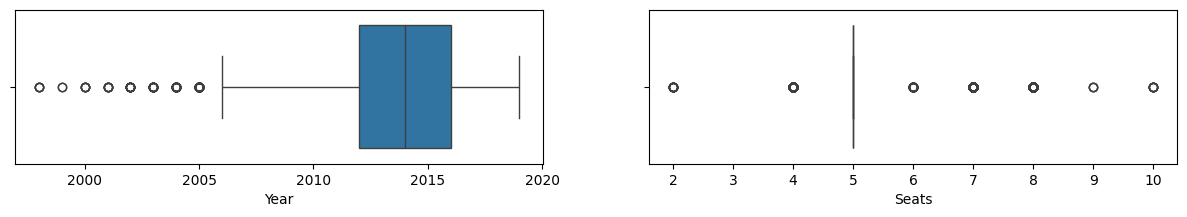

In [ ]:
# Boxplot for year and seats

plt.figure(figsize=(15, 2))
plt.subplot(1,2,1)
sns.boxplot(data=data_out, x='Year')

plt.subplot(1,2,2)
sns.boxplot(data=data_out, x='Seats')

plt.show()

* We'll leave the data identified as outliers in both *'Year'* & *'Seats'* since:
  * The outliers are valid in these cases
  * We can see that all values other than **5** are identified as outliers in *'Seats'* --> The other seat amounts likely account for other vehicle types such as mopeds, minivans, etc.

##### **AFTER Removal (one round)**

In [ ]:
# REMOVE OUTLIERS for each numeric column
for col in numeric_columns:
  if col not in ['Year', 'Seats']:    # ignore checking these columns for outliers
    # Calculate IQR and boundaries
    Q1 = data_out[col].quantile(0.25)
    Q3 = data_out[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    data_out = data_out[(data_out[col] >= lower_bound) & (data_out[col] <= upper_bound)]

In [ ]:
data_out

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
2     Chennai  2011              46000    Petrol       Manual      First   
7      Mumbai  2016              36000    Diesel    Automatic      First   
10      Kochi  2018              25692    Petrol       Manual      First   
15      Delhi  2014             110000    Diesel       Manual      First   
28      Kochi  2018              37430    Petrol       Manual      First   
...       ...   ...                ...       ...          ...        ...   
5999  Chennai  2016              10000    Petrol       Manual      First   
6002   Mumbai  2011              38000    Petrol       Manual      First   
6005     Pune  2016              37208    Diesel       Manual      First   
6010    Delhi  2013              33746    Petrol       Manual      First   
6014    Delhi  2014              27365    Diesel       Manual      First   

      Mileage  Engine   Power  Seats  New_price  Price Manufacturer  
2       18.20  1199.0   88.70    5.0       8.61   4.50        Honda  
7       11.36  2755.0  171.50    8.0      21.00  17.50       Toyota  
10      21.56  1462.0  103.25    5.0      10.65   9.95       Maruti  
15      13.50  2477.0  175.56    7.0      32.01  15.00   Mitsubishi  
28      17.50  1199.0   88.70    5.0      10.57   9.90        Honda  
...       ...     ...     ...    ...        ...    ...          ...  
5999    17.57  1193.0   88.70    5.0       7.77   4.00         Tata  
6002    16.09  1598.0  103.50    5.0      11.91   3.25   Volkswagen  
6005    24.30  1248.0   88.50    5.0       9.93   7.43       Maruti  
6010    18.50  1198.0   86.80    5.0       6.63   3.20        Honda  
6014    28.40  1248.0   74.00    5.0       7.88   4.75       Maruti  

[622 rows x 13 columns]

**Observations (pt. 1 - First Glance)**

* Right away, we can see that removing outliers with the 1.5*IQR threshhold had significant effects:

  * The total rows went down from 7,253 -> 622.  Losing over 90% of your data is probably not the best idea, so we'll probably approach this differently (ex: extending the threshhold and looking the data more granularly since not all outliers are necessarily unrealistic).

In [ ]:
# Count outliers for each numeric column (AFTER removal)

for col in numeric_columns:
    # Calculate IQR and boundaries
    Q1 = data_out[col].quantile(0.25)
    Q3 = data_out[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Count outliers
    num_outliers = data_out[(data_out[col] < lower_bound) | (data_out[col] > upper_bound)].shape[0]

    # Print results
    print(f"Column: {bold_text(col)}")
    print(f"Number of outliers: {num_outliers} \n")

Column: Year
Number of outliers: 35 

Column: Kilometers_Driven
Number of outliers: 17 

Column: Mileage
Number of outliers: 0 

Column: Engine
Number of outliers: 85 

Column: Power
Number of outliers: 4 

Column: Seats
Number of outliers: 99 

Column: New_price
Number of outliers: 37 

Column: Price
Number of outliers: 48 



**Observations (pt. 2 - Outlier Count)**

* Although *'Year'* & *'Seats'* were not directly checked for outliers, they were still affected by the outlier removal since rows that outliers in other columns must have also had year values that qualified as outliers.  Thus, their counts also change after the removal.

* Even after one round of outlier removal, running a count still yields a significant amount of outliers.  And while the counts may be a lot smaller (ex: *'Year'* outliers went from 58 -> 35), they actually account for significantly larger proportions (ex: 58 outliers / 7253 total records is a lot smaller percentage than 35 outliers / 622 records).

* So again, the default outlier removal method is not optimal.  With these results, we see that there still remain outliers, and they constitute a much larger proportion of the new data.

In [ ]:
data_out.describe()

Year  Kilometers_Driven     Mileage       Engine       Power  \
count   622.000000         622.000000  622.000000   622.000000  622.000000   
mean   2015.937299       39313.381029   20.160016  1435.255627   98.462251   
std       2.239506       25794.716900    4.123303   439.167494   31.617885   
min    2005.000000         600.000000   11.250000   799.000000   53.000000   
25%    2015.000000       20006.000000   17.195000  1197.000000   74.000000   
50%    2017.000000       35120.500000   20.140000  1248.000000   88.500000   
75%    2017.000000       53240.000000   23.100000  1498.000000  117.300000   
max    2019.000000      130000.000000   28.400000  2999.000000  227.000000   

            Seats   New_price       Price  
count  622.000000  622.000000  622.000000  
mean     5.321543   11.876592    7.773907  
std      0.750407    6.890394    4.378539  
min      5.000000    3.910000    1.750000  
25%      5.000000    7.375000    4.500000  
50%      5.000000   10.255000    6.525000  
75%      5.000000   14.177500    9.487500  
max      8.000000   43.810000   20.140000

* So since we lost over 90% of the data with this default method of removing outliers, let's adjust the threshhold (second approach below):

#### Remove Outliers #2 (3*IQR)

* Since removing everything outside the 1.5*IQR removed over 90% of the data, we'll extend that threshhold.

In [ ]:
# Remake the copy to adjust the threshold
data_out = data.copy()
numeric_cols = data_out.select_dtypes(include=['int64', 'float64']).columns

data_out

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0         Mumbai  2010              72000       CNG       Manual      First   
1           Pune  2015              41000    Diesel       Manual      First   
2        Chennai  2011              46000    Petrol       Manual      First   
3        Chennai  2012              87000    Diesel       Manual      First   
4     Coimbatore  2013              40670    Diesel    Automatic     Second   
...          ...   ...                ...       ...          ...        ...   
7248   Hyderabad  2011              89411    Diesel       Manual      First   
7249      Mumbai  2015              59000    Petrol    Automatic      First   
7250     Kolkata  2012              28000    Diesel       Manual      First   
7251        Pune  2013              52262    Petrol    Automatic      Third   
7252       Kochi  2014              72443    Diesel    Automatic      First   

      Mileage  Engine   Power  Seats  New_price  Price   Manufacturer  
0       26.60   998.0   58.16    5.0        NaN   1.75         Maruti  
1       19.67  1582.0  126.20    5.0        NaN  12.50        Hyundai  
2       18.20  1199.0   88.70    5.0       8.61   4.50          Honda  
3       20.77  1248.0   88.76    7.0        NaN   6.00         Maruti  
4       15.20  1968.0  140.80    5.0        NaN  17.74           Audi  
...       ...     ...     ...    ...        ...    ...            ...  
7248    20.54  1598.0  103.60    5.0        NaN    NaN     Volkswagen  
7249    17.21  1197.0  103.60    5.0        NaN    NaN     Volkswagen  
7250    23.08  1461.0   63.10    5.0        NaN    NaN         Nissan  
7251    17.20  1197.0  103.60    5.0        NaN    NaN     Volkswagen  
7252    10.00  2148.0  170.00    5.0        NaN    NaN  Mercedes-Benz  

[7166 rows x 13 columns]

In [ ]:
# REMOVE OUTLIERS for each numeric column
for col in numeric_columns:
  if col not in ['Year', 'Seats']:    # ignore checking these columns for outliers
    # Calculate IQR and boundaries
    Q1 = data_out[col].quantile(0.25)
    Q3 = data_out[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (3 * IQR)    # doubling the outlier threshhold to maintain more than
    upper_bound = Q3 + (3 * IQR)
    data_out = data_out[(data_out[col] >= lower_bound) & (data_out[col] <= upper_bound)]

data_out

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
2     Chennai  2011              46000    Petrol       Manual      First   
7      Mumbai  2016              36000    Diesel    Automatic      First   
10      Kochi  2018              25692    Petrol       Manual      First   
15      Delhi  2014             110000    Diesel       Manual      First   
20      Kochi  2014              32982    Diesel    Automatic      First   
...       ...   ...                ...       ...          ...        ...   
5999  Chennai  2016              10000    Petrol       Manual      First   
6002   Mumbai  2011              38000    Petrol       Manual      First   
6005     Pune  2016              37208    Diesel       Manual      First   
6010    Delhi  2013              33746    Petrol       Manual      First   
6014    Delhi  2014              27365    Diesel       Manual      First   

      Mileage  Engine   Power  Seats  New_price  Price Manufacturer  
2       18.20  1199.0   88.70    5.0       8.61   4.50        Honda  
7       11.36  2755.0  171.50    8.0      21.00  17.50       Toyota  
10      21.56  1462.0  103.25    5.0      10.65   9.95       Maruti  
15      13.50  2477.0  175.56    7.0      32.01  15.00   Mitsubishi  
20      22.69  1995.0  190.00    5.0      47.87  18.55          BMW  
...       ...     ...     ...    ...        ...    ...          ...  
5999    17.57  1193.0   88.70    5.0       7.77   4.00         Tata  
6002    16.09  1598.0  103.50    5.0      11.91   3.25   Volkswagen  
6005    24.30  1248.0   88.50    5.0       9.93   7.43       Maruti  
6010    18.50  1198.0   86.80    5.0       6.63   3.20        Honda  
6014    28.40  1248.0   74.00    5.0       7.88   4.75       Maruti  

[765 rows x 13 columns]

* Widening the outlier threshhold kept 765 rows => maintained just over 10% of the data (after the rows with insufficient price data were removed), so we'll keep that.

In [ ]:
data_out.describe()

Year  Kilometers_Driven     Mileage       Engine       Power  \
count   765.000000         765.000000  765.000000   765.000000  765.000000   
mean   2015.797386       41132.094118   20.016758  1539.243137  110.990170   
std       2.391519       28408.824630    4.300636   483.976108   41.933828   
min    2001.000000         600.000000   11.250000   799.000000   53.000000   
25%    2015.000000       20712.000000   17.000000  1197.000000   81.800000   
50%    2016.000000       35569.000000   20.140000  1461.000000   93.700000   
75%    2017.000000       54387.000000   22.950000  1956.000000  143.000000   
max    2019.000000      170000.000000   33.540000  2999.000000  246.740000   

            Seats   New_price       Price  
count  765.000000  765.000000  765.000000  
mean     5.312418   17.761242   10.580157  
std      0.772847   15.490169    8.149830  
min      4.000000    3.910000    0.700000  
25%      5.000000    7.870000    4.900000  
50%      5.000000   11.260000    7.690000  
75%      5.000000   21.690000   13.200000  
max      8.000000   71.820000   40.000000

* This looks significantly better than before, so we'll update the **"data"** set using this second version of outlier removal since we still have about 10% of the original data.

* There is likely still some skew to the features, which will be dealt with upcoming methods.

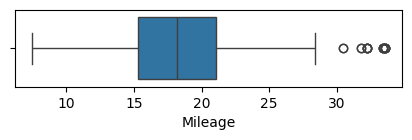

In [ ]:
# Looking at "data" boxplot before settling on outlier removal system

import matplotlib.pyplot as plt
plt.figure(figsize=(5, 1))
sns.boxplot(data=data, x='Mileage')

plt.show()

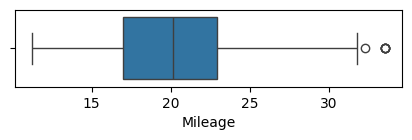

In [ ]:
# Boxplot for "data_out" after applying 3*IQR threshhold

import matplotlib.pyplot as plt
plt.figure(figsize=(5, 1))
sns.boxplot(data=data_out, x='Mileage')

plt.show()

* Also looks decent (the remaining outliers are still pretty close to the data)

* We'll copy **data_out** --> **data** with this **3xIQR** threshhold.

In [ ]:
# Make another copy of "data" before duplicating "data_out" so that we can compare some analyses later on
data_orig = data.copy()
data_orig

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0         Mumbai  2010              72000       CNG       Manual      First   
1           Pune  2015              41000    Diesel       Manual      First   
2        Chennai  2011              46000    Petrol       Manual      First   
3        Chennai  2012              87000    Diesel       Manual      First   
4     Coimbatore  2013              40670    Diesel    Automatic     Second   
...          ...   ...                ...       ...          ...        ...   
7248   Hyderabad  2011              89411    Diesel       Manual      First   
7249      Mumbai  2015              59000    Petrol    Automatic      First   
7250     Kolkata  2012              28000    Diesel       Manual      First   
7251        Pune  2013              52262    Petrol    Automatic      Third   
7252       Kochi  2014              72443    Diesel    Automatic      First   

      Mileage  Engine   Power  Seats  New_price  Price   Manufacturer  
0       26.60   998.0   58.16    5.0        NaN   1.75         Maruti  
1       19.67  1582.0  126.20    5.0        NaN  12.50        Hyundai  
2       18.20  1199.0   88.70    5.0       8.61   4.50          Honda  
3       20.77  1248.0   88.76    7.0        NaN   6.00         Maruti  
4       15.20  1968.0  140.80    5.0        NaN  17.74           Audi  
...       ...     ...     ...    ...        ...    ...            ...  
7248    20.54  1598.0  103.60    5.0        NaN    NaN     Volkswagen  
7249    17.21  1197.0  103.60    5.0        NaN    NaN     Volkswagen  
7250    23.08  1461.0   63.10    5.0        NaN    NaN         Nissan  
7251    17.20  1197.0  103.60    5.0        NaN    NaN     Volkswagen  
7252    10.00  2148.0  170.00    5.0        NaN    NaN  Mercedes-Benz  

[7166 rows x 13 columns]

In [ ]:
# Now update the "data" set with the 3xIQR outlier removal threshhold
data = data_out
data

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
2     Chennai  2011              46000    Petrol       Manual      First   
7      Mumbai  2016              36000    Diesel    Automatic      First   
10      Kochi  2018              25692    Petrol       Manual      First   
15      Delhi  2014             110000    Diesel       Manual      First   
20      Kochi  2014              32982    Diesel    Automatic      First   
...       ...   ...                ...       ...          ...        ...   
5999  Chennai  2016              10000    Petrol       Manual      First   
6002   Mumbai  2011              38000    Petrol       Manual      First   
6005     Pune  2016              37208    Diesel       Manual      First   
6010    Delhi  2013              33746    Petrol       Manual      First   
6014    Delhi  2014              27365    Diesel       Manual      First   

      Mileage  Engine   Power  Seats  New_price  Price Manufacturer  
2       18.20  1199.0   88.70    5.0       8.61   4.50        Honda  
7       11.36  2755.0  171.50    8.0      21.00  17.50       Toyota  
10      21.56  1462.0  103.25    5.0      10.65   9.95       Maruti  
15      13.50  2477.0  175.56    7.0      32.01  15.00   Mitsubishi  
20      22.69  1995.0  190.00    5.0      47.87  18.55          BMW  
...       ...     ...     ...    ...        ...    ...          ...  
5999    17.57  1193.0   88.70    5.0       7.77   4.00         Tata  
6002    16.09  1598.0  103.50    5.0      11.91   3.25   Volkswagen  
6005    24.30  1248.0   88.50    5.0       9.93   7.43       Maruti  
6010    18.50  1198.0   86.80    5.0       6.63   3.20        Honda  
6014    28.40  1248.0   74.00    5.0       7.88   4.75       Maruti  

[765 rows x 13 columns]

## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perfoem the log_transformation(if needed) and write down your observations?

### **Numeric Variables --> Histograms w/ KDE**

#### Data BEFORE Outliers Removed (but AFTER certain insufficient data rows dropped)

In [ ]:
# Defining a variable for numeric columns
numeric_columns = data_orig.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numeric_columns)  # print the list

['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'New_price', 'Price']


* *Why separating the 'numeric_columns' definition:*  For some reason, having that variable definition in the below code block causes the execution to hang (even stopping takes time).  But separating it into a separate block then calling that variable below was fine.

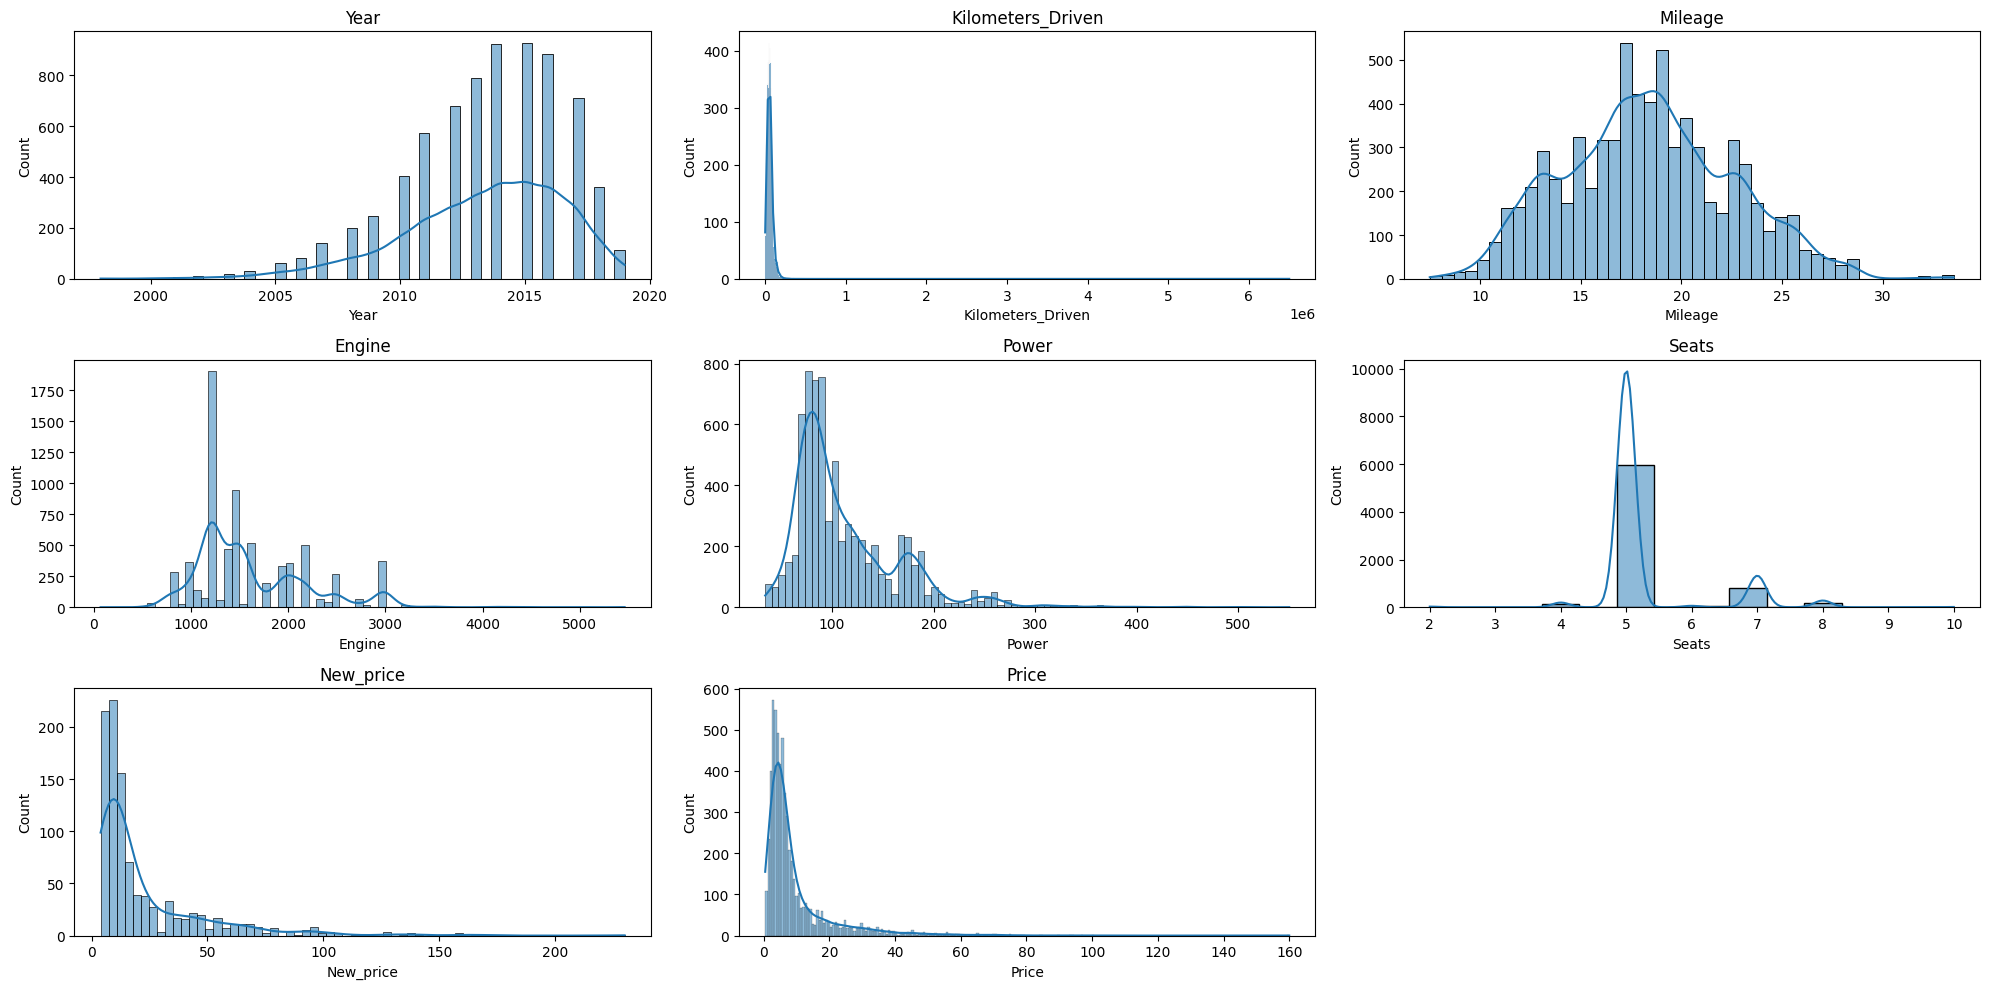

In [ ]:
# Create the axes object with the correct number of rows and columns:

# Eight variables (without 'S.No.') / two columns = four rows
num_cols = 3

# 'Adjustment' variable to remove any empty grids at the end
adjustment = num_cols - 1   # Subtracting 1 from the num_cols allows the 'adjustment' to ensure at least one empty column at the end of each row

# The 'adjustment' variable is added to the amount of variables so that it yields enough rows...
# -> after the integer division of "// num_cols", which will truncate the quotient.
# -> So we want to make sure it there's enough space for all the plots.

num_rows = (len(numeric_columns) + adjustment) // num_cols  # Adjust this value based on the number of columns (which are all numeric for this data)

axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))[1]    # the [1] extracts the second element (axes object) from the tuple

# Loop throw the variables and plot each.
for i, col in enumerate(numeric_columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.histplot(data=data_orig, x=col, kde=True, ax=ax)   # although maybe not technically necessary in this case of straight-forward data...
                                                    # -> setting 'x=col' helps with efficiency so that the function does not need...
                                                    # -> to try and infer what should be on the x-axis.
    ax.set_title(col)   # even though the x-axis already has the variable, a title is larger and helps reading the output more clearly

# Hide the empty axes since we included the adjustment which adds empty columns at the end of each row.
for i in range(len(numeric_columns), num_rows * num_cols):
    axes[i // num_cols, i % num_cols].set_visible(False)

# Display the plot
plt.tight_layout()  # automatically adjusts the spacing since we have multiple plots in a confined space
plt.show()

**Numeric Values Distributions Observations**

* **Left Skew**
  * *'Year'* with the bulk around 2015 (+- 2 yrs)

* **Normal**
  * *'Mileage'* has a bit of twin-peak around 16 & 19, which could be also considered bimodal.  But they're so close to each other and contribute to a hill around that whole zone --> why I'm classifying it as normally distributed.  There's also a section of cars with 0 entered, which is not possible for a car so suggests that the data was not collected.

* **Right Skew**
  * *'Kilometers_Driven', 'New_Price', 'Price'* all have the vast majority of data right around 0.
  * *'Engine'* is focused around 1100 CC (a huge spike thereabouts).
  * *'Power'* is more spread out with a majority around 50-100.

* **Multimodal**
  * *'Seats'* has nearly all of the data @ 5, and some @ 7.  Any other entry is very small in comparison.


#### Histogram w/ KDE After Removing Outliers

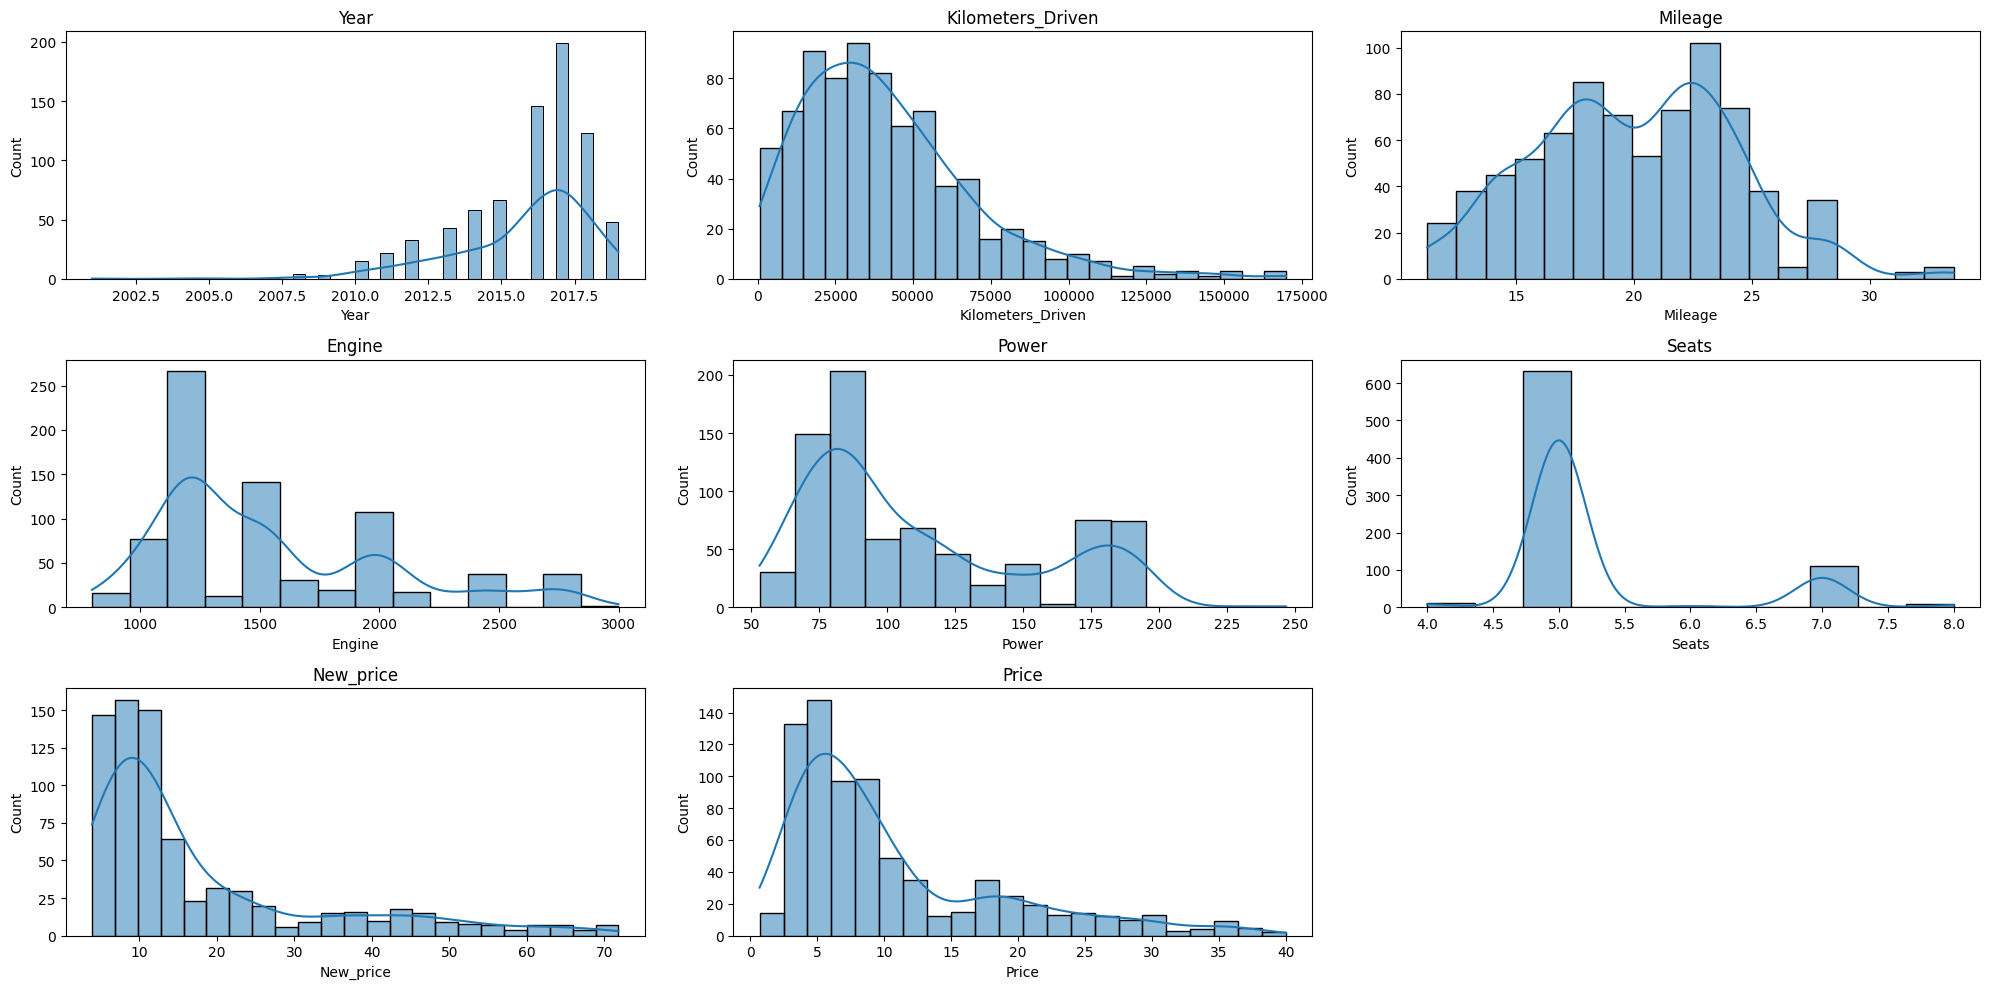

In [ ]:
# Histplots after removing outliers:

num_cols = 3

adjustment = num_cols - 1
num_rows = (len(numeric_columns) + adjustment) // num_cols
axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))[1]

# Loop throw the variables and plot each.
for i, col in enumerate(numeric_columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.histplot(data=data, x=col, kde=True, ax=ax)
    ax.set_title(col)

# Hide the empty axes since we included the adjustment which adds empty columns at the end of each row.
for i in range(len(numeric_columns), num_rows * num_cols):
    axes[i // num_cols, i % num_cols].set_visible(False)

# Display the plot
plt.tight_layout()
plt.show()

**Post-Outlier Removal Distributions Observations:**

* *'Year'* actually looks **more skewed** now + the axis has decimals.  Neither of these things should really be an issue since it's still a pretty small range.
  * *'Mileagle'* also doesn't look to have quite as nice a normal distribution as it did before, but it's still pretty decent.

* *'Seats'* shrunk its range a bit since nearly all of the data is either 5 or 7 seats.

* The other features, while not quite normally distributed now, are certainly better than they were before removing outliers.

#### Logged

In [ ]:
# Copy for Logged Experiment
data_logged = data.copy()

In [ ]:
# Performing Log Transformation EXCEPT 'Year' & 'Seats' since they're discrete & logging would hurt interpretability

for col in numeric_columns:
  if (col != 'Year'):
    if (col != 'Seats'):
        data_logged[col] = np.log1p(data_logged[col])

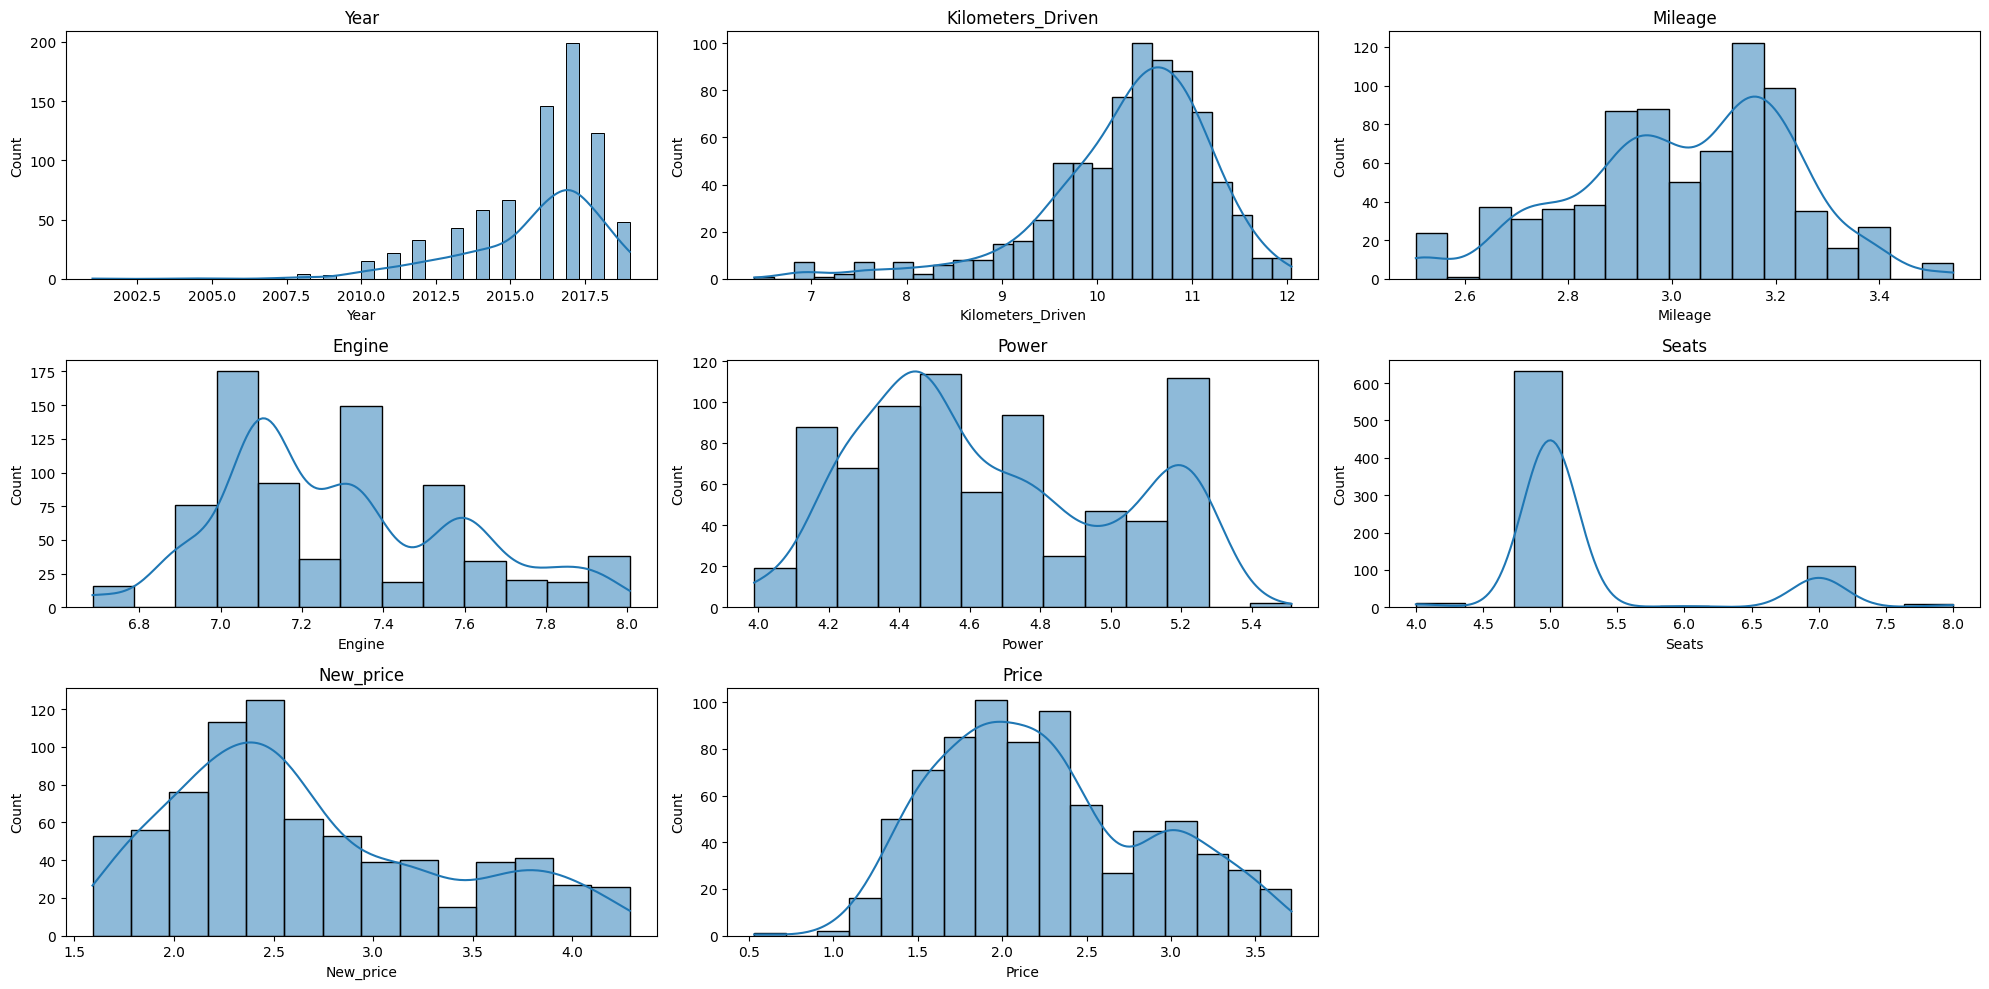

In [ ]:
# Create the axes object with the correct number of rows and columns:

num_cols = 3

adjustment = num_cols - 1
num_rows = (len(numeric_columns) + adjustment) // num_cols
axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))[1]

# Loop throw the variables and plot each.
for i, col in enumerate(numeric_columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.histplot(data=data_logged, x=col, kde=True, ax=ax)
    ax.set_title(col)

# Hide the empty axes since we included the adjustment which adds empty columns at the end of each row.
for i in range(len(numeric_columns), num_rows * num_cols):
    axes[i // num_cols, i % num_cols].set_visible(False)

# Display the plot
plt.tight_layout()
plt.show()

**Post-Log Observations**

* No change for *'Year'* & *'Seats'*, obviously, since we excluded them from logging.

* Surprisingly, *'Kilometers_Driven'* **flipped** from **right-skewed** to **left-skewed** (although with a less dramatic tail).  So a log transformation **did not help** to normalize that distribution.  Further consideration for this variable will be needed moving forward when building models.

* *'Mileage'* & *'Engine'* look similar to before (but with adjusted x-axes).  So we'll actually **exclude** them from logging since it didn't really help & we want to try to preserve original data as much as possible.

* *'Power'* was kind of leveled out, but the skew before was not extreme, so we'll likely **exclude** this from logging, as well, to preserve the original values.  A look at its pre-logged boxplot will also help determine if a log transformation is really called for.

* *'New_price'* & *'Price'* are far closer to **normal distribution** (especially *'Price'*), which is the goal of log transformation.

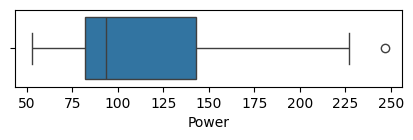

In [ ]:
# prompt: boxplot power
plt.figure(figsize=(5, 1))
sns.boxplot(data=data, x='Power')
plt.show()

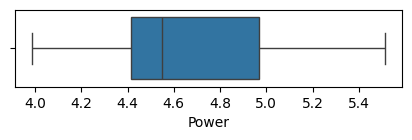

In [ ]:
# prompt: boxplot power
plt.figure(figsize=(5, 1))
sns.boxplot(data=data_logged, x='Power')
plt.show()

**Pre/Post Log Impact on *'Power'*:**

* So while the log transformation did remove a single outlier, that outlier was not far off the whisker.

* And while the whiskers are more equal in length, the box shape has not changed much & the median is still farther to the left, so the mean would still be higher --> still some right-skew.  Thus, it's not worth performing a log transformation on it.

**CONCLUSION after Log Experimentation:**

* Really, only the two price variables benefitted from performing a log transformation.

* However, as we previously saw, *'New_price'* has so many empty values (~86%), it will likely be dropped anyway.

* So as a result, only **Price** will need a log transformation --> just add a column instead of logging the whole DataFrame.

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

### Numeric - Numeric Comparisons

#### Scatterplot

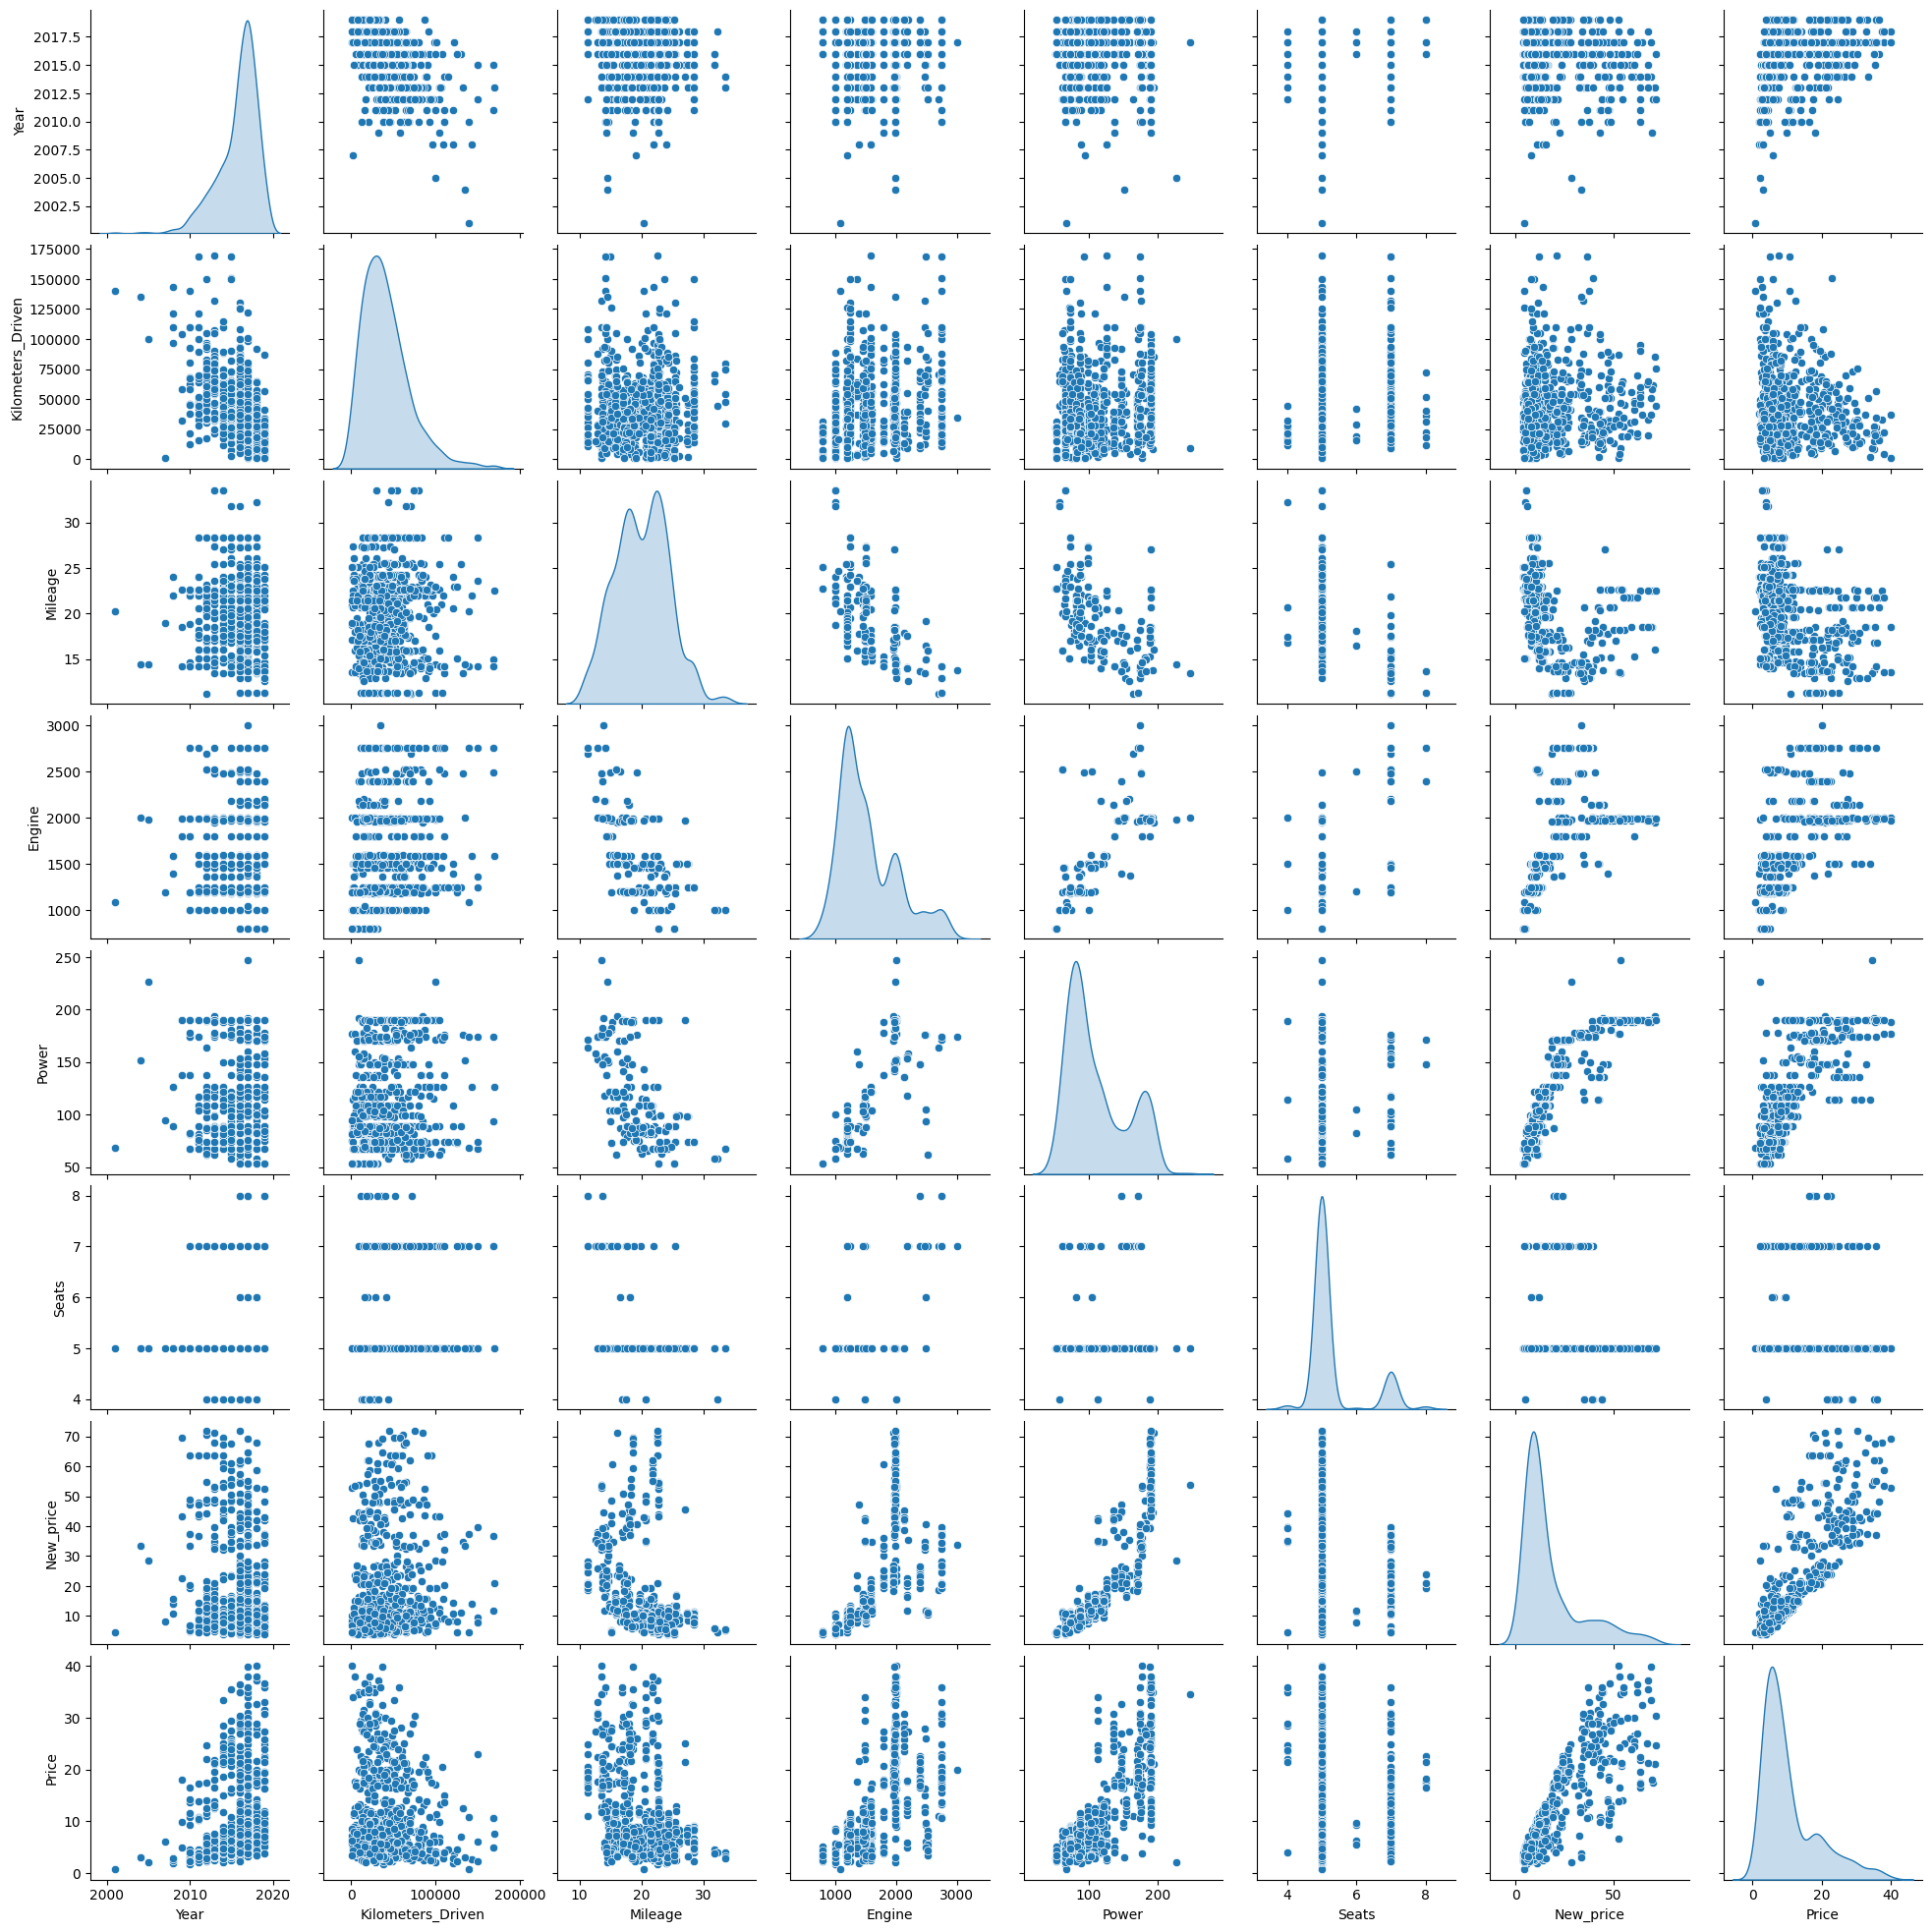

In [ ]:
# Scatter plot for numeric values

sns.pairplot(data, vars = numeric_columns, diag_kind = 'kde')
plt.show()

**Pairplot Observations (Visual)**

* *'Year'* is mostly above 2008, and its only visibly discernbile correlation is with *'Price'*: a **positive slope** along the lower-right border.  This makes sense that a later car (more recent) would cost more.

* *'Kilometers_Driven'* - Most records are over 100,000
  * Kind of a **negative slope** along the upper-right border with *'Price'*

* *'Mileage'* - Mostly under 30
  * A **negative correlation** with *'Engine'* & *'Power'*.

* *'Engine'* has a bit of a **positive correlation** with *'Power'* & somewhat so with the two prices (*'New_price'* & *'Price'*).

* *'Power'* is mostly under 200 & has a strong **positive correlation** with *'New_Price'* and a bit of one with *'Price'*.

* *'Seats'* has flat lines (since it's discrete) and mostly at 5 & 7 (which we already knew).

* *'New_Price'* has a generally strong **positive correlation** with *'Price'*.

**Interpretations**

* The direct proportionality between *'Engine'* & *'Power'* makes sense since a larger engine should be able to have more horsepower.
  * It also is reasonable that larger engines also typically have higher prices

* *'New_Price'* logically rises as the used *'Price'* rises.

* Contextually, there's no obvious reason why a car that has more mileage should have a smaller engine or power; however, it does make sense that the correlation is similar between the mileage and those two variables since the latter two have a strong collinearity with each other.

#### Correlation Heatmap

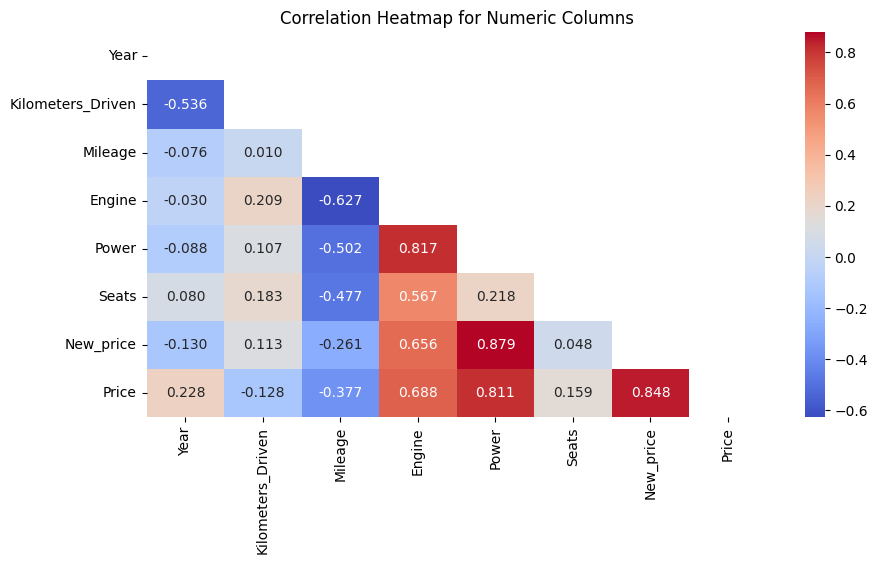

In [ ]:
# Heatmap for numeric columns

corr = data.corr(numeric_only=True)   # for some reason, I had to explicitly specify numeric_only because .corr started trying to use location column
plt.figure(figsize=(10, 5))
plt.title('Correlation Heatmap for Numeric Columns')

### Show just LOWER Triangle since the other corner has duplicate values ###
# 1) 'corr.where' = makes a separate matrix that gives you more control (i.e. in this case, showing just one triangle)
# 2) 'np.tril' = extracts just the lower triangle (as opposed to 'np.triu' for the upper)
# 3) 'np.ones' = creates a matrix of ones (matching the shape of the 'corr' matrix).
#                Helps w/ readability to emphasize that this is a boolean mask (to just show lower triangle)
#                It could also help with efficiency since the function is highly optimized
# 4) 'k=-1' = removes the main diagonal where each variable matches with itself (1.0)
# 5) '.astype(bool)' = used in conjunction with the 'tril' boolean mask function to extract the lower triangle
lower = corr.where(np.tril(np.ones(corr.shape), k=-1).astype(bool))

# Create the actual heatmap with the lower triangle
# 1) the 'coolwarm' color map gives an intuitive aesthetic since this is a "heatmap" afterall
# 2) 'fmt' = sets the rounding (i.e. ".3f" -> three decimal places)
sns.heatmap(lower, annot=True, cmap='coolwarm', fmt=".3f")

plt.show()

**Heatmap Observations**

* The **strongest positive correlations** (>0.80) are between:
  * *'Power'* with *'Engine'* (0.817), *'New_price'* (0.879) & *'Price'* (0.811)
  * *'Price'* with *'New_price'* (0.848)

* On the **negative** side, there were no significant correlations (-0.627 was the largest).

**Results --> Plan**

1. *'New_price'* has so many missing values (around 90%) AND suggests **high multicollinearity** with both of the other predictors that have strong correlation with our target *'Price'* --> it will be dropped when building models.
  * Even though it is an intuitively obvious factor in determining the used price, there are other features that should help when the new price is dropped.

2. We also have a **probable multicollinearity** between *'Power'* & *'Engine'* (i.e. a larger engine has more power: logical) with a factor of 0.859.  But since the *'Engine'* specifically has a lower correlation with our target *'Price'* than *'Power'* (0.747 vs. 0.830, respectively), we'll likely drop *'Engine'*, as well.
  * This choice is also more intuitive when considering the focus on the consumer since it's easier to market "horsepower" than "engine size" to the lay person.

* But before dropping either, we'll run the VIF test just to see their scores before removing (hopefully, they're both over 5.0 to reinforce the decision to drop).

In [ ]:
data

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
2     Chennai  2011              46000    Petrol       Manual      First   
7      Mumbai  2016              36000    Diesel    Automatic      First   
10      Kochi  2018              25692    Petrol       Manual      First   
15      Delhi  2014             110000    Diesel       Manual      First   
20      Kochi  2014              32982    Diesel    Automatic      First   
...       ...   ...                ...       ...          ...        ...   
5999  Chennai  2016              10000    Petrol       Manual      First   
6002   Mumbai  2011              38000    Petrol       Manual      First   
6005     Pune  2016              37208    Diesel       Manual      First   
6010    Delhi  2013              33746    Petrol       Manual      First   
6014    Delhi  2014              27365    Diesel       Manual      First   

      Mileage  Engine   Power  Seats  New_price  Price Manufacturer  
2       18.20  1199.0   88.70    5.0       8.61   4.50        Honda  
7       11.36  2755.0  171.50    8.0      21.00  17.50       Toyota  
10      21.56  1462.0  103.25    5.0      10.65   9.95       Maruti  
15      13.50  2477.0  175.56    7.0      32.01  15.00   Mitsubishi  
20      22.69  1995.0  190.00    5.0      47.87  18.55          BMW  
...       ...     ...     ...    ...        ...    ...          ...  
5999    17.57  1193.0   88.70    5.0       7.77   4.00         Tata  
6002    16.09  1598.0  103.50    5.0      11.91   3.25   Volkswagen  
6005    24.30  1248.0   88.50    5.0       9.93   7.43       Maruti  
6010    18.50  1198.0   86.80    5.0       6.63   3.20        Honda  
6014    28.40  1248.0   74.00    5.0       7.88   4.75       Maruti  

[765 rows x 13 columns]

#### Scatterplot w/ Line of Best Fit for |Correlations| >= 0.70

* This is not really necessary for our context, but it might be interesting to look at the lines & correlation factors compared to the visual orientation of the dots.

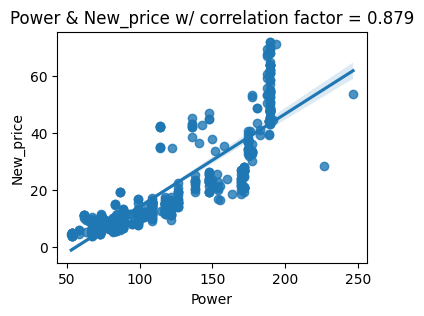

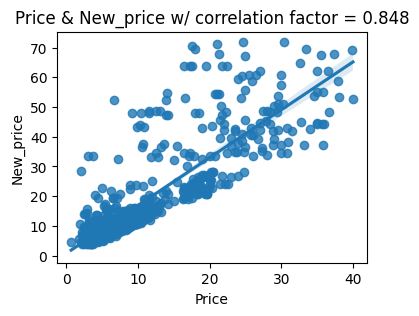

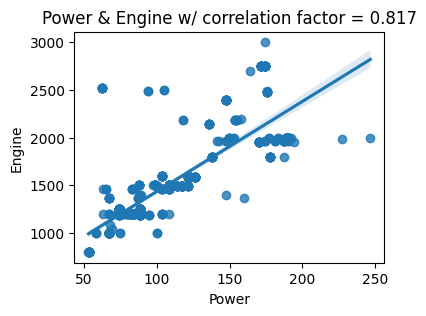

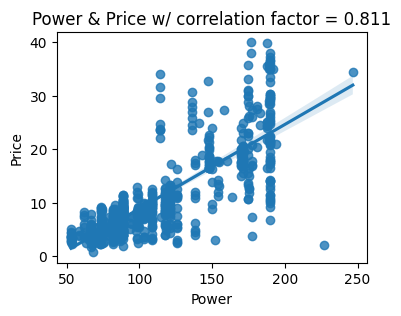

In [ ]:
# Get the pairs with strong correlations
strong_pairs = corr.unstack().sort_values(ascending=False).drop_duplicates()
strong_pairs = strong_pairs[(abs(strong_pairs) >= 0.70) & (abs(strong_pairs) < 1.0)]

# Loop through the pairs and plot the bivariate analysis
for col1, col2 in strong_pairs.index:
    plt.figure(figsize=(4, 3))
    plt.title(f'{col1} & {col2} w/ correlation factor = {round(data[col1].corr(data[col2]), 3)}')
    sns.regplot(x=data[col1], y=data[col2])   # '.regplot' fits a line of best fit onto a scatterplot (hence, "regression")
    plt.show()

* All **"strong"** correlations (absolute value at least 0.7) are **positive**

* The lines have **tight confidence bands** with a few that **slightly widen towards the end**.  This makes sense since they're strong correlations with the widening happening when the data is a little more spread out.

* The slope of *'Power'* vs. *'New_price'* is steeper than one might assume because of that vertical arrangement of dots @ Power just below 200.  I suspect that if those weren't there, the line would be more flat but with a higher correlation factor.

### Categorical - Numeric Comparisons

#### Box Plot (& Violin for Skewed Data)

* We'll run **box plots** comparing *'New_price'* & *'Price'* with *'Location'* & the newly introduced *'Manufacturer'*.

* And if a boxplot shows significant **skews**, we'll run a **violin plot** since that shows densities (which help with skewed data).
  * Since the violin plot employs a density, it will extend past the actual range of the data, which also removes the obvious visualization of outliers.

##### New Price

* I'm including plots for *'New_price'* since this can be an important consideration when looking at used prices, even though it's going to be removed before training the models.

###### Location

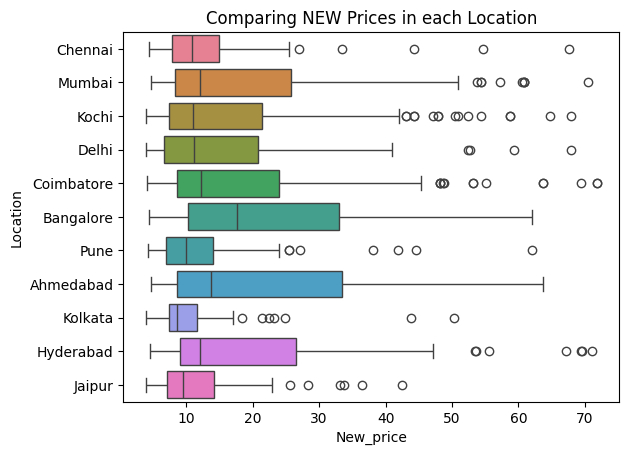

In [ ]:
# Box plot for LOCATION vs. NEW PRICE

sns.boxplot(data=data, hue='Location', x='New_price', y='Location')
plt.xticks()

plt.title('Comparing NEW Prices in each Location')
plt.show()

* Because of the **skew & outliers**, let's see **how a violin plot compares**.

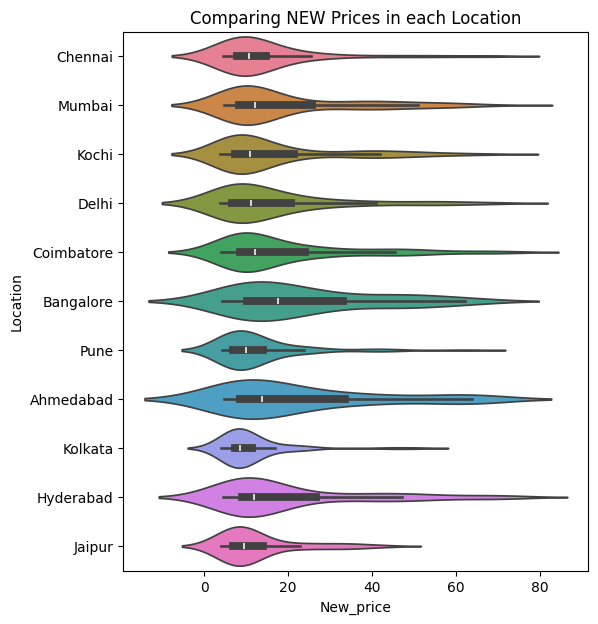

In [ ]:
# Violin plot for LOCATION vs. NEW PRICE

plt.figure(figsize=(6, 7))

sns.violinplot(data=data, hue='Location', x='New_price', y='Location')
plt.xticks()

plt.title('Comparing NEW Prices in each Location')
plt.show()

**Location NEW Price Observations**

* The locations have pretty similar violins (although you can, again, see the differing boxes within).

* Two locations do stand out a bit since they are a bit thicker in the upper end (while the rest are pretty narrow past 3/3.5):  **Bangalore** & **Ahmedabad**.  This indicates that they have more data with higher new prices.

###### Manufacturer

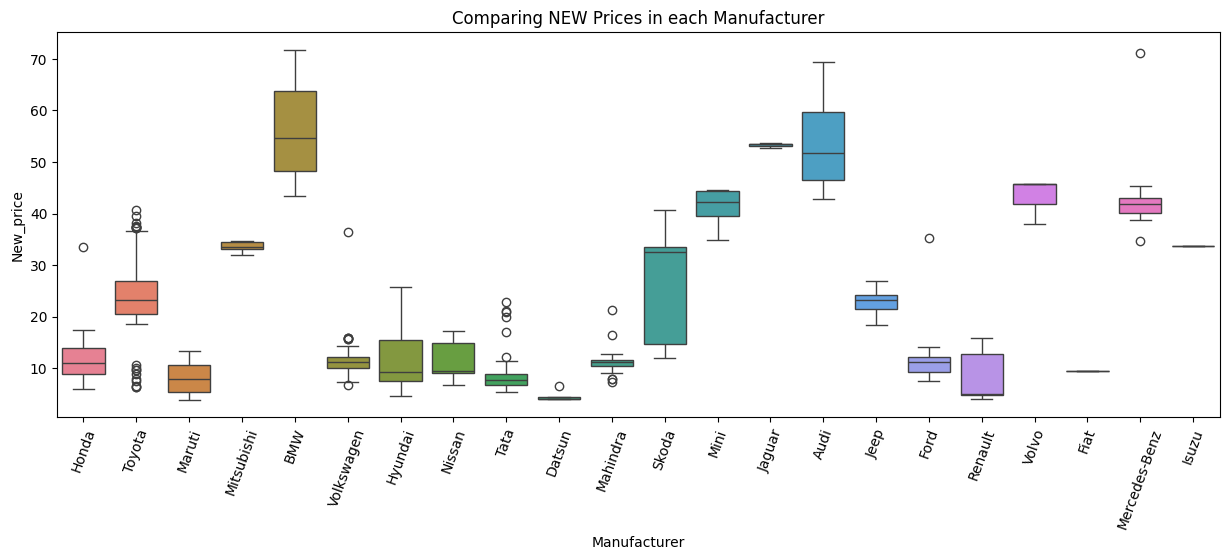

In [ ]:
# Box plot for MANUFACTURER (newly introduced) vs. NEW PRICE

plt.figure(figsize=(15, 5))   # must be BEFORE the plot call to set the size

sns.boxplot(data=data, hue='Manufacturer', x='Manufacturer', y='New_price')

plt.title('Comparing NEW Prices in each Manufacturer')    # must be AFTER the plot call to avoid a blank plot first
plt.xticks(rotation=70)   # rotation is counter-clockwise
plt.show()

* There's quite a bit of **skew** w/ **outliers**, so we'll apply a **violin plot** to compare.

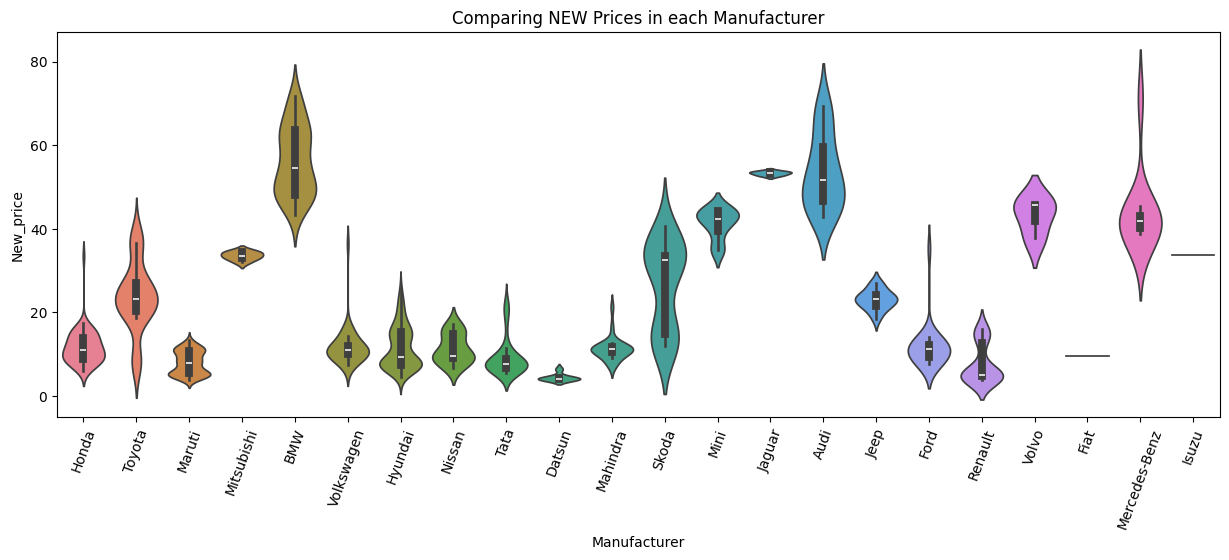

In [ ]:
# Box plot for MANUFACTURER (newly introduced) vs. NEW PRICE

plt.figure(figsize=(15, 5))   # must be BEFORE the plot call to set the size

sns.violinplot(data=data, hue='Manufacturer', x='Manufacturer', y='New_price')

plt.title('Comparing NEW Prices in each Manufacturer')    # must be AFTER the plot call to avoid a blank plot first
plt.xticks(rotation=70)   # rotation is counter-clockwise
plt.show()

**Manufacturer NEW Price Observations**

* The **more tightly packed** Manufacturers (i.e. their prices are more consistent) are: Maruti, Mitsubishi, Datsun, Jaguar & Jeep.
  * Fiat & Isuzu have just a line visible in both Box & Violin plots, suggesting that they likely have very few entries if the price doesn't change.

* On the other hand, there is **significant variance** with companies in two general ways:
  * **Long tail**: Honda, Volkswagon, Tata, Ford & Mercedes-Benz
  * **Wider range w/o significant tail**: BMW, Skoda & Audi
  * Part of this could be due to them having more records and thus, a wider range of models (which would lead to a wider range of prices).

##### Target Price

###### Location

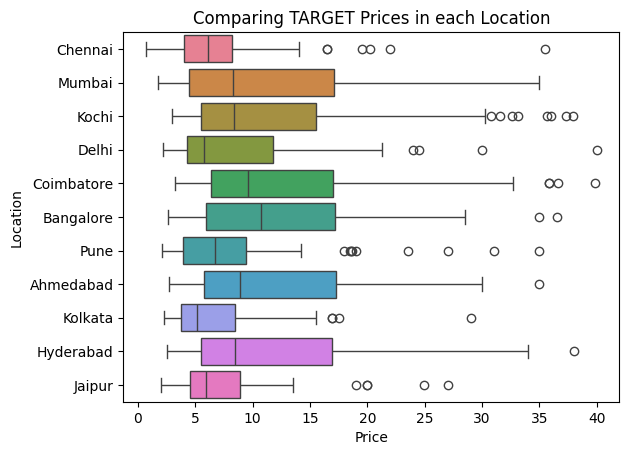

In [ ]:
# Box plot for LOCATION vs. PRICE (target)

sns.boxplot(data=data, hue='Location', x='Price', y='Location')
plt.xticks()

plt.title('Comparing TARGET Prices in each Location')
plt.show()

**Location/Price Boxplot Observations**

* In general, the locations have somewhat similar distributions of price.  There are certainly some tighter boxplots, but the fact that they're relatively similar ranges is likely due, in part, to the log transformation & removal of outliers.
  * Ex: The upper bounds of the whiskers is around 3.00 or slightly below.
  * Medians are roughly around 2.00 with the boxes extending about 0.25 in either direction.

* A couple groupings of distribution widths:
  1. Narrowest = Coimbatore @ Kochi
  2. Widest = Chennai & Mumbai
  * Without knowing about these locations, one possible contributing factor could be that narrower distributions are smaller areas with smaller populations where prices are more similar.  Then larger cities might have a wider range of prices since there are more people and availability of cars for sale.

* Other than Chennai, there does **not** seem to be any **"extreme" skew** here, so we'll **skip** a **violin plot**.

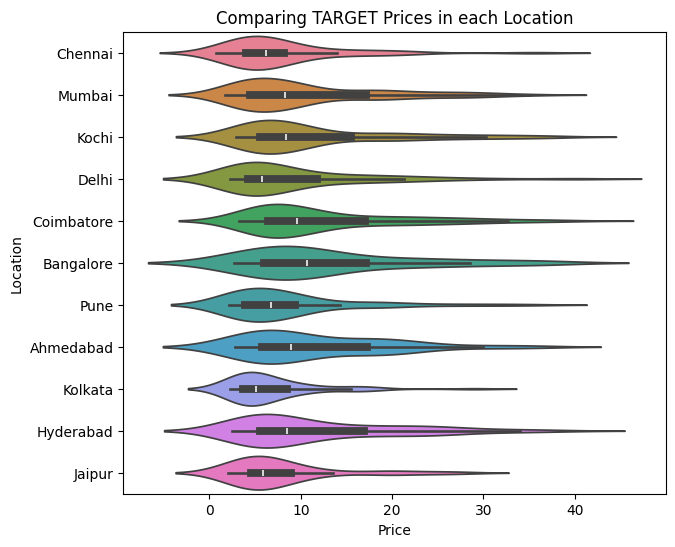

In [ ]:
# Violin plot for LOCATION vs. PRICE (target)

plt.figure(figsize=(7, 6))

sns.violinplot(data=data, hue='Location', x='Price', y='Location')
plt.xticks()

plt.title('Comparing TARGET Prices in each Location')
plt.show()

###### Manufacturer

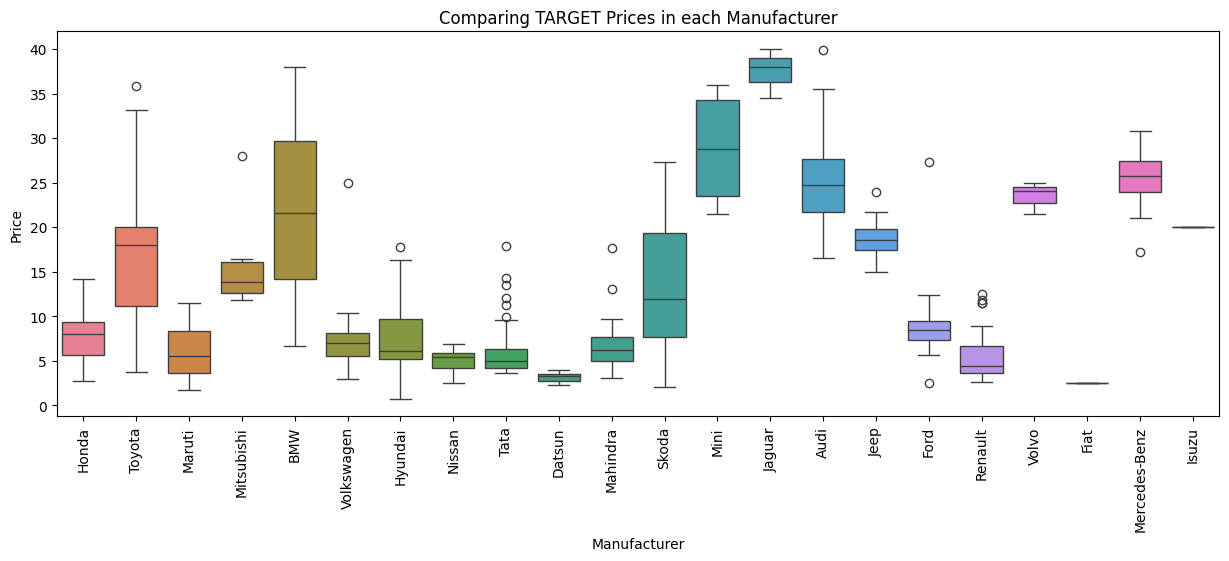

In [ ]:
# Box plot for MANUFACTURER (newly introduced) vs. PRICE (target)

plt.figure(figsize=(15, 5))   # must be BEFORE the plot call to set the size

sns.boxplot(data=data, hue='Manufacturer', x='Manufacturer', y='Price')

plt.title('Comparing TARGET Prices in each Manufacturer')    # must be AFTER the plot call to avoid a blank plot first
plt.xticks(rotation=90)   # rotation is counter-clockwise
plt.show()

* Since the data shows **skew**, compare a **violin plot** (like we did with *'New_price'*.

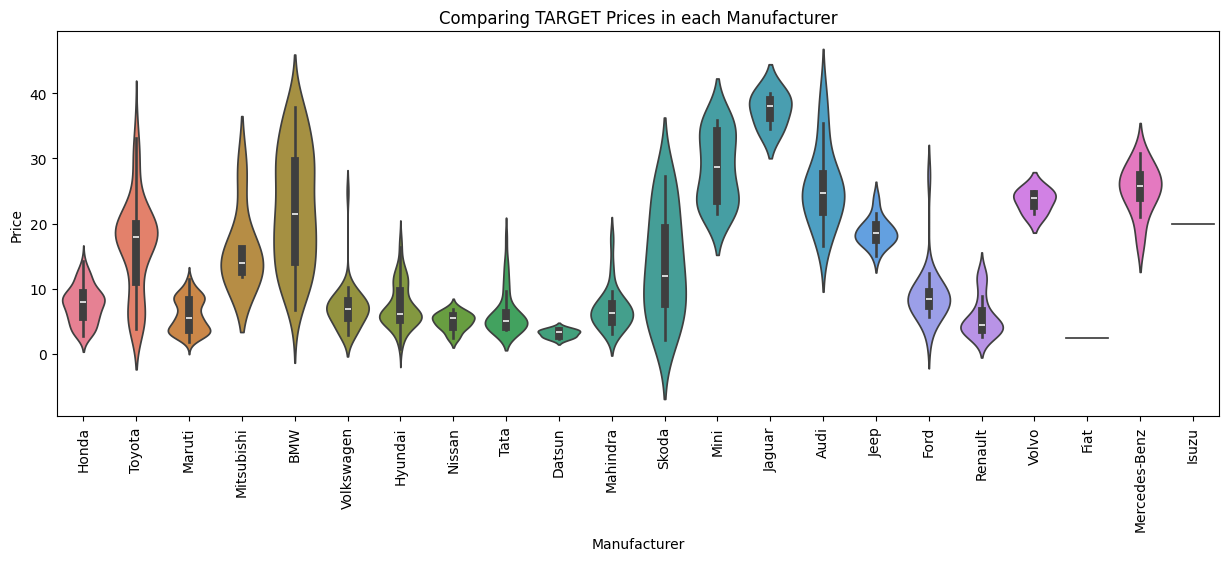

In [ ]:
# Box plot for MANUFACTURER (newly introduced) vs. PRICE (target)

plt.figure(figsize=(15, 5))   # must be BEFORE the plot call to set the size

sns.violinplot(data=data, hue='Manufacturer', x='Manufacturer', y='Price')

plt.title('Comparing TARGET Prices in each Manufacturer')    # must be AFTER the plot call to avoid a blank plot first
plt.xticks(rotation=90)   # rotation is counter-clockwise
plt.show()

**Manufacturer Target Price Distribution Observations**

* The **more tightly packed** Manufacturers (i.e. their prices are more consistent) are: Mitsubishi, Nissan, Datsun, Jeep & BMW.
  * Fiat, Mercedez-Benz, Isuzu & Audi have just a line visible in both Box & Violin plots, suggesting that they likely have very few entries if the price doesn't change.

* On the other hand, there is **significant variance** with companies like Skoda (especially), Toyota, Honda, Maruti & Hyuandai.  Part of this could be due to them having more records and thus, a wider range of models (which would lead to a wider range of prices).
  * Ford has an interesting plot since the boxplot is actually quite compact, but the violin has long tails on each end.  Perhaps this is due to some low & high outliers.

#### Bar Chart

* Using "barplot()" to show the average target *'Price'* per manufacturer

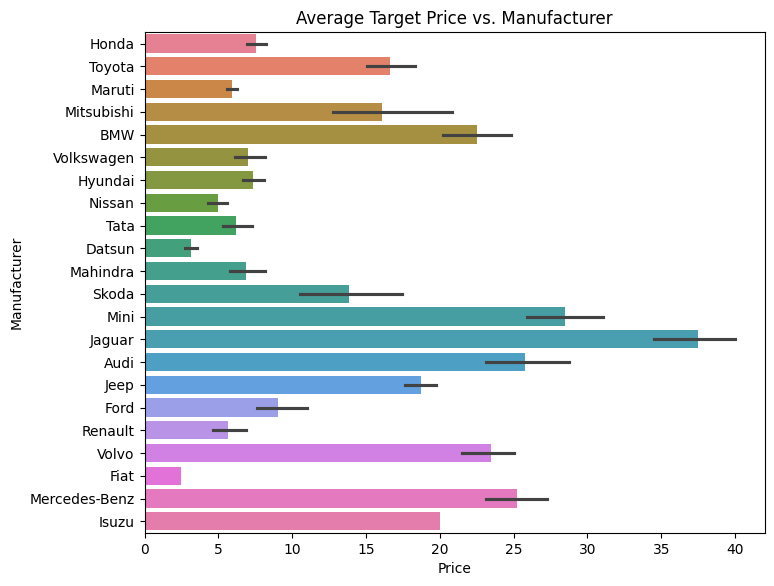

There are  22  brands remaining.


In [ ]:
# Average Target Price vs. Manufacturer
plt.figure(figsize=(8, 6.5))
sns.barplot(y = 'Manufacturer', x = 'Price', data = data, hue='Manufacturer')
plt.title('Average Target Price vs. Manufacturer')
plt.show()
print('There are ', data['Manufacturer'].nunique(), ' brands remaining.')

**Observations**

* Fiat has the lowest average target price (~ 2.5) & Jaguar has the highest (~37.5).

* After removing rows w/ insufficient data & outliers, we have 22 brands remaining.

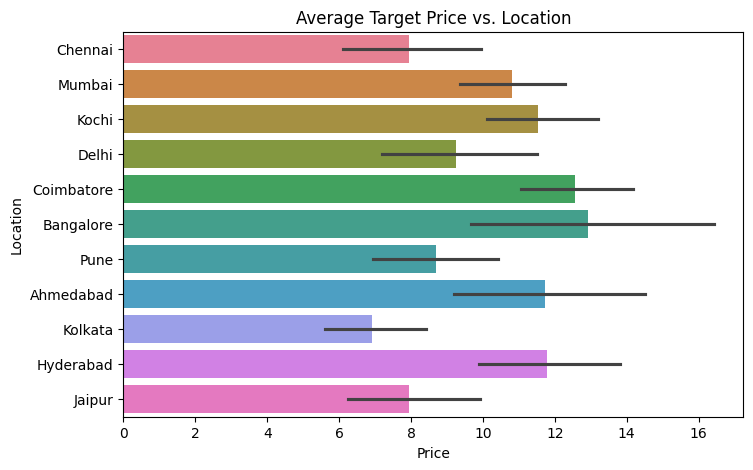

There are  11  locations remaining.


In [ ]:
# Average Target Price vs. Location
plt.figure(figsize=(8, 5))
sns.barplot(y = 'Location', x = 'Price', data = data, hue='Location')
plt.title('Average Target Price vs. Location')
plt.show()
print('There are ', data['Location'].nunique(), ' locations remaining.')

## **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column?

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

**Brand Name Extraction**

* We already did that earlier in the code since it seemed obvious to do towards the beginning after seeing how many different unique model names there were.

* Plus, brand name (or as I called it above, "Manufacturer") is certainly a consideration when pricing & buying a car (which is the main objective of this project: identify features that affect a used car price to help consumers make a decision).

* The overall method of extracting the brand name was to use the split() function on the *'Name'* field in order to create a list with each word as a separate item in that list.

  * Then, with only one brand exception, every manufacturer was the first word in that list.  So we just saved that first word as the brand name in a separate column.

    * **Land Rover** was the one exception, but that was straight-forward to create an "if" branch to see if the first word was "Land" --> so then the brand name (*'Manufacturer'*) was saved as the first two words (i.e. "Land Rover").

    * We made sure to check the list of brand names to see if there were any other brands to look for which had two words, there were none as can be verified below in the list.

In [ ]:
# List of brand names

data['Manufacturer'].unique()

array(['Honda', 'Toyota', 'Maruti', 'Mitsubishi', 'BMW', 'Volkswagen',
       'Hyundai', 'Nissan', 'Tata', 'Datsun', 'Mahindra', 'Skoda', 'Mini',
       'Jaguar', 'Audi', 'Jeep', 'Ford', 'Renault', 'Volvo', 'Fiat',
       'Mercedes-Benz', 'Isuzu'], dtype=object)

### **Missing value treatment**

#### New Price (Drop)

* As we mentioned before, it's time to drop the *'New_price'* column before building models.

In [ ]:
# Set a variable to drop (in case you wanted to do something else)
column_to_drop = 'New_price'

# Check if the column exists in the DataFrame
if column_to_drop in data.columns:
  # Drop the column if it exists
  data.drop(columns=(column_to_drop), inplace=True)

data

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
2     Chennai  2011              46000    Petrol       Manual      First   
7      Mumbai  2016              36000    Diesel    Automatic      First   
10      Kochi  2018              25692    Petrol       Manual      First   
15      Delhi  2014             110000    Diesel       Manual      First   
20      Kochi  2014              32982    Diesel    Automatic      First   
...       ...   ...                ...       ...          ...        ...   
5999  Chennai  2016              10000    Petrol       Manual      First   
6002   Mumbai  2011              38000    Petrol       Manual      First   
6005     Pune  2016              37208    Diesel       Manual      First   
6010    Delhi  2013              33746    Petrol       Manual      First   
6014    Delhi  2014              27365    Diesel       Manual      First   

      Mileage  Engine   Power  Seats  Price Manufacturer  
2       18.20  1199.0   88.70    5.0   4.50        Honda  
7       11.36  2755.0  171.50    8.0  17.50       Toyota  
10      21.56  1462.0  103.25    5.0   9.95       Maruti  
15      13.50  2477.0  175.56    7.0  15.00   Mitsubishi  
20      22.69  1995.0  190.00    5.0  18.55          BMW  
...       ...     ...     ...    ...    ...          ...  
5999    17.57  1193.0   88.70    5.0   4.00         Tata  
6002    16.09  1598.0  103.50    5.0   3.25   Volkswagen  
6005    24.30  1248.0   88.50    5.0   7.43       Maruti  
6010    18.50  1198.0   86.80    5.0   3.20        Honda  
6014    28.40  1248.0   74.00    5.0   4.75       Maruti  

[765 rows x 12 columns]

#### Looking at Each Feature with Missing Data

* Reminder of the columns w/ null values @ the beginning

In [ ]:
data_orig.isnull().sum()  # before removing outliers

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 34
Power                 129
Seats                  39
New_price            6165
Price                1218
Manufacturer            0
dtype: int64

* Normally, we'd have to deal with all those variables with missing data.  However, after removing outliers, the rows with missing data also disappeared.

In [ ]:
data.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Manufacturer         0
dtype: int64

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

* There were a lot of **missing** values for price data (especially *'New_price'*).

* **Outliers** and **skewedness** present another challenge.

* In fact, I spent too much time looking up MPGe (equivalent MPG for electric cars) and finding mileage data for CNG cars (Compressed Natural Gas) to fill in those blanks.  But when I ran the outlier removal, those rows dropped out anyway.  In fact, even with a wider outlier removal thresshold of 3xIQR (instead of 1.5), I believe any rows with blanks happened to drop out.

* The numerical values are also on vastly different scales (ex: *'Seats'* << *'Year'* << *'Kilometers_Driven'*)

* The **large number** of **unique car names** (which also include the manufacturer within that field) make it pointless to analyze --> **extracting** the **manufacturer** can help since it:
  1. Greatly reduces the amount of uniques (since we'll ignore the actual name anyway)
  2. Allows us to focus on the brand name, which is a consideration when pricing & buying a car.  This allows us to not totally lose sight of what cars we're analyzing after dropping the *'Name'* column while building & testing models.

* *'Seats'* was inputted as a **float** instead of an **int**.  I didn't think it would be an issue until I got down to the Decision Tree and saw that the root node had a break of "Seats <= 131.1", which obviously doesn't make any sense.
  * And it has low correlation factors & VIF score, so it wasn't tightly tied to any other feature.
  * But even after conversion, it didn't help, so I'm not sure what's happening with the upcoming decision tree.

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name.
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

In [ ]:
# Make column for price_log

data['price_log'] = np.log(data['Price'] + 1)   # Add one to ensure positive result

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y).
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:**

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

* To answer the question directly above:
  
  * *'Name'* has over two thousand uniques, impractical to analyze as a category
  
  * We drop the target variable *'Price'* so that the models can calculate effectiveness (error, fit, etc.) using that as the dependent.
    * The same is true for *'price_log'* since that's just *'Price'* after a log transformation.
  
  * For *'Kilometers_Driven'*, I will run the models first with it still there and then compare to if it's logged (like *'Price'*) because there's no reason obvious to me to drop it.
    * Yes, it's significantly skewed, but its values are still realistic.  And as the below list shows, the fewest km remaining are still 600 (which could be true if it wasn't driven much) after removing outliers.

In [ ]:
# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [ ]:
import math # for reversing log transformation on 'Price'

In [ ]:
# Split the data into train and test
X = data.drop(['Price', 'Engine', 'price_log'], axis=1)   # also dropping 'Price' since we're using 'price_log' for model training instead
y = data['price_log']

# Encode categorical variables
X = pd.get_dummies(X, columns=['Location','Fuel_Type','Transmission','Owner_Type', 'Manufacturer'])

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(
      X, y,
      test_size = 0.20,   # sets 20% for test data & leaving 80% for training data
      shuffle = True,     # reorders the list when taking random samples
      random_state = 1    # sets a seed to reproduce results while comparing different model runs
    )


In [ ]:
# Check splitting size results
print('training data = ', len(X_train), ' = ', (len(X_train)/len(X))*100, '%')
print('test data = ', len(X_test), ' = ', (len(X_test)/len(X))*100, '%')
print('total = ', len(X_train) + len(X_test))
print('pre-split length = ', len(X))

training data =  612  =  80.0 %
test data =  153  =  20.0 %
total =  765
pre-split length =  765


* I'm just making sure the split resulted in the right proportions.  Since I've been using several different copies and versions of variables & datasets during my coding (which I've now streamlined down), sometimes I get results that don't make sense.

In [ ]:
# Cast the input data to float64 ("float" Python command converts to NumPy float64 type)
X_train = X_train.astype(float)    # this was not necessary on April 1, 2024; but now it's required since statsmodels can suddenly not handle boolean
X_test = X_test.astype(float)

## Model Building - Linear Regression

###### **Adjusted R-sq function**

In [ ]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)   # measures variance in MEDV
    n = predictors.shape[0]     # number of observations in the dataset (= rows here, since no missing values)
    k = predictors.shape[1]     # number of independent variables in the model
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))   # standard formula for calculating adjusted R-squared


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different performance metrics to check regression model
def model_performance_regression(model, predictors, target):
    '''
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    '''

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)
    adjr2 = adj_r2_score(predictors, target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = mape_score(target, pred)

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

### WITHOUT CONSTANT

* I initially only tested the OLS with and without a constant, but after some more testing and consulting with AI, I decided to run all the linear models with and without the constant to see if there was any improvement in performance.

#### **Performance Checks (pt. 1 - OLS)**

In [ ]:
# Train the BASE model (no constant)
olsmodel = sm.OLS(y_train, X_train).fit()

# Get the model summary
olsmodel.summary()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     177.6
Date:                Fri, 12 Apr 2024   Prob (F-statistic):          1.43e-295
Time:                        04:13:21   Log-Likelihood:                 222.73
No. Observations:                 612   AIC:                            -361.5
Df Residuals:                     570   BIC:                            -176.0
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Year                

In [ ]:
print('Performance on ' +  bold_text('TRAIN') + ' data: ')
lin_reg_train = model_performance_regression(olsmodel, X_train, y_train)
lin_reg_train

Performance on TRAIN data: 


RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.168153  0.128137   0.927406        0.921496  6.322593

In [ ]:
print('Performance on ' + bold_text('TEST') + ' data: ')

# Make a variable for comparison later
lin_reg_test = model_performance_regression(olsmodel, X_test, y_test)
lin_reg_test

Performance on TEST data: 


RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.195618  0.137312   0.902631        0.860377  6.648424

**TRAIN vs. TEST Observations:**

* The **errors** (RMSE, MAE & MAPE) all **slightly increased**

* While the **fit** (R-sq & Adj. R-sq) **slightly decreased** (which makes sense if the errors increased since they're generally inversely related).

* Although it's not a drastic difference, it could suggest **slight overfitting**.  So let's consider the OLS Summary results.

##### Check for Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

print(checking_vif(X_train))

                       feature       VIF
0                         Year  2.067078
1            Kilometers_Driven  1.963702
2                      Mileage  6.390740
3                        Power  7.204895
4                        Seats  3.239493
5           Location_Ahmedabad       inf
6           Location_Bangalore       inf
7             Location_Chennai       inf
8          Location_Coimbatore       inf
9               Location_Delhi       inf
10          Location_Hyderabad       inf
11             Location_Jaipur       inf
12              Location_Kochi       inf
13            Location_Kolkata       inf
14             Location_Mumbai       inf
15               Location_Pune       inf
16               Fuel_Type_CNG       inf
17            Fuel_Type_Diesel       inf
18            Fuel_Type_Petrol       inf
19      Transmission_Automatic       inf
20         Transmission_Manual       inf
21            Owner_Type_First       inf
22           Owner_Type_Second       inf
23            Ow

**VIF Observations**

* We have **two** variables that have scores > 5.  In descending order:
  1. *'Power'* > 7
  3. *'Mileage'* > 6 (surprising to me since its highest heatmap correlation factor was only about -0.6)

* But both are valuable factors to consider when pricing & buying a used car, so **dropping** either does **not fit** the context.  We'll try regularization methods to address this, but it's unlikely to help much since the data lacks the traits which would benefit from these.  Let's see...

#### **Check (pt. 2) Address High VIF -> Ridge & Lasso Regression**

##### L2 / Ridge Regression

* Start with default alpha and tune as necessary

In [ ]:
# Run Ridge on most recent data (one round with constant)
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

Ridge()

In [ ]:
# Running it on training data w/ default alpha=1
model_performance_regression(ridge_model, X_train, y_train)

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.169035  0.129223   0.926643         0.92067  6.379982

In [ ]:
# On test data
ridge_reg = model_performance_regression(ridge_model, X_test, y_test)
ridge_reg

RMSE      MAE  R-squared  Adj. R-squared      MAPE
0  0.196574  0.13778   0.901678         0.85901  6.655618

**L2 / Ridge Observations:**

* The **errors** (RMSE, MAE & MAPE) all had **slight increases** in both the **train** & **test** data.

* Unsurprisingly, the **fit** for both sets (R-sq & Adj R-sq) had **minor dips**.

* We'll see if L1 / Lasso has different results.

##### L1 / Lasso

In [ ]:
# Run Lasso on most recent data (one round with constant)
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [ ]:
# Running it on training data w/ default alpha=1
model_performance_regression(lasso_model, X_train, y_train)

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.327777  0.245776   0.724166        0.701709  12.445443

In [ ]:
# On test data
lasso_reg = model_performance_regression(lasso_model, X_test, y_test)
lasso_reg

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.312122  0.241016   0.752115        0.644543  11.885197

**L1 / Lasso Observations:**

* The **TRAINING errors** nearly **doubled**, and the **R-sq fits** lost over 20% from the Ridge Regression.
  * Similar results occurred with the **TEST** data, although not quite as large.

* And the **significantly lower fits** suggest that Lasso is **not** a good model (at least with the default alpha) for this data.

* Possible reasons for this could be:
  * We only have five features left (all of which seem significant since they have very low p-values), so the benefit of Lasso's eliminating many irrelevant features is not realized.
  * On the other hand, there are still a couple features (*'Mileage'* & *'Power'*) that have VIF scores a bit over the 5.0 threshhold which suggest some multicollinearity.
    * Furthermore, when pricing a used car, the remaining five features that we have probably all have some effect (both conceptually & based on their low p-value scores).

##### **Tune Ridge & Lasso with Optimized Alpha**

###### Ridge w/ Optimized Alpha

In [ ]:
# Implementing KFold with 10 subsets of the most recent training data
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10, 20]}    # trying different alpha values

model = Ridge()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [ ]:
# Working towards a variable 'best_alpha'
best_params = model_cv.best_params_ #getting optimised parameters for alpha
best_alpha = best_params['alpha']
best_alpha

0.5

In [ ]:
# First fit only to Training Data
ridge_model_tuned = Ridge(alpha = best_alpha) # creating Tuned Ridge Regression model using optimised alpha value
ridge_model_tuned.fit(X_train, y_train) # Fitting the data into the tuned model

Ridge(alpha=0.5)

In [ ]:
# Check performance on training data
model_performance_regression(ridge_model_tuned, X_train, y_train) # performance metrics on training data

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.168483  0.128628   0.927121        0.921187  6.350315

In [ ]:
# Performance check on test data
ridge_reg_tuned = model_performance_regression(ridge_model_tuned, X_test, y_test)  # performance metrics on test data
ridge_reg_tuned

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.196089  0.137372   0.902162        0.859704  6.636593

* In both cases, the **original model** (before any regularization or optimization) performed **better** (slightly lower errors and better fits).

###### Lasso w/ Optimized Alpha

In [ ]:
# Implementing KFold with 10 subsets of the most recent training data
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10, 20]}    # trying different alpha values

model = Lasso()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [ ]:
# Working towards a variable 'best_alpha'
best_params = model_cv.best_params_ #getting optimised parameters for alpha
best_alpha = best_params['alpha']
best_alpha

0.001

In [ ]:
# First fit only to Training Data
lasso_model_tuned = Lasso(alpha = best_alpha) # creating Tuned Lasso Regression model using optimized alpha value
lasso_model_tuned.fit(X_train, y_train) # Fitting the data into the tuned model

Lasso(alpha=0.001)

In [ ]:
# Check performance on training data
model_performance_regression(lasso_model_tuned, X_train, y_train) #getting performance metrics on training data

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.172044  0.131336   0.924008        0.917821  6.507852

In [ ]:
# Performance check on test data
lasso_reg_tuned = model_performance_regression(lasso_model_tuned, X_test, y_test) #getting performance metrics on test data
lasso_reg_tuned

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.200495  0.142307   0.897716        0.853328  6.820849

* As expected, although optimizing Lasso helped its own case, it still did not perform better than the original model.

* On to other methods...

#### **Check pt. 3 (Elastic Net)**

* This likely won't help since:
  1. We don't have highly correlated data.
  2. The data is not sparse (after removing outliers) or consisting of many dimensions (features).
  3. We didn't see much overfitting.

  * But it's easy/fast enough to try and see what happens...

In [ ]:
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train, y_train)

ElasticNet()

In [ ]:
model_performance_regression(elasticnet_model, X_train, y_train)

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.327097  0.244417    0.72531        0.702945  12.360994

In [ ]:
elasticnet_reg = model_performance_regression(elasticnet_model, X_test, y_test)
elasticnet_reg

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.312763  0.240042   0.751096        0.643081  11.820109

* This is similar to unoptimized Lasso (i.e. not good results).

**Now try optimizing Elastic**

In [ ]:
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9],
         'l1_ratio': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05]}
model = ElasticNet()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9],
                         'l1_ratio': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05]},
             return_train_score=True, scoring='r2')

In [ ]:
# Working towards a variable 'best_alpha'
best_params = model_cv.best_params_ #getting optimized parameters for alpha
best_params

{'alpha': 0.001, 'l1_ratio': 0.05}

In [ ]:
best_alpha = best_params['alpha']
best_ratio = best_params['l1_ratio']

In [ ]:
elasticnet_model_tuned = ElasticNet(alpha = best_alpha, l1_ratio = best_ratio)
elasticnet_model_tuned.fit(X_train, y_train)

ElasticNet(alpha=0.001, l1_ratio=0.05)

In [ ]:
model_performance_regression(elasticnet_model_tuned, X_train, y_train)

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.168718  0.128935   0.926917        0.920967  6.366589

In [ ]:
elasticnet_reg_tuned = model_performance_regression(elasticnet_model_tuned, X_test, y_test)
elasticnet_reg_tuned

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.196586  0.137997   0.901666        0.858993  6.658785

* Certainly an improvement over unoptimized Elastic, but still not better than original OLS.

#### Compare Models Before km_log


In [ ]:
models = pd.concat([lin_reg_test,
                   ridge_reg, ridge_reg_tuned,
                   lasso_reg, lasso_reg_tuned,
                   elasticnet_reg, elasticnet_reg_tuned],
                  axis=0
                  ) #combining all models into a single dataframe
models['Models'] = ['Least Squares', 'Ridge Regression', 'Ridge Regression Tuned', 'Lasso Regression',
                                      'Lasso Regression Tuned', 'Elastic Net Regression',
                    'Elastic Net Regression Tuned'] #adding names of the models as a column to the dataframe
models = models.iloc[:,[5, 0,1,2,3,4]] #ordering names of the models (column 5) as the first column
models

Models      RMSE       MAE  R-squared  \
0                 Least Squares  0.195618  0.137312   0.902631   
0              Ridge Regression  0.196574  0.137780   0.901678   
0        Ridge Regression Tuned  0.196089  0.137372   0.902162   
0              Lasso Regression  0.312122  0.241016   0.752115   
0        Lasso Regression Tuned  0.200495  0.142307   0.897716   
0        Elastic Net Regression  0.312763  0.240042   0.751096   
0  Elastic Net Regression Tuned  0.196586  0.137997   0.901666   

   Adj. R-squared       MAPE  
0        0.860377   6.648424  
0        0.859010   6.655618  
0        0.859704   6.636593  
0        0.644543  11.885197  
0        0.853328   6.820849  
0        0.643081  11.820109  
0        0.858993   6.658785

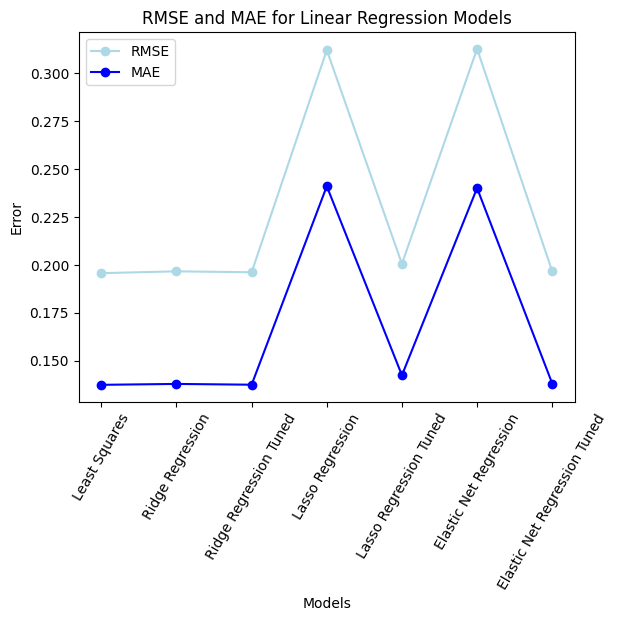

In [ ]:
# Collect RMSE & MAE values for all six models on one line graph

plt.plot(models['Models'], models['RMSE'], 'o-', color='lightblue')
plt.plot(models['Models'], models['MAE'], 'o-', color='blue')

plt.title('RMSE and MAE for Linear Regression Models')
plt.xlabel('Models')
plt.xticks(rotation = 60)

plt.ylabel('Error')
plt.legend(['RMSE', 'MAE'])

plt.show()

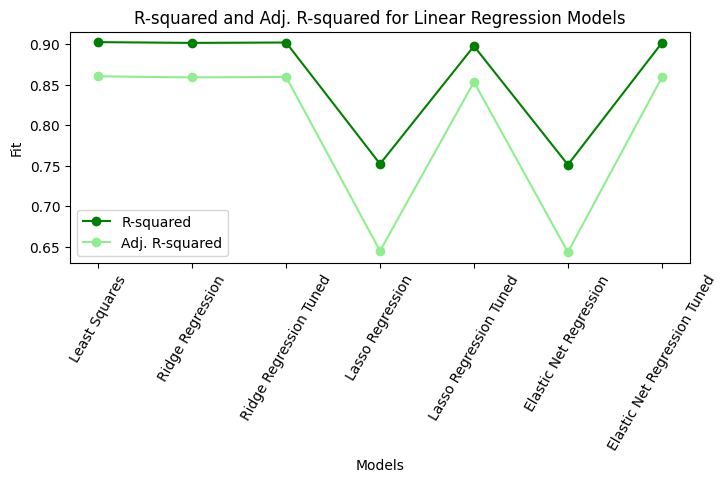

In [ ]:
# Collect RMSE & MAE values for all six models on one line graph

plt.figure(figsize=(8, 3))

plt.plot(models['Models'], models['R-squared'], 'o-', color='green')
plt.plot(models['Models'], models['Adj. R-squared'], 'o-', color='lightgreen')

plt.title('R-squared and Adj. R-squared for Linear Regression Models')
plt.xlabel('Models')
plt.xticks(rotation = 60)

plt.ylabel('Fit')
plt.legend(['R-squared', 'Adj. R-squared'])

plt.show()

#### INTERPRETING RESULTS

There are two main points to keep in mind when interpreting what these results mean:

1. The target price had a log transformation, so that needs to be reversed in order to accurately interpret the *RMSE*, *MAE* & *R-sq*... but NOT the *Adj. R-sq* nor the *MAPE*

2. In particular, the *MAPE* is a percentage, so we'll clarify what that means regarding the actual target prices.  Here, we see that the **best** model (OLS) has about a **6.65%** error from predicted to actual price results & the worst (unoptimized Lasso) is off about **11.89%**.

* Now we'll convert those errors to real money to get a perspective.

In [ ]:
# Apply the exponential function to errors individually (for clarity in comparison)

# Training Data
rmse1 = math.exp(lin_reg_train['RMSE'])
mae1 = math.exp(lin_reg_train['MAE'])

# Test Data
rmse2 = math.exp(lin_reg_test['RMSE'])
mae2 = math.exp(lin_reg_test['MAE'])


# Print the results
print(bold_text("TRAIN:"))
print("RMSE:", round(rmse1, 3))
print("MAE:", round(mae1, 3))

print('-' * 12)   # print separator line

print(bold_text("TEST:"))
print("RMSE:", round(rmse2, 3))
print("MAE:", round(mae2, 3))

TRAIN:
RMSE: 1.183
MAE: 1.137
------------
TEST:
RMSE: 1.216
MAE: 1.147


In [ ]:
# Convert the above to INR & USD

# Training INR & USD
inr_error1 = rmse1 * 100000         # converting based on the price variable definition
inr_error2 = mae1 * 100000
usd_error1 = inr_error1 * 0.012     # use currency conversion of 1 INR = 0.012 USD
usd_error2 = inr_error2 * 0.012

# Test INR & USD
inr_error3 = rmse2 * 100000
inr_error4 = mae2 * 100000
usd_error3 = inr_error3 * 0.012
usd_error4 = inr_error4 * 0.012


# Format the amounts for money
#Training
inr_error1_formatted = '₹{:,.2f}'.format(inr_error1)
inr_error2_formatted = '₹{:,.2f}'.format(inr_error2)
usd_error1_formatted = '${:,.2f}'.format(usd_error1)
usd_error2_formatted = '${:,.2f}'.format(usd_error2)

#Test
inr_error3_formatted = '₹{:,.2f}'.format(inr_error3)
inr_error4_formatted = '₹{:,.2f}'.format(inr_error4)
usd_error3_formatted = '${:,.2f}'.format(usd_error3)
usd_error4_formatted = '${:,.2f}'.format(usd_error4)


#####  PRINT the converted results


print(bold_text("TRAIN:"))
print("RMSE (INR): ", inr_error1_formatted)
print("MAE (INR): ", inr_error2_formatted)
print('-' * 10)
print("RMSE (USD): ", usd_error1_formatted)
print("MAE (USD): ", usd_error2_formatted)

print('\n', '=' * 30, '\n')   # print separator line

print(bold_text("TEST:"))
print("RMSE (INR): ", inr_error3_formatted)
print("MAE (INR): ", inr_error4_formatted)
print('-' * 10)
print("RMSE (USD): ", usd_error3_formatted)
print("MAE (USD): ", usd_error4_formatted)

TRAIN:
RMSE (INR):  ₹118,311.79
MAE (INR):  ₹113,670.88
----------
RMSE (USD):  $1,419.74
MAE (USD):  $1,364.05


TEST:
RMSE (INR):  ₹121,606.25
MAE (INR):  ₹114,718.61
----------
RMSE (USD):  $1,459.27
MAE (USD):  $1,376.62


**Error Conversion Observation (pt. 1 - raw money)**

* So the model is about **₹120,000 off** or roughly **$1,400 off**.

In [ ]:
# INR mean price
inr_mean_price = data['Price'].mean() * 100000
inr_mean_price_formatted = '₹{:,.2f}'.format(inr_mean_price)
print('Average ', bold_text('INR Price: '), inr_mean_price_formatted)

# USD mean price
usd_mean_price = inr_mean_price * 0.012
usd_mean_price_formatted = '${:,.2f}'.format(usd_mean_price)
print('Average ', bold_text('USD Price: '), usd_mean_price_formatted)

Average  INR Price:  ₹1,058,015.69
Average  USD Price:  $12,696.19


In [ ]:
# Percentage of error off mean

inr_mean_error_percent = 120000 / inr_mean_price * 100     # Just using 120,000 as a ballpark based on the above results
inr_mean_error_percent_rounded = round(inr_mean_error_percent, 2)

usd_mean_error_percent = 1400 / usd_mean_price * 100       # Similarly with 1,400
usd_mean_error_percent_rounded = round(usd_mean_error_percent, 2)

print('INR Error is about', bold_text(str(inr_mean_error_percent_rounded)+'%'), 'off the mean')
print('USD Error is about', bold_text(str(usd_mean_error_percent_rounded)+'%'), 'off the mean')

INR Error is about 11.34% off the mean
USD Error is about 11.03% off the mean


**Error Conversion Observation (pt. 2 - percentage of the mean)**

* This approximates to only about **11%** off the mean price in both currencies (the difference is due to some manual rounding).

* It might seem unnecessary to calculate the error percentage off the mean since we already had the MAPE, but that was a more specific percentage off predicted/actual values... I was just curious to see how that error compared to the actual mean.

**Models Comparisons:**

* As we can see from the comparison summary, **Least Squares** performed the **best** (lowest errors & best fits).

* In order to interpret the results properly, we'll perform a **"math.exp"** on the **first three metrics** to reverse the log transformation.
  * But **Adj. R-squared** is *not* affected by the log (so that will not receive the math.exp).
  * Also, the **MAPE** is a *percentage error*, so no math.exp on that either.

#### **Kilometers_Driven --> km_log**

* The project prompt asked about why we would drop *'Kiolmeters_Driven'*, but other than it being skewed, I don't see a clear reason to drop it altogether.  Instead, let's see how the models react to it being logged

##### Make a New Split

In [ ]:
data_log = data.copy()    # making a copy so I can return to "data" if this log transformation doesn't help

In [ ]:
data_log['km_log'] = np.log(data_log['Kilometers_Driven'] + 1)

In [ ]:
# Split the data BUT with an extra "_log" to differentiate between our previous model
X_log = data_log.drop(['Price', 'Engine', 'Kilometers_Driven', 'price_log'], axis=1)   # 'Kilometers_Driven' => 'km_log'
y = data_log['price_log']   # y doesn't need to change since it's still the same dependent variable

# Encode categorical variables
X_log = pd.get_dummies(X_log, columns=['Location','Fuel_Type','Transmission','Owner_Type', 'Manufacturer'])

# Split the data into train and test
X_log_train, X_log_test, y_train, y_test = train_test_split(
      X_log, y,
      test_size = 0.20,   # sets 20% for test data & leaving 80% for training data
      shuffle = True,     # reorders the list when taking random samples
      random_state = 1    # sets a seed to reproduce results while comparing different model runs
    )

##### OLS

In [ ]:
import statsmodels.api as sm

# Just reusing "X_train2" & "X_test2" as copies of the "X_log_" versions since that's how..
# -> I had written them before copying over a whole new linear model group for without constant
X_train2 = X_log_train
# Cast the boolean array to np.float64
X_train2 = X_train2.astype(np.float64)

X_test2 = X_log_test

# Train the model
olsmodel2 = sm.OLS(y_train, X_train2).fit()

# Get the model summary
olsmodel2.summary()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     172.4
Date:                Fri, 12 Apr 2024   Prob (F-statistic):          3.71e-292
Time:                        04:13:40   Log-Likelihood:                 214.24
No. Observations:                 612   AIC:                            -344.5
Df Residuals:                     570   BIC:                            -159.0
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Year                

In [ ]:
print('Performance on ' +  bold_text('TRAIN') + ' data: ')
lin_reg_train = model_performance_regression(olsmodel2, X_train2, y_train)
lin_reg_train

Performance on TRAIN data: 


RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.170502  0.130416   0.925364        0.919288  6.471896

In [ ]:
print('Performance on ' +  bold_text('TEST') + ' data: ')
lin_reg_test = model_performance_regression(olsmodel2, X_test2, y_test)
lin_reg_test

Performance on TEST data: 


RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.198575  0.136468   0.899666        0.856124  6.635891

* The only difference when logging the *'Kilometers_Driven'* is that the **Adj. R-sq** is actually **a bit lower** now after performing a log transformation, so really it's a worse fit.
  * Every other OLS metric is exactly equal down to six digits.

##### Check for Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

print(checking_vif(X_train2))

                       feature       VIF
0                         Year  1.961651
1                      Mileage  6.430930
2                        Power  7.203300
3                        Seats  3.236457
4                       km_log  1.779721
5           Location_Ahmedabad       inf
6           Location_Bangalore       inf
7             Location_Chennai       inf
8          Location_Coimbatore       inf
9               Location_Delhi       inf
10          Location_Hyderabad       inf
11             Location_Jaipur       inf
12              Location_Kochi       inf
13            Location_Kolkata       inf
14             Location_Mumbai       inf
15               Location_Pune       inf
16               Fuel_Type_CNG       inf
17            Fuel_Type_Diesel       inf
18            Fuel_Type_Petrol       inf
19      Transmission_Automatic       inf
20         Transmission_Manual       inf
21            Owner_Type_First       inf
22           Owner_Type_Second       inf
23            Ow

* Again, the VIF scores with *'km_log'* are **very similar** to *'Kilometers_Driven'*.

##### **Default Ridge, Lasso & Elastic**

* We'll look at results at the end with a model summary

###### Def. Ridge

In [ ]:
# Run Ridge on most recent data (3rd round)
ridge_model = Ridge()
ridge_model.fit(X_train2, y_train)

Ridge()

In [ ]:
# Running it on training data w/ default alpha=1
ridge_reg = model_performance_regression(ridge_model, X_train2, y_train)
ridge_reg

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.171429  0.131601    0.92455        0.918407  6.533418

In [ ]:
# On test data
ridge_reg = model_performance_regression(ridge_model, X_test2, y_test)
ridge_reg

RMSE     MAE  R-squared  Adj. R-squared      MAPE
0  0.199574  0.1369   0.898654        0.854674  6.633909

###### Def. Lasso

In [ ]:
# Run Lasso on most recent data (3rd round)
lasso_model = Lasso()
lasso_model.fit(X_train2, y_train)

Lasso()

In [ ]:
# Running it on training data w/ default alpha=1
lasso_reg = model_performance_regression(lasso_model, X_train2, y_train)
lasso_reg

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.358635  0.260463   0.669786        0.642901  13.343935

In [ ]:
# On test data
lasso_reg = model_performance_regression(lasso_model, X_test2, y_test)
lasso_reg

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.350243  0.269687   0.687868        0.552414  13.09274

###### Def. Elasitc

In [ ]:
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train2, y_train)

ElasticNet()

In [ ]:
elasticnet_reg = model_performance_regression(elasticnet_model, X_test2, y_test)
elasticnet_reg

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.329328  0.249903   0.724032        0.604273  12.048862

##### **Optimized Ridge, Lasso & Elastic**

###### Opt. Ridge

In [ ]:
# Implementing KFold with 10 subsets of the most recent training data
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10, 20]}    # trying different alpha values

model = Ridge()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(X_train2, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [ ]:
# Working towards a variable 'best_alpha'
best_params = model_cv.best_params_ #getting optimised parameters for alpha
best_alpha = best_params['alpha']
best_alpha

0.5

In [ ]:
# First fit only to Training Data
ridge_model_tuned = Ridge(alpha = best_alpha) # creating Tuned Ridge Regression model using optimised alpha value
ridge_model_tuned.fit(X_train2, y_train) # Fitting the data into the tuned model

Ridge(alpha=0.5)

In [ ]:
# Performance check on test data
ridge_reg_tuned = model_performance_regression(ridge_model_tuned, X_train2, y_train)  # performance metrics on training data
ridge_reg_tuned

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.170853  0.131028   0.925056        0.918955  6.505385

In [ ]:
# Performance check on test data
ridge_reg_tuned = model_performance_regression(ridge_model_tuned, X_test2, y_test)  # performance metrics on test data
ridge_reg_tuned

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.199065  0.136567    0.89917        0.855414  6.621545

###### Opt. Lasso

In [ ]:
# Implementing KFold with 10 subsets of the most recent training data
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10, 20]}    # trying different alpha values

model = Lasso()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(X_train2, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [ ]:
# Working towards a variable 'best_alpha'
best_params = model_cv.best_params_ #getting optimised parameters for alpha
best_alpha = best_params['alpha']
best_alpha

0.001

In [ ]:
# First fit only to Training Data
lasso_model_tuned = Lasso(alpha = best_alpha) # creating Tuned Lasso Regression model using optimized alpha value
lasso_model_tuned.fit(X_train2, y_train) # Fitting the data into the tuned model

Lasso(alpha=0.001)

In [ ]:
# Check performance on training data
lasso_reg_tuned = model_performance_regression(lasso_model_tuned, X_train2, y_train) #getting performance metrics on training data
lasso_reg_tuned

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.174365  0.133523   0.921943        0.915588  6.639703

In [ ]:
# Performance check on test data
lasso_reg_tuned = model_performance_regression(lasso_model_tuned, X_test2, y_test) #getting performance metrics on test data
lasso_reg_tuned

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.204342  0.141808   0.893753        0.847646  6.812168

###### Opt. Elastic

In [ ]:
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train2, y_train)

ElasticNet()

In [ ]:
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9],
         'l1_ratio': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05]}
model = ElasticNet()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(X_train2, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9],
                         'l1_ratio': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05]},
             return_train_score=True, scoring='r2')

In [ ]:
# Working towards a variable 'best_alpha'
best_params = model_cv.best_params_ #getting optimized parameters for alpha
best_params

{'alpha': 0.001, 'l1_ratio': 0.05}

In [ ]:
best_alpha = best_params['alpha']
best_ratio = best_params['l1_ratio']

In [ ]:
elasticnet_model_tuned = ElasticNet(alpha = best_alpha, l1_ratio = best_ratio)
elasticnet_model_tuned.fit(X_train2, y_train)

ElasticNet(alpha=0.001, l1_ratio=0.05)

In [ ]:
elasticnet_reg_tuned = model_performance_regression(elasticnet_model_tuned, X_train2, y_train)
elasticnet_reg_tuned

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.171089  0.131275   0.924849         0.91873  6.518294

In [ ]:
elasticnet_reg_tuned = model_performance_regression(elasticnet_model_tuned, X_test2, y_test)
elasticnet_reg_tuned

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.199576  0.137137   0.898652         0.85467  6.640268

##### **Post 'km_log' Models Comparison**

In [ ]:
models= pd.concat([lin_reg_test,
                   ridge_reg, ridge_reg_tuned,
                   lasso_reg, lasso_reg_tuned,
                   elasticnet_reg, elasticnet_reg_tuned],
                  axis=0
                  ) #combining all models into a single dataframe
models['Models'] = ['Least Squares', 'Ridge Regression', 'Ridge Regression Tuned', 'Lasso Regression',
                                      'Lasso Regression Tuned', 'Elastic Net Regression',
                    'Elastic Net Regression Tuned'] #adding names of the models as a column to the dataframe
models = models.iloc[:,[5, 0,1,2,3,4]] #ordering names of the models as the first column
models

Models      RMSE       MAE  R-squared  \
0                 Least Squares  0.198575  0.136468   0.899666   
0              Ridge Regression  0.199574  0.136900   0.898654   
0        Ridge Regression Tuned  0.199065  0.136567   0.899170   
0              Lasso Regression  0.350243  0.269687   0.687868   
0        Lasso Regression Tuned  0.204342  0.141808   0.893753   
0        Elastic Net Regression  0.329328  0.249903   0.724032   
0  Elastic Net Regression Tuned  0.199576  0.137137   0.898652   

   Adj. R-squared       MAPE  
0        0.856124   6.635891  
0        0.854674   6.633909  
0        0.855414   6.621545  
0        0.552414  13.092740  
0        0.847646   6.812168  
0        0.604273  12.048862  
0        0.854670   6.640268

#### Check Assumptions BEFORE Hyperparameter Tuning

1. Mean of residuals should be 0 ✔
2. Normality of error terms ✔
3. Linearity of variables ✔
4. No Heteroscedasticity ❌

###### **1. Mean of residuals should be 0**

In [ ]:
# Using original OLS model w/ "X_train1" since that yielded best performance metrics
y_pred_log = olsmodel.predict(X_train)

In [ ]:
y_train_predicted = olsmodel.predict(X_train)
y_test_predicted = olsmodel.predict(X_test)

In [ ]:
y_pred = np.exp(y_pred_log)
y_actual = data['Price']

In [ ]:
# Residuals
residuals_train = y_train - y_train_predicted
residuals_test = y_test - y_test_predicted

In [ ]:
residuals_train.mean()

1.3311628487952912e-13

In [ ]:
residuals_test.mean()

-0.01936793395842632

* *Both residuals are quite low, so very close to 0 (especially the training)*

* ***Residuals = 0 Check!***

###### **2. Normality of error terms**

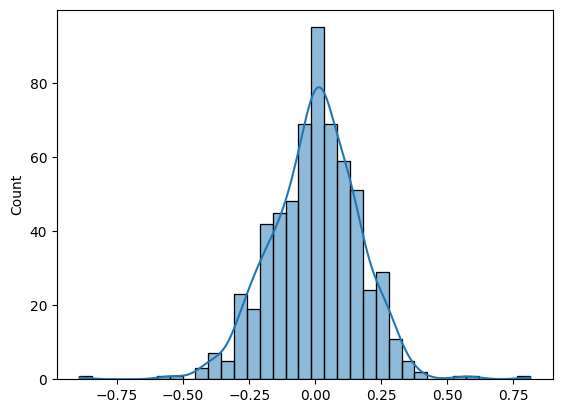

In [ ]:
# Plot histogram of residuals
sns.histplot(residuals_train, kde=True);

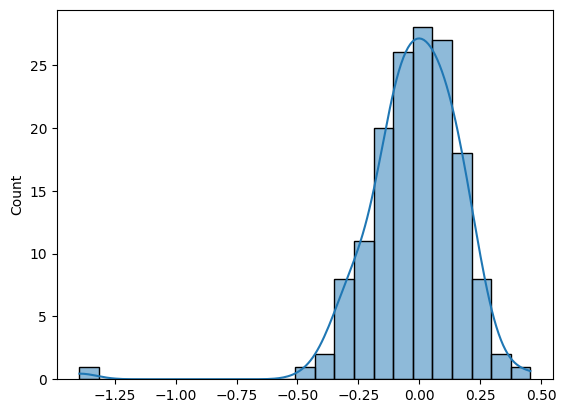

In [ ]:
# Plot histogram of residuals
sns.histplot(residuals_test, kde=True);

* *Plots look quite normally distributed (except a slight blip with the test data off to the side).*

* ***Error Normality = Check!***

###### **3. Linearity of variables**

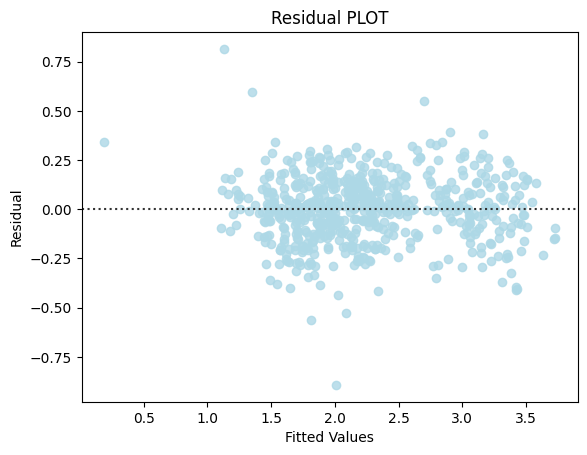

In [ ]:
# Predicted values
fitted = olsmodel.predict(X_train)

# Plotting Residuals VS Fitted Values
sns.residplot(x = fitted, y = residuals_train, color="lightblue")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

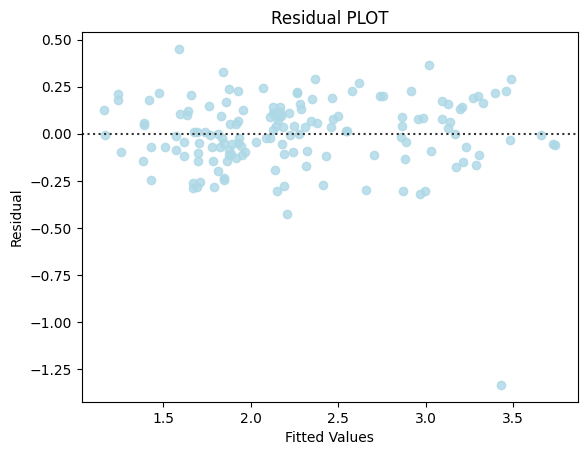

In [ ]:
# Predicted values
fitted = olsmodel.predict(X_test)

# Plotting Residuals VS Fitted Values
sns.residplot(x = fitted, y = residuals_test, color="lightblue")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

* *No clear pattern between fitted & residuals + they are scattered pretty randomly & uniformly* --> ***Linear Assumption = Check!***

###### **4. No Heteroscedasticity**

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals_train, X_train)
lzip(name, test)

[('F statistic', 1.3210813330703655), ('p-value', 0.01174257770805736)]

* We now see that the **training data p-value < 0.05** 🙁, which means that we **REJECT** the null hypothesis of **homoscedasticity**.  Thus, the Decision Tree & Random Forest hyperparameter tuning will be employed to address this.

In [ ]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals_test, X_test)
lzip(name, test)

[('F statistic', 0.5453798908479777), ('p-value', 0.9709654282129128)]

* Seems strange that the test data residuals have such a high p-value (almost 1).  I don't see any errors in the code.  But in any case, the previous p-value (training) being < 0.05 means we're not done yet...

### WITH CONSTANT

#### **Performance Checks (pt. 1 - OLS)**

In [ ]:
import statsmodels.api as sm

# Statsmodel API does not add a constant by default. We need to add it explicitly.
# The constant avoids the model from forcing an intercept @ the origin
X_train1 = sm.add_constant(X_train)

# Add constant to test data
X_test1 = sm.add_constant(X_test)

# Train the model
olsmodel1 = sm.OLS(y_train, X_train1).fit()

# Get the model summary
olsmodel1.summary()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     177.6
Date:                Fri, 12 Apr 2024   Prob (F-statistic):          1.43e-295
Time:                        04:13:57   Log-Likelihood:                 222.73
No. Observations:                 612   AIC:                            -361.5
Df Residuals:                     570   BIC:                            -176.0
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [ ]:
print('Performance on ' +  bold_text('TRAIN') + ' data: ')
lin_reg_train = model_performance_regression(olsmodel1, X_train1, y_train)
lin_reg_train

Performance on TRAIN data: 


RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.168153  0.128137   0.927406        0.921356  6.322593

In [ ]:
print('Performance on ' + bold_text('TEST') + ' data: ')
lin_reg_test = model_performance_regression(olsmodel1, X_test1, y_test)
lin_reg_test

Performance on TEST data: 


RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.195618  0.137312   0.902631        0.859047  6.648424

**TRAIN vs. TEST Observations:**

* The **errors** (RMSE, MAE & MAPE) all **slightly increased**

* While the **fit** (R-sq & Adj. R-sq) **slightly decreased** (which makes sense if the errors increased since they're generally inversely related).

* Although it's not a drastic difference, it could suggest **slight overfitting**.  So let's consider the OLS Summary results.

##### Check for Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

print(checking_vif(X_train1))

                       feature       VIF
0                        const  0.000000
1                         Year  2.067078
2            Kilometers_Driven  1.963702
3                      Mileage  6.390740
4                        Power  7.204895
5                        Seats  3.239493
6           Location_Ahmedabad       inf
7           Location_Bangalore       inf
8             Location_Chennai       inf
9          Location_Coimbatore       inf
10              Location_Delhi       inf
11          Location_Hyderabad       inf
12             Location_Jaipur       inf
13              Location_Kochi       inf
14            Location_Kolkata       inf
15             Location_Mumbai       inf
16               Location_Pune       inf
17               Fuel_Type_CNG       inf
18            Fuel_Type_Diesel       inf
19            Fuel_Type_Petrol       inf
20      Transmission_Automatic       inf
21         Transmission_Manual       inf
22            Owner_Type_First       inf
23           Own

**VIF Observations**

* We have **two** variables that have scores > 5.  In descending order:
  1. *'Power'* > 7
  3. *'Mileage'* > 6 (surprising to me since its highest heatmap correlation factor was only about -0.6)

* But both are valuable factors to consider when pricing & buying a used car, so **dropping** either does **not fit** the context.  We'll try regularization methods to address this, but it's unlikely to help much since the data lacks the traits which would benefit from these.  Let's see...

#### **Check (pt. 2) Address High VIF -> Ridge & Lasso Regression**

##### L2 / Ridge Regression

* Start with default alpha and tune as necessary

In [ ]:
# Run Ridge on most recent data (one round with constant)
ridge_model = Ridge()
ridge_model.fit(X_train1, y_train)

Ridge()

In [ ]:
# Running it on training data w/ default alpha=1
ridge_reg = model_performance_regression(ridge_model, X_train1, y_train)
ridge_reg

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.169035  0.129223   0.926643         0.92053  6.379982

In [ ]:
# On test data
ridge_reg = model_performance_regression(ridge_model, X_test1, y_test)
ridge_reg

RMSE      MAE  R-squared  Adj. R-squared      MAPE
0  0.196574  0.13778   0.901678        0.857667  6.655618

**L2 / Ridge Observations:**

* The **errors** (RMSE, MAE & MAPE) all had **slight increases** in both the **train** & **test** data.

* Unsurprisingly, the **fit** for both sets (R-sq & Adj R-sq) had **minor dips**.

* We'll see if L1 / Lasso has different results.

##### L1 / Lasso

In [ ]:
# Run Lasso on most recent data (one round with constant)
lasso_model = Lasso()
lasso_model.fit(X_train1, y_train)

Lasso()

In [ ]:
# Running it on training data w/ default alpha=1
lasso_reg = model_performance_regression(lasso_model, X_train1, y_train)
lasso_reg

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.327777  0.245776   0.724166         0.70118  12.445443

In [ ]:
# On test data
lasso_reg = model_performance_regression(lasso_model, X_test1, y_test)
lasso_reg

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.312122  0.241016   0.752115        0.641157  11.885197

**L1 / Lasso Observations:**

* The **TRAINING errors** nearly **doubled**, and the **R-sq fits** lost over 20% from the Ridge Regression.
  * Similar results occurred with the **TEST** data, although not quite as large.

* And the **significantly lower fits** suggest that Lasso is **not** a good model (at least with the default alpha) for this data.

* Possible reasons for this could be:
  * We only have five features left (all of which seem significant since they have very low p-values), so the benefit of Lasso's eliminating many irrelevant features is not realized.
  * On the other hand, there are still a couple features (*'Mileage'* & *'Power'*) that have VIF scores a bit over the 5.0 threshhold which suggest some multicollinearity.
    * Furthermore, when pricing a used car, the remaining five features that we have probably all have some effect (both conceptually & based on their low p-value scores).

##### **Tune Ridge & Lasso with Optimized Alpha**

###### Ridge w/ Optimized Alpha

In [ ]:
# Implementing KFold with 10 subsets of the most recent training data
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10, 20]}    # trying different alpha values

model = Ridge()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(X_train1, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [ ]:
# Working towards a variable 'best_alpha'
best_params = model_cv.best_params_ #getting optimised parameters for alpha
best_alpha = best_params['alpha']
best_alpha

0.5

In [ ]:
# First fit only to Training Data
ridge_model_tuned = Ridge(alpha = best_alpha) # creating Tuned Ridge Regression model using optimised alpha value
ridge_model_tuned.fit(X_train1, y_train) # Fitting the data into the tuned model

Ridge(alpha=0.5)

In [ ]:
# Check performance on training data
ridge_reg_tuned = model_performance_regression(ridge_model_tuned, X_train1, y_train) # performance metrics on training data
ridge_reg_tuned

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.168483  0.128628   0.927121        0.921047  6.350315

In [ ]:
# Performance check on test data
ridge_reg_tuned = model_performance_regression(ridge_model_tuned, X_test1, y_test)  # performance metrics on test data
ridge_reg_tuned

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.196089  0.137372   0.902162        0.858368  6.636593

* In both cases, the **original model** (before any regularization or optimization) performed **better** (slightly lower errors and better fits).

##### Lasso w/ Optimized Alpha

In [ ]:
# Implementing KFold with 10 subsets of the most recent training data
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10, 20]}    # trying different alpha values

model = Lasso()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(X_train1, y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [ ]:
# Working towards a variable 'best_alpha'
best_params = model_cv.best_params_ #getting optimised parameters for alpha
best_alpha = best_params['alpha']
best_alpha

0.001

In [ ]:
# First fit only to Training Data
lasso_model_tuned = Lasso(alpha = best_alpha) # creating Tuned Lasso Regression model using optimized alpha value
lasso_model_tuned.fit(X_train1, y_train) # Fitting the data into the tuned model

Lasso(alpha=0.001)

In [ ]:
# Check performance on training data
lasso_reg_tuned = model_performance_regression(lasso_model_tuned, X_train1, y_train) #getting performance metrics on training data
lasso_reg_tuned

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.172044  0.131336   0.924008        0.917675  6.507852

In [ ]:
# Performance check on test data
lasso_reg_tuned = model_performance_regression(lasso_model_tuned, X_test1, y_test) #getting performance metrics on test data
lasso_reg_tuned

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.200495  0.142307   0.897716        0.851932  6.820849

* As expected, although optimizing Lasso helped its own case, it still did not perform better than the original model.

* On to other methods...

#### **Check pt. 3 (Elastic Net)**

* This likely won't help since:
  1. We don't have highly correlated data.
  2. The data is not sparse (after removing outliers) or consisting of many dimensions (features).
  3. We didn't see much overfitting.

  * But it's easy/fast enough to try and see what happens...

In [ ]:
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train1, y_train)

ElasticNet()

In [ ]:
elasticnet_reg = model_performance_regression(elasticnet_model, X_train1, y_train)
elasticnet_reg

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.327097  0.244417    0.72531        0.702419  12.360994

In [ ]:
elasticnet_reg = model_performance_regression(elasticnet_model, X_test1, y_test)
elasticnet_reg

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.312763  0.240042   0.751096        0.639682  11.820109

* This is similar to unoptimized Lasso (i.e. not good results).

**Now try optimizing Elastic**

In [ ]:
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9],
         'l1_ratio': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05]}
model = ElasticNet()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(X_train1, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9],
                         'l1_ratio': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05]},
             return_train_score=True, scoring='r2')

In [ ]:
# Working towards a variable 'best_alpha'
best_params = model_cv.best_params_ #getting optimized parameters for alpha
best_params

{'alpha': 0.001, 'l1_ratio': 0.05}

In [ ]:
best_alpha = best_params['alpha']
best_ratio = best_params['l1_ratio']

In [ ]:
elasticnet_model_tuned = ElasticNet(alpha = best_alpha, l1_ratio = best_ratio)
elasticnet_model_tuned.fit(X_train1, y_train)

ElasticNet(alpha=0.001, l1_ratio=0.05)

In [ ]:
elasticnet_reg_tuned = model_performance_regression(elasticnet_model_tuned, X_train1, y_train)
elasticnet_reg_tuned

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.168718  0.128935   0.926917        0.920827  6.366589

In [ ]:
elasticnet_reg_tuned = model_performance_regression(elasticnet_model_tuned, X_test1, y_test)
elasticnet_reg_tuned

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.196586  0.137997   0.901666         0.85765  6.658785

* Certainly an improvement over unoptimized Elastic, but still not better than original OLS.

#### Compare Models Before km_log


In [ ]:
models= pd.concat([lin_reg_test,
                   ridge_reg, ridge_reg_tuned,
                   lasso_reg, lasso_reg_tuned,
                   elasticnet_reg, elasticnet_reg_tuned],
                  axis=0
                  ) #combining all models into a single dataframe
models['Models'] = ['Least Squares', 'Ridge Regression', 'Ridge Regression Tuned', 'Lasso Regression',
                                      'Lasso Regression Tuned', 'Elastic Net Regression',
                    'Elastic Net Regression Tuned'] #adding names of the models as a column to the dataframe
models = models.iloc[:,[5, 0,1,2,3,4]] #ordering names of the models as the first column
models

Models      RMSE       MAE  R-squared  \
0                 Least Squares  0.195618  0.137312   0.902631   
0              Ridge Regression  0.196574  0.137780   0.901678   
0        Ridge Regression Tuned  0.196089  0.137372   0.902162   
0              Lasso Regression  0.312122  0.241016   0.752115   
0        Lasso Regression Tuned  0.200495  0.142307   0.897716   
0        Elastic Net Regression  0.312763  0.240042   0.751096   
0  Elastic Net Regression Tuned  0.196586  0.137997   0.901666   

   Adj. R-squared       MAPE  
0        0.859047   6.648424  
0        0.857667   6.655618  
0        0.858368   6.636593  
0        0.641157  11.885197  
0        0.851932   6.820849  
0        0.639682  11.820109  
0        0.857650   6.658785

#### INTERPRETING RESULTS (Money)

There are two main points to keep in mind when interpreting what these results mean:

1. The target price had a log transformation, so that needs to be reversed in order to accurately interpret the *RMSE*, *MAE* & *R-sq*... but NOT the *Adj. R-sq* nor the *MAPE*

2. In particular, the *MAPE* is a percentage, so we'll clarify what that means regarding the actual target prices.  Here, we see that the **best** model (OLS) has about a **6.65%** error from predicted to actual price results & the worst (unoptimized Lasso) is off about **11.89%**.

* Now we'll convert those errors to real money to get a perspective.

In [ ]:
# Apply the exponential function to errors individually (for clarity in comparison)

# Training Data
rmse1 = math.exp(lin_reg_train['RMSE'])
mae1 = math.exp(lin_reg_train['MAE'])

# Test Data
rmse2 = math.exp(lin_reg_test['RMSE'])
mae2 = math.exp(lin_reg_test['MAE'])


# Print the results
print(bold_text("TRAIN:"))
print("RMSE:", round(rmse1, 3))
print("MAE:", round(mae1, 3))

print('-' * 12)   # print separator line

print(bold_text("TEST:"))
print("RMSE:", round(rmse2, 3))
print("MAE:", round(mae2, 3))

TRAIN:
RMSE: 1.183
MAE: 1.137
------------
TEST:
RMSE: 1.216
MAE: 1.147


In [ ]:
# Convert the above to INR & USD

# Training INR & USD
inr_error1 = rmse1 * 100000         # converting based on the price variable definition
inr_error2 = mae1 * 100000
usd_error1 = inr_error1 * 0.012     # use currency conversion of 1 INR = 0.012 USD
usd_error2 = inr_error2 * 0.012

# Test INR & USD
inr_error3 = rmse2 * 100000
inr_error4 = mae2 * 100000
usd_error3 = inr_error3 * 0.012
usd_error4 = inr_error4 * 0.012


#####  PRINT the converted results


print(bold_text("TRAIN:"))
print("RMSE (INR): ₹", round(inr_error1, 2))      # rounding to 2 for money
print("MAE (INR): ₹", round(inr_error2, 2))
print('-' * 10)
print("RMSE (USD): $", round(usd_error1, 2))
print("MAE (USD): $", round(usd_error2, 2))

print('\n', '=' * 30, '\n')   # print separator line

print(bold_text("TEST:"))
print("RMSE (INR): ₹", round(inr_error3, 2))
print("MAE (INR): ₹", round(inr_error4, 2))
print('-' * 10)
print("RMSE (USD): $", round(usd_error3, 2))
print("MAE (USD): $", round(usd_error4, 2))

TRAIN:
RMSE (INR): ₹ 118311.79
MAE (INR): ₹ 113670.88
----------
RMSE (USD): $ 1419.74
MAE (USD): $ 1364.05


TEST:
RMSE (INR): ₹ 121606.25
MAE (INR): ₹ 114718.61
----------
RMSE (USD): $ 1459.27
MAE (USD): $ 1376.62


**Error Conversion Observation (pt. 1 - raw money)**

* So the model is about **₹120,000 off** or roughly **$1,400 off**.

In [ ]:
# INR mean price
inr_mean_price = data['Price'].mean() * 100000
inr_mean_price_formatted = '₹{:,.2f}'.format(inr_mean_price)
print('Average ', bold_text('INR Price: '), inr_mean_price_formatted)

# USD mean price
usd_mean_price = inr_mean_price * 0.012
usd_mean_price_formatted = '${:,.2f}'.format(usd_mean_price)
print('Average ', bold_text('USD Price: '), usd_mean_price_formatted)

Average  INR Price:  ₹1,058,015.69
Average  USD Price:  $12,696.19


In [ ]:
# Percentage of error off mean

inr_mean_error_percent = 120000 / inr_mean_price * 100     # Just using 120,000 as a ballpark based on the above results
inr_mean_error_percent_rounded = round(inr_mean_error_percent, 2)

usd_mean_error_percent = 1400 / usd_mean_price * 100       # Similarly with 1,400
usd_mean_error_percent_rounded = round(usd_mean_error_percent, 2)

print('INR Error is about', bold_text(str(inr_mean_error_percent_rounded)+'%'), 'off the mean')
print('USD Error is about', bold_text(str(usd_mean_error_percent_rounded)+'%'), 'off the mean')

INR Error is about 11.34% off the mean
USD Error is about 11.03% off the mean


**Error Conversion Observation (pt. 2 - percentage of the mean)**

* This approximates to only about **11%** off the mean price in both currencies (the difference is due to some manual rounding).

* It might seem unnecessary to calculate the error percentage off the mean since we already had the MAPE, but that was a more specific percentage off predicted/actual values... I was just curious to see how that error compared to the actual mean.

**Models Comparisons:**

* As we can see from the comparison summary, **Least Squares** performed the **best** (lowest errors & best fits).

* In order to interpret the results properly, we'll perform a **"math.exp"** on the **first three metrics** to reverse the log transformation.
  * But **Adj. R-squared** is *not* affected by the log (so that will not receive the math.exp).
  * Also, the **MAPE** is a *percentage error*, so no math.exp on that either.

#### **Kilometers_Driven --> km_log**

* The project prompt asked about why we would drop *'Kiolmeters_Driven'*, but other than it being skewed, I don't see a clear reason to drop it altogether.  Instead, let's see how the models react to it being logged

##### Make a New Split

In [ ]:
data_log = data.copy()    # making a copy so I can return to "data" if this log transformation doesn't help

In [ ]:
data_log['km_log'] = np.log(data_log['Kilometers_Driven'] + 1)

In [ ]:
# Split the data BUT with an extra "_log" to differentiate between our previous model
X_log = data_log.drop(['Price', 'Engine', 'Kilometers_Driven', 'price_log'], axis=1)   # 'Kilometers_Driven' => 'km_log'
y = data_log['price_log']   # y doesn't need to change since it's still the same dependent variable

# Encode categorical variables
X_log = pd.get_dummies(X_log, columns=['Location','Fuel_Type','Transmission','Owner_Type', 'Manufacturer'])

# Split the data into train and test
X_log_train, X_log_test, y_train, y_test = train_test_split(
      X_log, y,
      test_size = 0.20,   # sets 20% for test data & leaving 80% for training data
      shuffle = True,     # reorders the list when taking random samples
      random_state = 1    # sets a seed to reproduce results while comparing different model runs
    )


##### OLS

In [ ]:
import statsmodels.api as sm

# New 'X_train2' with the new 'km_log'
X_train2 = sm.add_constant(X_log_train)
# Cast the boolean array to np.float64
X_train2 = X_train2.astype(np.float64)

# Add constant to test data
X_test2 = sm.add_constant(X_log_test)

# Train the model
olsmodel2 = sm.OLS(y_train, X_train2).fit()

# Get the model summary
olsmodel2.summary()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     172.4
Date:                Fri, 12 Apr 2024   Prob (F-statistic):          3.71e-292
Time:                        04:14:14   Log-Likelihood:                 214.24
No. Observations:                 612   AIC:                            -344.5
Df Residuals:                     570   BIC:                            -159.0
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [ ]:
print('Performance on ' +  bold_text('TRAIN') + ' data: ')
lin_reg_train = model_performance_regression(olsmodel2, X_train2, y_train)
lin_reg_train

Performance on TRAIN data: 


RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.170502  0.130416   0.925364        0.919144  6.471896

In [ ]:
print('Performance on ' +  bold_text('TEST') + ' data: ')
lin_reg_test = model_performance_regression(olsmodel2, X_test2, y_test)
lin_reg_test

Performance on TEST data: 


RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.198575  0.136468   0.899666        0.854754  6.635891

* The only difference when logging the *'Kilometers_Driven'* is that the **Adj. R-sq** is actually **a bit lower** now after performing a log transformation, so really it's a worse fit.
  * Every other OLS metric is exactly equal down to six digits.

##### Check for Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

print(checking_vif(X_train2))

                       feature       VIF
0                        const  0.000000
1                         Year  1.961651
2                      Mileage  6.430930
3                        Power  7.203300
4                        Seats  3.236457
5                       km_log  1.779721
6           Location_Ahmedabad       inf
7           Location_Bangalore       inf
8             Location_Chennai       inf
9          Location_Coimbatore       inf
10              Location_Delhi       inf
11          Location_Hyderabad       inf
12             Location_Jaipur       inf
13              Location_Kochi       inf
14            Location_Kolkata       inf
15             Location_Mumbai       inf
16               Location_Pune       inf
17               Fuel_Type_CNG       inf
18            Fuel_Type_Diesel       inf
19            Fuel_Type_Petrol       inf
20      Transmission_Automatic       inf
21         Transmission_Manual       inf
22            Owner_Type_First       inf
23           Own

* Again, the VIF scores with *'km_log'* are **very similar** to *'Kilometers_Driven'*.

##### **Default Ridge, Lasso & Elastic**

* We'll look at results at the end with a model summary

###### Def. Ridge

In [ ]:
# Run Ridge on most recent data (3rd round)
ridge_model = Ridge()
ridge_model.fit(X_train2, y_train)

Ridge()

In [ ]:
# Running it on training data w/ default alpha=1
ridge_reg = model_performance_regression(ridge_model, X_train2, y_train)
ridge_reg

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.171429  0.131601    0.92455        0.918262  6.533418

In [ ]:
# On test data
ridge_reg = model_performance_regression(ridge_model, X_test2, y_test)
ridge_reg

RMSE     MAE  R-squared  Adj. R-squared      MAPE
0  0.199574  0.1369   0.898654         0.85329  6.633909

###### Def. Lasso

In [ ]:
# Run Lasso on most recent data (3rd round)
lasso_model = Lasso()
lasso_model.fit(X_train2, y_train)

Lasso()

In [ ]:
# Running it on training data w/ default alpha=1
lasso_reg = model_performance_regression(lasso_model, X_train2, y_train)
lasso_reg

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.358635  0.260463   0.669786        0.642268  13.343935

In [ ]:
# On test data
lasso_reg = model_performance_regression(lasso_model, X_test2, y_test)
lasso_reg

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.350243  0.269687   0.687868        0.548152  13.09274

###### Def. Elasitc

In [ ]:
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train2, y_train)

ElasticNet()

In [ ]:
elasticnet_reg = model_performance_regression(elasticnet_model, X_test2, y_test)
elasticnet_reg

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.329328  0.249903   0.724032        0.600504  12.048862

##### **Optimized Ridge, Lasso & Elastic**

###### Opt. Ridge

In [ ]:
# Implementing KFold with 10 subsets of the most recent training data
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10, 20]}    # trying different alpha values

model = Ridge()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(X_train1, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [ ]:
# Working towards a variable 'best_alpha'
best_params = model_cv.best_params_ #getting optimised parameters for alpha
best_alpha = best_params['alpha']
best_alpha

0.5

In [ ]:
# First fit only to Training Data
ridge_model_tuned = Ridge(alpha = best_alpha) # creating Tuned Ridge Regression model using optimised alpha value
ridge_model_tuned.fit(X_train2, y_train) # Fitting the data into the tuned model

Ridge(alpha=0.5)

In [ ]:
# Performance check on test data
ridge_reg_tuned = model_performance_regression(ridge_model_tuned, X_train2, y_train)  # performance metrics on training data
ridge_reg_tuned

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.170853  0.131028   0.925056        0.918811  6.505385

In [ ]:
# Performance check on test data
ridge_reg_tuned = model_performance_regression(ridge_model_tuned, X_test2, y_test)  # performance metrics on test data
ridge_reg_tuned

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.199065  0.136567    0.89917        0.854037  6.621545

###### Opt. Lasso

In [ ]:
# Implementing KFold with 10 subsets of the most recent training data
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10, 20]}    # trying different alpha values

model = Lasso()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(X_train2, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [ ]:
# Working towards a variable 'best_alpha'
best_params = model_cv.best_params_ #getting optimised parameters for alpha
best_alpha = best_params['alpha']
best_alpha

0.001

In [ ]:
# First fit only to Training Data
lasso_model_tuned = Lasso(alpha = best_alpha) # creating Tuned Lasso Regression model using optimized alpha value
lasso_model_tuned.fit(X_train2, y_train) # Fitting the data into the tuned model

Lasso(alpha=0.001)

In [ ]:
# Check performance on training data
lasso_reg_tuned = model_performance_regression(lasso_model_tuned, X_train2, y_train) #getting performance metrics on training data
lasso_reg_tuned

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.174365  0.133523   0.921943        0.915438  6.639703

In [ ]:
# Performance check on test data
lasso_reg_tuned = model_performance_regression(lasso_model_tuned, X_test2, y_test) #getting performance metrics on test data
lasso_reg_tuned

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.204342  0.141808   0.893753        0.846195  6.812168

###### Opt. Elastic

In [ ]:
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train2, y_train)

ElasticNet()

In [ ]:
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9],
         'l1_ratio': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05]}
model = ElasticNet()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(X_train2, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9],
                         'l1_ratio': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05]},
             return_train_score=True, scoring='r2')

In [ ]:
# Working towards a variable 'best_alpha'
best_params = model_cv.best_params_ #getting optimized parameters for alpha
best_params

{'alpha': 0.001, 'l1_ratio': 0.05}

In [ ]:
best_alpha = best_params['alpha']
best_ratio = best_params['l1_ratio']

In [ ]:
elasticnet_model_tuned = ElasticNet(alpha = best_alpha, l1_ratio = best_ratio)
elasticnet_model_tuned.fit(X_train2, y_train)

ElasticNet(alpha=0.001, l1_ratio=0.05)

In [ ]:
elasticnet_reg_tuned = model_performance_regression(elasticnet_model_tuned, X_train2, y_train)
elasticnet_reg_tuned

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.171089  0.131275   0.924849        0.918586  6.518294

In [ ]:
elasticnet_reg_tuned = model_performance_regression(elasticnet_model_tuned, X_test2, y_test)
elasticnet_reg_tuned

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.199576  0.137137   0.898652        0.853286  6.640268

##### **Post 'km_log' Models Comparison**

In [ ]:
models= pd.concat([lin_reg_test,
                   ridge_reg, ridge_reg_tuned,
                   lasso_reg, lasso_reg_tuned,
                   elasticnet_reg, elasticnet_reg_tuned],
                  axis=0
                  ) #combining all models into a single dataframe
models['Models'] = ['Least Squares', 'Ridge Regression', 'Ridge Regression Tuned', 'Lasso Regression',
                                      'Lasso Regression Tuned', 'Elastic Net Regression',
                    'Elastic Net Regression Tuned'] #adding names of the models as a column to the dataframe
models = models.iloc[:,[5, 0,1,2,3,4]] #ordering names of the models as the first column
models

Models      RMSE       MAE  R-squared  \
0                 Least Squares  0.198575  0.136468   0.899666   
0              Ridge Regression  0.199574  0.136900   0.898654   
0        Ridge Regression Tuned  0.199065  0.136567   0.899170   
0              Lasso Regression  0.350243  0.269687   0.687868   
0        Lasso Regression Tuned  0.204342  0.141808   0.893753   
0        Elastic Net Regression  0.329328  0.249903   0.724032   
0  Elastic Net Regression Tuned  0.199576  0.137137   0.898652   

   Adj. R-squared       MAPE  
0        0.854754   6.635891  
0        0.853290   6.633909  
0        0.854037   6.621545  
0        0.548152  13.092740  
0        0.846195   6.812168  
0        0.600504  12.048862  
0        0.853286   6.640268

* There was **no improvement** in any model when performing **log transformation** with *'Kilometers_Driven'* (in fact, that transformation actually performed **worse**), and I see no reason why we would drop it (contextually or mathematically).  So I will use the original feature and **not** a logged version moving forward since that original OLS has the best metrics thus far.

* It is interesting to note that (with the exception of default Lasso & Elastic Net), the **MAPE** scores **slightly improved** (i.e. decreased) when using *'km_log'*.  But the differences are about 0.01 (which means about 1/100th of a percent), and this is within the context of a logarithm, which changes the scale drastically.  Thus, I still would **not** opt for **using** the *'km_log'*.

#### Check Assumptions BEFORE Hyperparameter Tuning

1. Mean of residuals should be 0 ✔
2. Normality of error terms ✔
3. Linearity of variables ✔
4. No Heteroscedasticity ❌

##### **1. Mean of residuals should be 0**

In [ ]:
# Using original OLS model w/ "X_train1" since that yielded best performance metrics
y_pred_log = olsmodel1.predict(X_train1)

In [ ]:
y_train_predicted = olsmodel1.predict(X_train1)
y_test_predicted = olsmodel1.predict(X_test1)

In [ ]:
y_pred = np.exp(y_pred_log)
y_actual = data['Price']

In [ ]:
# Residuals
residuals_train = y_train - y_train_predicted
residuals_test = y_test - y_test_predicted

In [ ]:
residuals_train.mean()

1.6738533217438414e-12

In [ ]:
residuals_test.mean()

-0.019367933955397963

* *Both residuals are quite low, so very close to 0 (especially the training)*

* ***Residuals = 0 Check!***

##### **2. Normality of error terms**

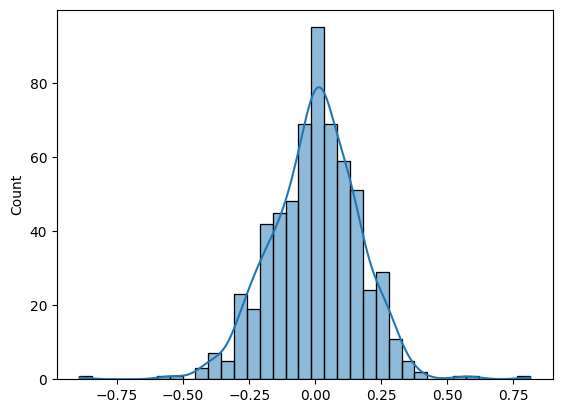

In [ ]:
# Plot histogram of residuals
sns.histplot(residuals_train, kde=True);

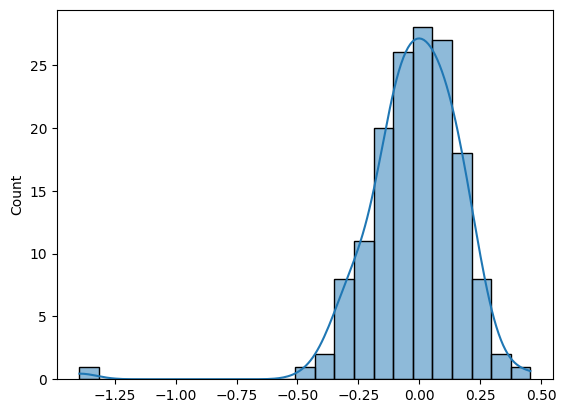

In [ ]:
# Plot histogram of residuals
sns.histplot(residuals_test, kde=True);

* *Plots look quite normally distributed (except a slight blip with the test data off to the side).*

* ***Error Normality = Check!***

##### **3. Linearity of variables**

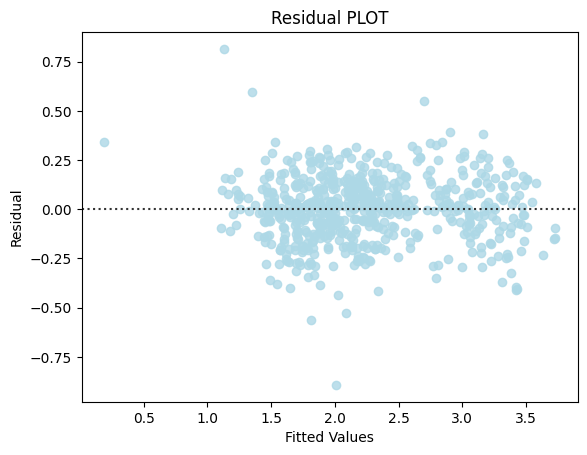

In [ ]:
# Predicted values
fitted = olsmodel1.predict(X_train1)

# Plotting Residuals VS Fitted Values
sns.residplot(x = fitted, y = residuals_train, color="lightblue")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

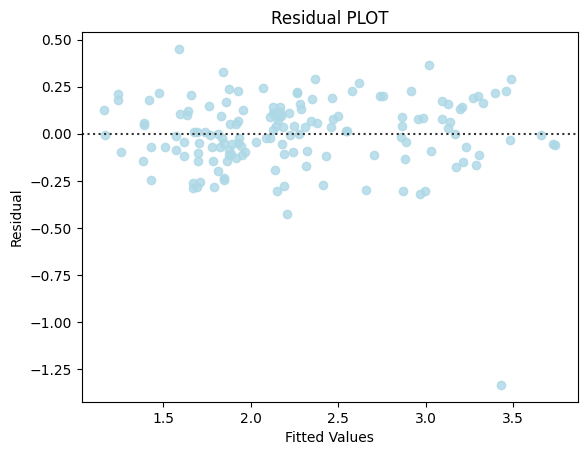

In [ ]:
# Predicted values
fitted = olsmodel1.predict(X_test1)

# Plotting Residuals VS Fitted Values
sns.residplot(x = fitted, y = residuals_test, color="lightblue")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

* *No clear pattern between fitted & residuals + they are scattered pretty randomly & uniformly* --> ***Linear Assumption = Check!***

##### **4. No Heteroscedasticity**

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals_train, X_train1)
lzip(name, test)

[('F statistic', 1.3210813330703832), ('p-value', 0.011742577708054472)]

* We now see that the **training data p-value < 0.05** 🙁, which means that we **REJECT** the null hypothesis of **homoscedasticity**.  Thus, the Decision Tree & Random Forest hyperparameter tuning will be employed to address this.

In [ ]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals_test, X_test1)
lzip(name, test)

[('F statistic', 0.5453798908480055), ('p-value', 0.9709654282129023)]

* Seems strange that the test data residuals have such a high p-value (almost 1).  I don't see any errors in the code.  But in any case, the previous p-value (training) being < 0.05 means we're not done yet...

### **Overall Linear Modeling Summary**

KILOMETERS vs. KM_LOG

1. In both cases, after comparing regular *'Kilometers_Driven'* vs. *'km_log'* and tallying up which metrics performed in each case, the end results were the same:
  * *'Kilometers_Driven'* = 25 better metrics (RMSE et al.) across the different models (OLS et al.).
  * *'km_log'* = 10 better metrics across models.
  * It is interesting to not that the only times when *'km_log'* performed better were with **MAE** & **MAPE**.  I'd be curious to explore why.
    * However, this is **NOT** true for **Lasso & Elastic**.  I imagine Elastic follows from Lasso since it's a combination including that & Ridge.  But I would need to explore more into the intracices of how Lasso works in order to theorize why that performed better with the original, non-logged kilometers.

---
WITH vs. WITHOUT Constant

2. The only differences arise in the **Adj. R-sq** without a constant, which is probably because it penalizes models with more features.

  * All p-values are **less than** 0.05 --> **statistically significant** (nothing to drop yet)

## HYPERPARAMETER (**non-linear**)

* Back to using X_train (without the constant that was added to X_train1 for the above linear regression models) since the upcoming hyperparameter tuning models are **not linear.**

* Also using the regular *'Kiliometers_Driven'* instead of *'km_log'* since the former was generally better performing.

### **Hyperparameter Tuning: Decision Tree**

#### First Tree

In [ ]:
# Start fitting a Decision Tree regressor to our 'X_train' data
dt_regressor  = DecisionTreeRegressor(random_state = 1) # set the random state for reproducibility
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
dt_regressor_perf_test = model_performance_regression(dt_regressor, X_test, y_test)
dt_regressor_perf_test

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.244795  0.162963   0.847523        0.781353  8.129842

* So not better than OLS yet, but let's visualize the tree...

##### **Visualize**

In [ ]:
from sklearn import tree

In [ ]:
features = list(X.columns)
print(len(features))

46


* Trying to show 46 features in a decision tree would mean **46 layers** -> not practical.

* So let's train it specifically for visualization (using a maximum depth)

In [ ]:
dt_regressor_visualize = DecisionTreeRegressor(random_state = 1, max_depth = 3)   # three levels seems reasonable to visualize
dt_regressor_visualize.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=1)

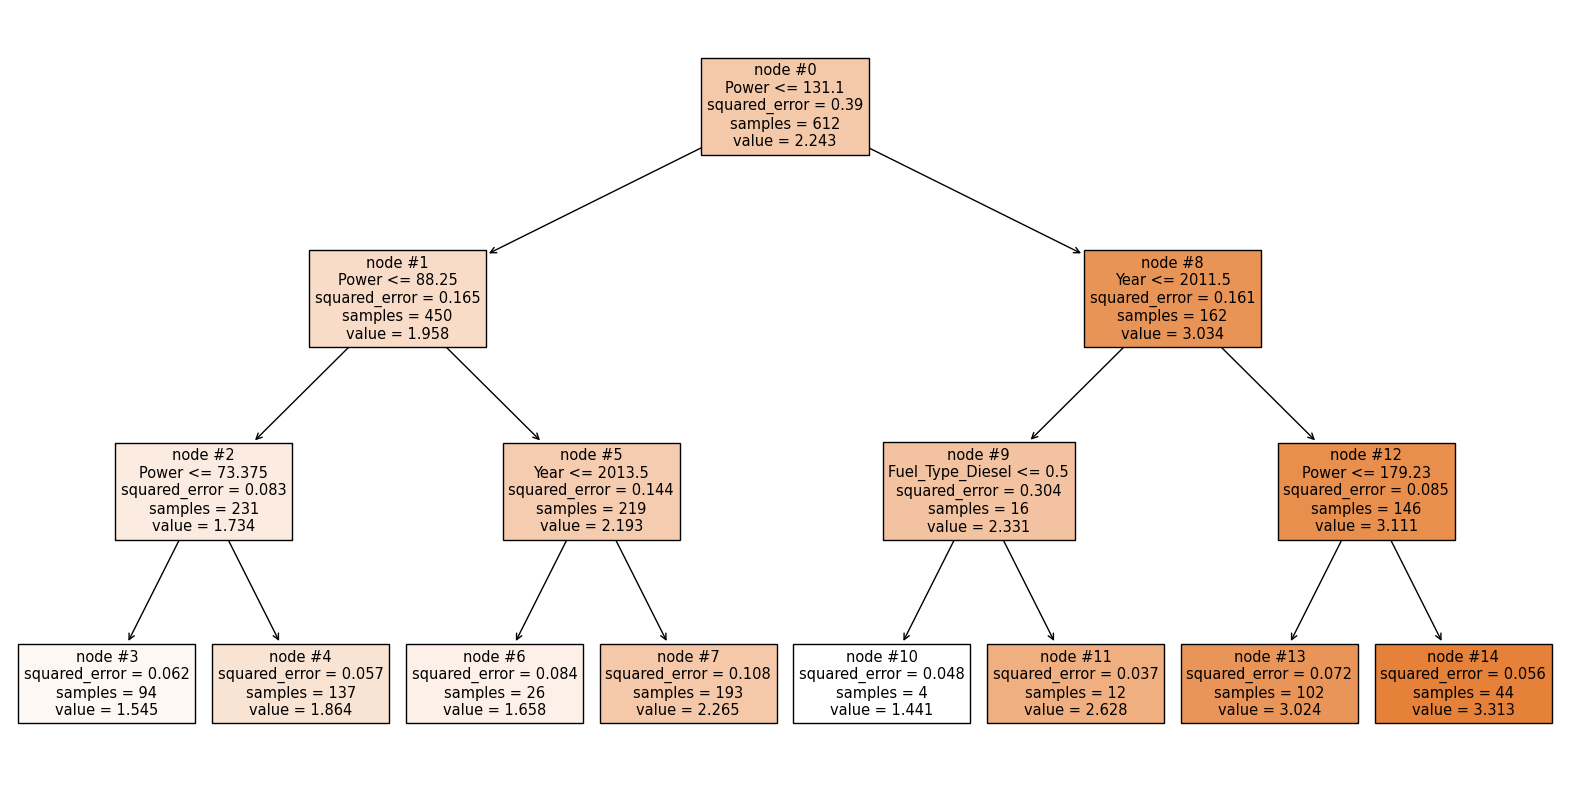

In [ ]:
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_regressor_visualize, feature_names = features,
               filled = True, fontsize = 10.5, node_ids = True, class_names = True);  # optional for easy-reading

*Why is 'Seats' split so large?  Let's check the range to make sure it didn't get screwed up:

In [ ]:
# Check range of seats

seats = data['Seats'].unique()
print('Range of Seats:', seats.min(), 'to', seats.max())

Range of Seats: 4.0 to 8.0


**Feature Importance**

1. Based on the levels, the model identified *'Seats'* as the most informative.  However, it's setting the split @ 131.1, which clearly is nonsense.  I tried converting it to an int (after removing outliers/blanks) since it was originally inputted as a float (because of the missing values), but that didn't help.
  * It's actually used in several other nodes to split.
  * Hopefully, Random Forest helps clear this up.

2. The **purest** nodes reside on the right part of the tree:
  * **Node #11** = white (with avg *'price_log'* = 1.441)
  * **Node #14** = darkest orange (avg *'price_log'* = 3.313).
  * But this is, again, quite strange since they are on the right split of the first node, implying that they more than 131.1 seats, which makes no sense.

#### Bagging

In [ ]:
bagging_estimator = BaggingRegressor(random_state = 1)
bagging_estimator.fit(X_train, y_train)

BaggingRegressor(random_state=1)

In [ ]:
bagging_estimator_perf_test = model_performance_regression(bagging_estimator, X_test, y_test)
bagging_estimator_perf_test

RMSE      MAE  R-squared  Adj. R-squared      MAPE
0  0.203924  0.13852   0.894188        0.848269  6.608667

**Bagging Observations:**

* As would be expected, the bagging **significantly improved** the result metrics (i.e. lower errors & better fits).

* Also similar to the single Decision Tree, the **MAPE** is the only score that's actually a bit better than the original OLS (and the other metrics are not as good).

* Let's see how Random Forest performs...

### **Hyperparameter Tuning: Random Forest**

* In addition to taking a subsample of the rows from the DataFrame that bagging does, RF also does that with the columns (features).
  * This helps to further improve generalizability by making it harder for the trees to memorize the data (which would mean they're not really testing it robustly).

#### RF Regressor

In [ ]:
rf_regressor = RandomForestRegressor(random_state = 1)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [ ]:
rf_regressor_perf_test = model_performance_regression(rf_regressor, X_test, y_test)
rf_regressor_perf_test

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.186186  0.126961   0.911795        0.873517  6.141731

*Random Forest is now the **best** performance.  It finally surpasses OLS metrics (lower errors & better fits).*

### **Further Boosting** *(Ada, Gradient & XG Boost)*

#### AdaBoost

* Trains fewer predictors with equal weights & weak classifers.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ada_regressor = AdaBoostRegressor(random_state = 1)
ada_regressor.fit(X_train, y_train)

AdaBoostRegressor(random_state=1)

In [ ]:
ada_regressor_perf_test = model_performance_regression(ada_regressor, X_test, y_test)
ada_regressor_perf_test

RMSE     MAE  R-squared  Adj. R-squared      MAPE
0  0.248308  0.1967   0.843114        0.775032  9.375605

*No help with AdaBoost*

#### Gradient Boosting

* Uses negative gradient to train a set of weak classifiers then improve their performance over iterations.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
grad_regressor = GradientBoostingRegressor(random_state=1)
grad_regressor.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

In [ ]:
grad_regressor_perf_test = model_performance_regression(grad_regressor, X_test, y_test)
grad_regressor_perf_test

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.180605  0.121228   0.917003        0.880986  5.789599

Even further help with **Gradient Boosting**.  We now have even **lower errors** and **better fits** than the **Random Forest.**  This is the BEST model so far.

#### XG Boost (Extreme Gradient)

* Introduces L1 & L2 Regularization

* Prunes trees

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_regressor = XGBRegressor(random_state=1)
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_regressor_perf_test = model_performance_regression(xgb_regressor, X_test, y_test)
xgb_regressor_perf_test

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.197076  0.127968   0.901175        0.858288  6.108154

**XGBoost Results**

* *Worse:* RMSE (higher error), R-sq & Adju. R-sq (lower fit)

* *Better:* MAE (lower error, but very slight) & MAPE (lower error by almost 0.1 => 0.001% error)

* So **not an obvious improvement** over Gradient Boosting.

#### MODELS SUMMARY

##### Models Oriented as Columns

In [ ]:
models_test_comp_df = pd.concat(
    [
        dt_regressor_perf_test.T,     # Transpose so each model = column (instead of a row)
        bagging_estimator_perf_test.T,
        rf_regressor_perf_test.T,
        ada_regressor_perf_test.T,
        grad_regressor_perf_test.T,
        xgb_regressor_perf_test.T
    ],
    axis = 1    # for columns
)

In [ ]:
models_test_comp_df.columns = [     # manually setting the column names
    'Decision Tree',
    'Bagging',
    'Random Forest',
    'AdaBoost',
    'Gradient Boost',
    'XG Boost'
]

models_test_comp_df

Decision Tree   Bagging  Random Forest  AdaBoost  \
RMSE                 0.244795  0.203924       0.186186  0.248308   
MAE                  0.162963  0.138520       0.126961  0.196700   
R-squared            0.847523  0.894188       0.911795  0.843114   
Adj. R-squared       0.781353  0.848269       0.873517  0.775032   
MAPE                 8.129842  6.608667       6.141731  9.375605   

                Gradient Boost  XG Boost  
RMSE                  0.180605  0.197076  
MAE                   0.121228  0.127968  
R-squared             0.917003  0.901175  
Adj. R-squared        0.880986  0.858288  
MAPE                  5.789599  6.108154

##### Models as Rows (My Preference)

* I prefer this orientation since we've been looking at the metrics along the columns this whole time.  So switching that now seems counterintuitive.

In [ ]:
models_test_comp_df = pd.concat(
    [
        dt_regressor_perf_test,
        bagging_estimator_perf_test,
        rf_regressor_perf_test,
        ada_regressor_perf_test,
        grad_regressor_perf_test,
        xgb_regressor_perf_test
    ]
)

In [ ]:
models_test_comp_df.index = [     # manually setting the row names
    'Decision Tree',
    'Bagging',
    'Random Forest',
    'AdaBoost',
    'Gradient Boost',
    'XG Boost'
]

models_test_comp_df

RMSE       MAE  R-squared  Adj. R-squared      MAPE
Decision Tree   0.244795  0.162963   0.847523        0.781353  8.129842
Bagging         0.203924  0.138520   0.894188        0.848269  6.608667
Random Forest   0.186186  0.126961   0.911795        0.873517  6.141731
AdaBoost        0.248308  0.196700   0.843114        0.775032  9.375605
Gradient Boost  0.180605  0.121228   0.917003        0.880986  5.789599
XG Boost        0.197076  0.127968   0.901175        0.858288  6.108154

**Six Model Summary**

* *Best Performing:* **Random Forest** & **Gradient Boost**

* *Worst Performing:* **Decision Tree** & **AdaBoost**

#### **Tuning Gradient Boost (best performer)**


In [ ]:
gb_tuned = GradientBoostingRegressor(random_state = 1)
gb_parameters = {
    'n_estimators': [100, 110, 120],    # include default 100 (so it's not skipped), but also search other values
    'max_depth': [None, 5, 7],    # "None" is default, must include
    'max_features': [0.8, 1.]
}

In [ ]:
gb_grid_obj = GridSearchCV(gb_tuned, gb_parameters, scoring = 'neg_mean_squared_error', cv = 5)   # using built-in 'neg_mean_squared_error'
gb_grid_obj.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=1),
             param_grid={'max_depth': [None, 5, 7], 'max_features': [0.8, 1.0],
                         'n_estimators': [100, 110, 120]},
             scoring='neg_mean_squared_error')

In [ ]:
gb_tuned_regressor = gb_grid_obj.best_estimator_
gb_tuned_regressor.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, max_features=0.8, n_estimators=120,
                          random_state=1)

* So after tuning the Gradient Boost, the model found that the **best hyperparameters** were:
  * **Max Depth = 5**
  * **Max Features = 0.8**,
  * **120 estimators**
  * This means that the default values were not optimal, but you still need to check them to make sure.

In [ ]:
gb_tuned_regressor_perf_test = model_performance_regression(gb_tuned_regressor, X_test, y_test)
gb_tuned_regressor_perf_test

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.173624  0.116198   0.923296        0.890009  5.576311

In [ ]:
pd.concat(
    [
        models_test_comp_df,
        gb_tuned_regressor_perf_test
    ],
)

RMSE       MAE  R-squared  Adj. R-squared      MAPE
Decision Tree   0.244795  0.162963   0.847523        0.781353  8.129842
Bagging         0.203924  0.138520   0.894188        0.848269  6.608667
Random Forest   0.186186  0.126961   0.911795        0.873517  6.141731
AdaBoost        0.248308  0.196700   0.843114        0.775032  9.375605
Gradient Boost  0.180605  0.121228   0.917003        0.880986  5.789599
XG Boost        0.197076  0.127968   0.901175        0.858288  6.108154
0               0.173624  0.116198   0.923296        0.890009  5.576311

* OK!  So **tuning** the Gradient Boost **helped** in **every metric** (lower errors & better fits).

##### Learning Curve


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import get_scorer

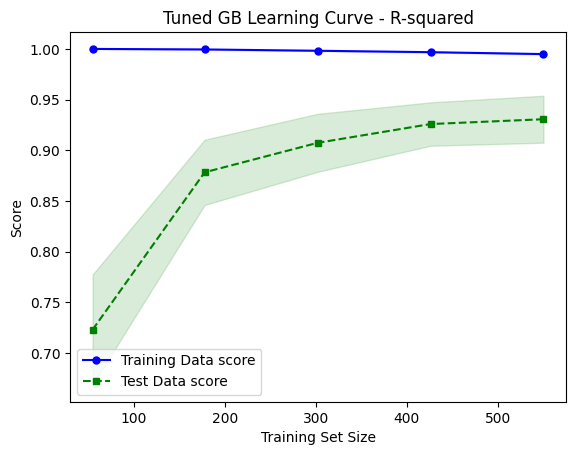

In [ ]:
# Tuned GB Learning Curve - R-squared

# use the R-squared with 10 folds (cv)
sizes, train_scores, test_scores = learning_curve(gb_tuned_regressor, X_train, y_train, cv=10, scoring='r2')

train_mean = np.mean(train_scores, axis=1)    # mean of the training r-sq scores
train_std = np.std(train_scores, axis=1)      # standard deviation of the training r-sq scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


### Plotting the Training & Test score graphs

# Training Data (blue)
# 'sizes': how many rows to use for the score calculation
#  'marker': shape at each x-value ('o' = dot & 's' = square)
plt.plot(sizes, train_mean, color="blue", marker='o', markersize=5, label="Training Data score")
# fill in between the mean +- one standard deviation
# 'alpha' = opacity (lower = more transparent)
plt.fill_between(sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color="blue")

# Test Data (green)
plt.plot(sizes, test_mean, color="green", linestyle='--', marker='s', markersize=5, label="Test Data score")
plt.fill_between(sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color="green")

###

plt.title("Tuned GB Learning Curve - R-squared")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()


In [ ]:
# Check Usable Scorers (the positive versions of the error functions are not available)
from sklearn import metrics

metrics.get_scorer_names()


['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

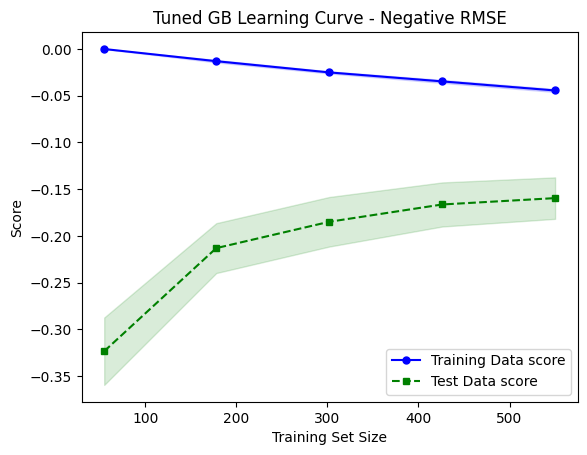

In [ ]:
# Tuned GB Learning Curve - Negative RMSE

# use the Negative RMSE with 10 folds (cv)
sizes, train_scores, test_scores = learning_curve(gb_tuned_regressor, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(sizes, train_mean, color="blue", marker='o', markersize=5, label="Training Data score")
plt.fill_between(sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color="blue")
plt.plot(sizes, test_mean, color="green", linestyle='--', marker='s', markersize=5, label="Test Data score")
plt.fill_between(sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color="green")

plt.title("Tuned GB Learning Curve - Negative RMSE")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()


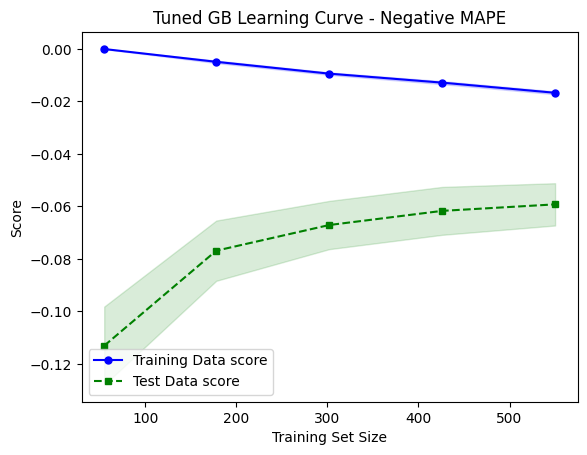

In [ ]:
# Tuned GB Learning Curve - Negative MAPE

# use the Negative MAPE with 10 folds (cv)
sizes, train_scores, test_scores = learning_curve(gb_tuned_regressor, X_train, y_train, cv=10, scoring='neg_mean_absolute_percentage_error')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(sizes, train_mean, color="blue", marker='o', markersize=5, label="Training Data score")
plt.fill_between(sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color="blue")
plt.plot(sizes, test_mean, color="green", linestyle='--', marker='s', markersize=5, label="Test Data score")
plt.fill_between(sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color="green")

plt.title("Tuned GB Learning Curve - Negative MAPE")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()


**Feature Importance**

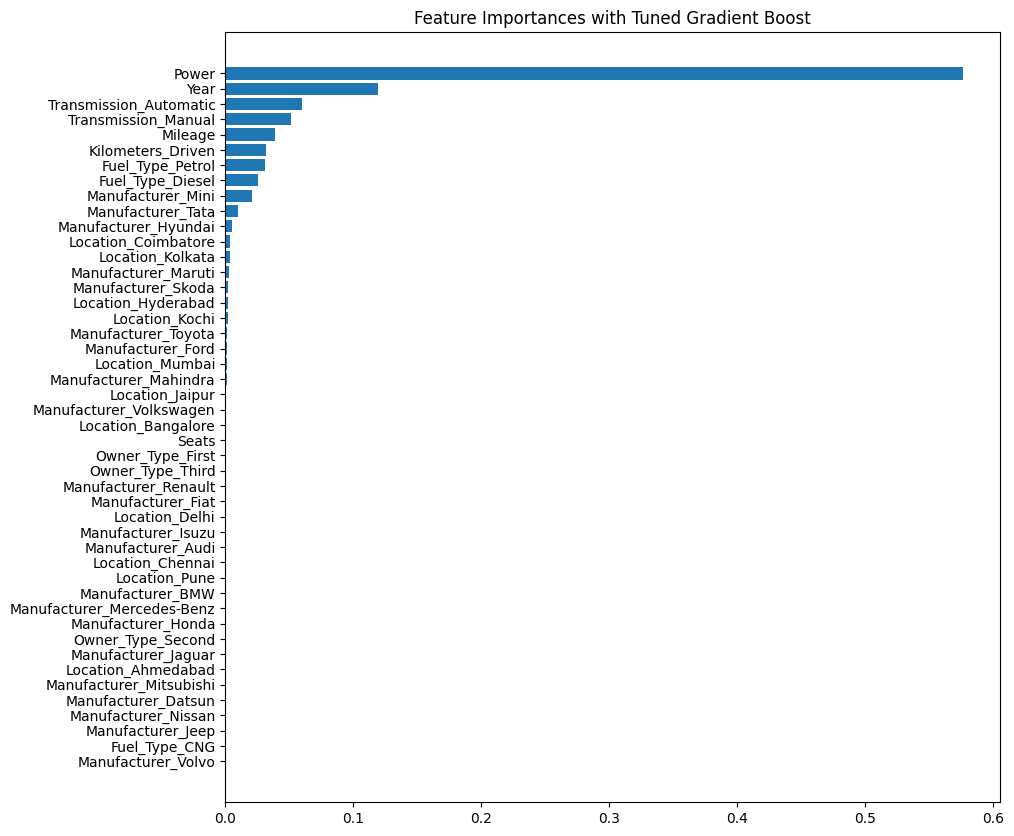

In [ ]:
# Plotting a Horizontal Bar Chart showing importances of features
importances = gb_tuned_regressor.feature_importances_

indices = np.argsort(importances)
plt.figure(figsize=(10,10))
plt.title('Feature Importances with Tuned Gradient Boost')
plt.barh(range(len(features)), importances[indices])
plt.yticks(range(len(features)), [features[i] for i in indices]);

**Importances Observations**

* Clearly, *'Power'* is far and away the most important feature (probably around 6x the next feature).

* *'Year'* has a bit importance, and the rest have hardly any impact.
  * Especially anything past *'Manufacturer_Tata'* is basically non-existent on the graph.

* **Contrary** to the **Decision Tree**, *'Seats'* is down near the middle of the pack (which is basically nothing)... as opposed to the DT placing it at the top as the root node.

* Also, it important to keep in mind that these importances are only a **magnitude** since they're always positive, meaning that we do **not know** the **direction** of each feature.

* **Multicollinearity:** since the tuned Gradient Boost is a **non-linear** model, we cannot directly check VIF.  But since the strongest feature (*'Power'*) has no strong correlation with any other feature (the only strong one it had was with *'Engine'*, which we dropped), there should be no concern with multicollinearity after performing the Gradient Boost.
  * Furthermore, there's **no need** to recheck **linearity assumptions** (ex: residuals = 0, normality of error terms, etc.).

## FINAL MODEL (with **Tuned Gradient Boost**)

### Equation

In [ ]:
# Construct the equation

equation = ''
for feature, coef in zip(features, importances):
    if coef != 0:
        sign = '+' if coef > 0 else '-'
        equation += f'{coef:.3f} * {feature} {sign} '

In [ ]:
# Simplify the equation (replace and addition of negatives with just subtraction):

equation = equation.replace(' + -', ' - ')
equation = equation.replace('+-', '-')

* This code may not actually be necessary in this particular result since the coefficients are positive, but it would help flexibility in the case of negatives so they're just subtracted (instead of adding a negative).

In [ ]:
print(f'Equation: {equation}')

Equation: 0.119 * Year + 0.032 * Kilometers_Driven + 0.038 * Mileage + 0.577 * Power + 0.001 * Seats + 0.000 * Location_Ahmedabad + 0.001 * Location_Bangalore + 0.000 * Location_Chennai + 0.004 * Location_Coimbatore + 0.000 * Location_Delhi + 0.002 * Location_Hyderabad + 0.001 * Location_Jaipur + 0.002 * Location_Kochi + 0.004 * Location_Kolkata + 0.001 * Location_Mumbai + 0.000 * Location_Pune + 0.000 * Fuel_Type_CNG + 0.025 * Fuel_Type_Diesel + 0.031 * Fuel_Type_Petrol + 0.060 * Transmission_Automatic + 0.051 * Transmission_Manual + 0.001 * Owner_Type_First + 0.000 * Owner_Type_Second + 0.000 * Owner_Type_Third + 0.000 * Manufacturer_Audi + 0.000 * Manufacturer_BMW + 0.000 * Manufacturer_Datsun + 0.000 * Manufacturer_Fiat + 0.001 * Manufacturer_Ford + 0.000 * Manufacturer_Honda + 0.005 * Manufacturer_Hyundai + 0.000 * Manufacturer_Isuzu + 0.000 * Manufacturer_Jaguar + 0.000 * Manufacturer_Jeep + 0.001 * Manufacturer_Mahindra + 0.003 * Manufacturer_Maruti + 0.000 * Manufacturer_Merced

In [ ]:
# prompt: print power coefficient

power_coef = importances[features.index('Power')]
print(f'Power Coefficient: {power_coef:.3f}')

year_coef = importances[features.index('Year')]
print(f'Year Coefficient: {year_coef:.3f}')

Power Coefficient: 0.577
Year Coefficient: 0.119


### Convert *'Power'* & *'Year'* Coefficients --> Money

In [ ]:
# prompt: reverse log for power and year coefficients

power_coef_exp = math.exp(power_coef)   # use the exponential function on the 'power' coefficient from the feature importances (final model equation)
year_coef_exp = math.exp(year_coef)

print(f'Power Coefficient (unlogged): {power_coef_exp:.3f}')  # round to three decimal places
print(f'Year Coefficient (unlogged): {year_coef_exp:.3f}')

Power Coefficient (unlogged): 1.780
Year Coefficient (unlogged): 1.126


In [ ]:
# Converting coefficient effect back to INR

power_coef_inr = power_coef_exp * 100000
year_coef_inr = year_coef_exp * 100000

power_coef_inr_formatted = '₹{:,.2f}'.format(power_coef_inr)
year_coef_inr_formatted = '₹{:,.2f}'.format(year_coef_inr)

print('Reminder of the ', bold_text('Average INR Price: '), inr_mean_price_formatted)
print(f'Power Effect (INR): {power_coef_inr_formatted} average increase in predicted price per unit of bhp')
print(f'Year Effect (INR): {year_coef_inr_formatted} average increase in predicted price per year')

Reminder of the  Average INR Price:  ₹1,058,015.69
Power Effect (INR): ₹178,003.07 average increase in predicted price per unit of bhp
Year Effect (INR): ₹112,648.06 average increase in predicted price per year


In [ ]:
# Convert INR --> USD

power_coef_usd = power_coef_inr * 0.012
year_coef_usd = year_coef_inr * 0.012

power_coef_usd_formatted = '${:,.2f}'.format(power_coef_usd)
year_coef_usd_formatted = '${:,.2f}'.format(year_coef_usd)

print('Reminder of the ', bold_text('Average USD Price: '), usd_mean_price_formatted)
print(f'Power Effect (USD): {power_coef_usd_formatted} average increase in predicted price per unit of bhp')
print(f'Year Effect (USD): {year_coef_usd_formatted} average increase in predicted price per year')

Reminder of the  Average USD Price:  $12,696.19
Power Effect (USD): $2,136.04 average increase in predicted price per unit of bhp
Year Effect (USD): $1,351.78 average increase in predicted price per year


### Money Error from Hyperparameter

In [ ]:
# Apply the exponential function to errors individually (for clarity in comparison)

# Test Data
rmse_gb = math.exp(gb_tuned_regressor_perf_test['RMSE'])
mae_gb = math.exp(gb_tuned_regressor_perf_test['MAE'])

# Print the results
print(bold_text("Tuned Gradient Boost Error (reverse logged):"))
print("RMSE:", round(rmse_gb, 3))
print("MAE:", round(mae_gb, 3))

Tuned Gradient Boost Error (reverse logged):
RMSE: 1.19
MAE: 1.123


In [ ]:
# Convert the above to INR & USD

inr_error_gb_rmse = rmse_gb * 100000         # converting based on the price variable definition
inr_error_gb_mae = mae_gb * 100000
usd_error_gb_rmse = inr_error_gb_rmse * 0.012     # use currency conversion of 1 INR = 0.012 USD
usd_error_gb_mae = inr_error_gb_mae * 0.012


# Format the amounts for money
inr_error_gb_rmse_formatted = '₹{:,.2f}'.format(inr_error_gb_rmse)
inr_error_gb_mae_formatted = '₹{:,.2f}'.format(inr_error_gb_mae)
usd_error_gb_rmse_formatted = '${:,.2f}'.format(usd_error_gb_rmse)
usd_error_gb_mae_formatted = '${:,.2f}'.format(usd_error_gb_mae)


#####  PRINT the converted results


print(bold_text("Tuned Gradient Boost Error (in money)"))
print("RMSE (INR): ", inr_error_gb_rmse_formatted)
print("MAE (INR): ", inr_error_gb_mae_formatted)
print('-' * 10)
print("RMSE (USD): ", usd_error_gb_rmse_formatted)
print("MAE (USD): ", usd_error_gb_mae_formatted)

Tuned Gradient Boost Error (in money)
RMSE (INR):  ₹118,960.78
MAE (INR):  ₹112,321.80
----------
RMSE (USD):  $1,427.53
MAE (USD):  $1,347.86


**Error Conversion Observation (pt. 1 - raw money)**

* So the model is about **₹115,000 off** or roughly **$1,400 off**.

In [ ]:
# INR mean price
inr_mean_price = data['Price'].mean() * 100000
inr_mean_price_formatted = '₹{:,.2f}'.format(inr_mean_price)
print('Average ', bold_text('INR Price: '), inr_mean_price_formatted)

# USD mean price
usd_mean_price = inr_mean_price * 0.012
usd_mean_price_formatted = '${:,.2f}'.format(usd_mean_price)
print('Average ', bold_text('USD Price: '), usd_mean_price_formatted)

Average  INR Price:  ₹1,058,015.69
Average  USD Price:  $12,696.19


## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**2. Refined insights:**
- What are the most meaningful insights relevant to the problem?

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

### My Responses:

1. After all the **linear** and **non-linear** models, we can conclude that:

  * The best performing **linear** model was **Least Squares** with consistently the lowest errors & best fits.
    * RMSE = 0.20; MAE = 0.14; MAPE = 6.65%
    * R-sq = 0.90; Adj. R-sq = 0.86

  * Tuning Hyperparameters found that the best **non-linear (& overall)** model was the **Tuned Gradient Boost** with best performing metrics of all fourteen models (lowest overall errors & highest overall fits).
    * Using **RMSE**, **R-sq** & **MAPE** as easy focuses for interpretation, the Tuned Gradient had:
      * Predictions that varied from the actual result by about 0.17 (RMSE)
        * This converted to roughly a **$1,400 difference between predicted & actual used car prices.**
      * Roughly 92% overall fit for the data (R-sq)
      * About 5.6% error rate (MAPE)

  * Of course, as always, more data can improve the models.  Especially in this case where one column had over 86% missing values (*'New_price'*), it was dropped to not interfere with the machine learning models.  But intuitively, that should be an important factor in pricing a used car (i.e. a car should almost always **depreciate** in value over time, unless it becomes a rare collector's car).
    * But remember that this is a **logged price** and needs to be interpreted properly (as shown in **previous conversion calculations**).
    * The actual target *'Price'* also had over 1,200 missing values.  Getting more accurate data here could help improve the models, as well.
    * There are also some columns that had labels with very little representation (ex: Fiat & Isuzu only had a few entries in total).  So if more data specifically with those labels were added, it could help improve accuracy.  

  * As for **further tuning**, because we did see an **overfit** model where the training data significantly outperformed the test data, possible ways to address this could be:
    * Experimenting with hyperparameter setting (ex: 5 folds vs. 10 folds in cross-validation)
    * RandomSearchCV vs. GridSearchCV (improve execution time)
    * Adjusting train/test split (ex: 80/20 -> 70/30) so that they are a bit closer in amount of data and both be more representative of the data.
    * Using the Logarithmic Errors (RMS**L**E) since we did perform a log transformation on *'Price'*.

2. As always, null values and outliers can have serious impacts on data modeling.  I spent significant time in trying to impute some null values (in particular, researching MPGe equivalencies for the electric cars & converting to kmpl... and in one case, performing additional calculations using the range & battery size since the statistic was not advertised).  But then when I removed outliers, those rows actually fell out.  This then caused issues since I had manually entered those mileage values to those rows based on their indexes, so then my data now had two new rows with all null values except that mileage data.  I finally figured it out and removed that code where I manually imputed that mileage data.
  * Speaking of removing outliers, I started with the standard 1.5xIQR but saw that less than 10% of the data remained, which I felt was too small.  Luckily, when upping that to 3x, I was able to maintain just over 10% of the data (roughly 770 rows out of about 7,200 originally) *and* eliminate null rows at the same time.  I was worried that maybe null values counted as outside the IQR outlier calculation range, but the Colab AI assured me that it did not.  So I went forward with the data analyses & models building.
  * I was a bit surprised that *'Power'* had the highest importance (by a long shot) on the pricing at the end.  I wonder if that would be the case in the US, since I feel like people care more about the manufacturer & things like "does it have leather seats, or is it a convertible".  I also feel like seating would be more important hear since many Americans love big cars (and then they complaing about traffic and gas, go figure).

3. As previously mentioned, the **Tuned Gradient Boost** scored the best in every category.  With the current feature importances (*'Power'* = 0.577 & *'Year'* = 0.119), this means for Cars4U:
  * With each unit of increase in **bhp** (brake horsepower), you can expect roughly a ₹178,003 increase in value (or \$2,136).
  * And with each **newer year** the car is, its value increases by ₹112,648 (or \$1,352).  So a 2014 model should be worth about $1,352 more than a 2013 model on average.

# **Summary Report**

## Problem Definition Responses

### **Context**

In 2018-19, Used Cars outsold New Cars by a margin of 4 million to 3.6 million.  While new car prices are set by the manufacturer without flexibility, used cars have many factors affecting their value (how much they've been driven, how old they are, etc.).  The trend of people buying used cars continues to rise, even replacing their current car with another used instead of opting for a new car.  So a company like Cars4U needs to be able to accurately determine a used car's value in order to effectively price it so that it will sell and they will still earn a profit.

### **Objective**

We are trying to develop a machine learning regression model that can use the available data to predict prices as accurately as possible (i.e. least amount of error and the best level of fit).

### **Key Questions**

A few key questions that should direct our work when analyzing the data, building, training and tuning our models might be:

1. What kind of model is most effective in producing an accurate pricing function?  How accurate will that model be?  --> **Tuned Gradient Boost model with about a $1,400 error rate and 92% price fit.**

2. Which features have the biggest effect on the price of a used car?  --> **As we noted, 'Power' & 'Year' were the most important features.  For each unit increased in each, the car's value increased by about \$2,136 & $1,352, respectively.**

3. How does Cars4U actually use that model to drive their business?  --> **With the above information, the company should focus on trying to acquire more powerful cars that are newer, since those will have the biggest positive impact on the sale prices.**

### **Problem Formulation**

The particular branch of data science that we're using here is **machine learning**, which entails building regression models based on given data to help determine the numeric output based on a range of features (both numeric and categorical).  In this case, we are using data on used car sales in India during 2018-19 that has features such as the model name, year, engine size & power, etc. as well as their new prices when they were released and their current values.  

Unfortunately, **nearly all** of the **new price** data is **missing**, as is a good chunk of the current price data.  This means that we have to look to other features to try and calculate a used car's value based on what information we do have.  By focusing in on cars with full rows (no missing values), we can train different linear and nonlinear models to find one with the best performance metrics then tune hyperparameters to further improve that performance.  Finally, we will then discover the importances (weights) of each feature so we can then translate those feature importances back to the context of the problem (namely, how much will a change in each feature affect the value of a car).

## EXECTUIVE SUMMARY

After training six linear and six nonlinear models (as well as refining a dataset that originally had many blank values), we found that a **Tuned Gradient Boost** model yielded the most accurate results (lowest errors and best fits) when trying to predict the current value of a used car given data from 2018-19 sales in India.  With a **92% fit** & an **error rate of approximately $1,400** (difference between predicted and actual used car values), this model shows promise for use by Cars4U in determining listing prices of cars when selling.  We also found that the impact of *'Power'* (the most important feature as determined by our training) was **~\$2,100** increase in value **per unit of bhp**, and each newer year for the car saw an increase of **~\$1,400 per year.**

However, we need to keep in mind that the performance of these models was calculated considering the vast amount of null (blank values) especially in cars' new prices when they were originally listed, as well as many current prices also missing (over 1,200).  Before implementing this model full-throttle, it would behoove Cars4U to try and fill in as many of these missing prices (and other missing data) as possible using dealer/manufacturer information that should be available.

## PROBLEM & SOLUTION SUMMARY

Used cars have outsold new cars in India recently, and the trend seems to be growing.  In 2018-19, 4 million used cars were sold, while only 3.6 million new cars were sold.  In fact, people are also replacing their current cars with used cars instead of new cars.  And while the price of a new car is set by the manufacturer without any hassle, used cars are a different story and have many factors that affect their perceived value (the year, the make, the miles or kilometers on the odometer, etc.), which makes it difficult for a startup like Cars4U to accurately predict the price of a used car when trying to sell for a profit.  A car priced too low would likely sell easily, but then the seller might not be making as much as they could.  And if you price it too high to try and make more profit, it might not sell at all.

While a gradient boost model might not be simple to understand precisely how it calculated the performance metrics and feature importance (i.e. it uses a collection of decision trees and keeps building more based on slopes of a loss function and assigns weights to the subsequent trees... none of which are explicitly shown exactly how they are formed and aggregated), we *can* interpret the results with a little context.  In our case, the model (when tuned to improve its performance) was able to fit about 92% of the data for current prices within about a \$1,400 range.  Given that the average used car price here (after removing outliers) was about $12,000 that's not too bad.  The above notebook shows detailed analyses of the numerical & categorical data along with explanations of what steps were taken to prepare the data for processing, as well as how to interpret the results & charts/tables.

In general, gradient boost models are quite popular because of their effectiveness in such contexts and objectives because of the "strong ensemble" idea... two heads are better than one, after all.  That being said, there was quite a bit of overfit at the end and should not be ignored since the model performed significantly better on the training data than the test data.  Initial attempts to address this (experimenting with hyperparameters) did not show improvement and caused extreme increase in execution time (ex: I disconnected one attempt after more than five minutes trying to compute one learning curve).  The least squares linear model did not seem to suffer from this execution time increase, but its performance metrics were not as successful to begin with so it was not kept in this implementation.

As it stands now, we can expect roughly a \$2,100 increase in car value per unit of horsepower and about \$1,400 increase for each more recent year the car was made in (ex: if a 2016 model with 100 horsepower was valued at \$10,000 then a 2017 model of similar features but with 101 horsepower should have a value around \$10,000 + \$2,100 + \$1,400 = $13,500).

## IMPLEMENTATION RECOMMENDATIONS

As previously mentioned, the main issues concerning the current model are:

1. Excessive null values (over 6,000 in new price & 1,200 in current price)

2. Abundance of high-end cars (serving as outliers) -- brands such as  Lamborgini and Porsche likely have dedicated fans who have extra insight in how to price those cars and would not need/use a more generalized pricing model as is the focus here.  Plus, the target client of this model (hypothetical Cars4U) is described as a startup, so they probably would not be too concerned with trying to acquire & sell those types of high-end cars.

3. The overfit of the final result that shows the test data performing below the training data.  Tuning hyperparameters such as how many samples to use within each tree, how many folds to use during cross-validation, what type of search for ideal values (Random vs. Grid), or the ratio of how to split the training vs. test data could all help to further improve the performance metrics (errors & fit) and address the learning curve gaps (overfitting).

I would recommend the **primary focus** to improve this pricing model would be to try and **gather more data for the existing cars** in the spreadsheet to improve the accuracy.  Gathering more data is often an easy response to this type of question, but it is especially important when there is so much missing.  And here, finding how much cars originally cost when they were released should be a pretty straight-forward task since, as we mentioned, those new prices are set by the manufacturer.  As for finding current values of those cars, there should be sales records of similar cars to fill in the gaps.

If that's not feasible for whatever reason, then replace cars for which accurate pricing data is not available with other car sales that do have sufficient data.  And I would also suggest trying to find more from manufactures less represented but are certainly still popular cars (ex: Fiat & Isuzu have plenty of ads and models on the road, but they are hardly represented in this dataset.  Their inclusion could really help the model accuracy).